# Microbiome metabolome integrations

In [1]:
import pandas as pd
import os

import tkinter as tk

In [2]:
import qiime2 as q2

from qiime2 import (Artifact,
                    Metadata as qmd)

from qiime2.plugins import (cutadapt,
                            demux,
                            feature_table as qft,
                            taxa as q2t,)

from qiime2 import Metadata
from qiime2 import Visualization

from qiime2.plugins.feature_table.methods import (merge_seqs, merge, filter_seqs, filter_samples, filter_features) 
import qiime2.plugins.feature_classifier.actions as feature_classifier_actions
import qiime2.plugins.metadata.actions as metadata_actions
import qiime2.plugins.taxa.actions as taxa_actions
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins.fragment_insertion.methods import sepp


%matplotlib inline

fatal: bad revision 'HEAD'
fatal: bad revision 'HEAD'


In [3]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data


In [4]:
# Read the CSV file into a DataFrame
meta = pd.read_csv('FIA/20250515_fia_16S_ITS_shipping_general_metadata.csv', index_col=0)
meta

Unnamed: 0  Chao1 kmers ITS  \
16S_id                                                              
366294_217-LP4-16S-0717  366292_217-LP4-ITS-0717           1204.0   
366294_255-LP4-16S-0755  366292_255-LP4-ITS-0755           2285.0   
366294_251-LP4-16S-0751  366292_251-LP4-ITS-0751           3265.0   
366294_223-LP4-16S-0723  366292_223-LP4-ITS-0723           1953.0   
366294_177-LP4-16S-0677  366292_177-LP4-ITS-0677           1960.0   
...                                          ...              ...   
366294_239-LP4-16S-0739  366292_239-LP4-ITS-0739           1536.0   
366294_173-LP4-16S-0673  366292_173-LP4-ITS-0673           2477.0   
366294_121-LP4-16S-0621  366292_121-LP4-ITS-0621           1052.0   
366294_147-LP4-16S-0647  366292_147-LP4-ITS-0647           1746.0   
366294_128-LP4-16S-0628  366292_128-LP4-ITS-0628           2092.0   

                         Chao1 OTUs ITS  Chao1 ASVs ITS  Chao1 kmers  \
16S_id                                                                 
366294_217-LP4-16S-0717        5.000000            8.00   588.000000   
366294_255-LP4-16S-0755       15.000000           17.00   708.000000   
366294_251-LP4-16S-0751       16.250000           34.00   708.000000   
366294_223-LP4-16S-0723       11.333333           11.00   678.000000   
366294_177-LP4-16S-0677       17.333333           19.00   473.004386   
...                                 ...             ...          ...   
366294_239-LP4-16S-0739        5.000000            8.20   708.000000   
366294_173-LP4-16S-0673       18.500000           18.75   718.000000   
366294_121-LP4-16S-0621        4.000000            6.00   244.000000   
366294_147-LP4-16S-0647       11.000000           17.50   244.000000   
366294_128-LP4-16S-0628       14.200000           15.25   708.000000   

                         Chao1 OTUs  Chao1 ASVs  identifier row  column  ...  \
16S_id                                                                   ...   
366294_217-LP4-16S-0717         3.0         3.0   W04.02.01   E       6  ...   
366294_255-LP4-16S-0755         5.0         5.0   W04.01.01   C      11  ...   
366294_251-LP4-16S-0751         5.0         8.0  W04.03.01    G      10  ...   
366294_223-LP4-16S-0723         3.0         5.0   W04.03.02   C       7  ...   
366294_177-LP4-16S-0677         4.5         2.0   W04.02.02   E       1  ...   
...                             ...         ...         ...  ..     ...  ...   
366294_239-LP4-16S-0739         5.0         5.0   W30.01.21   C       9  ...   
366294_173-LP4-16S-0673         5.0         6.0   W30.02.21   A       1  ...   
366294_121-LP4-16S-0621         1.0         1.0   W30.02.28   E       6  ...   
366294_147-LP4-16S-0647         1.0         1.0   W30.01.28   G       9  ...   
366294_128-LP4-16S-0628         5.0         5.0   W30.03.28   D       7  ...   

                         Evenness OTUs ITS  Simpson OTUs ITS  \
16S_id                                                         
366294_217-LP4-16S-0717           0.107406          0.058532   
366294_255-LP4-16S-0755           0.064754          0.053929   
366294_251-LP4-16S-0751           0.071042          0.057944   
366294_223-LP4-16S-0723           0.047115          0.032811   
366294_177-LP4-16S-0677           0.056046          0.043449   
...                                    ...               ...   
366294_239-LP4-16S-0739           0.015633          0.006276   
366294_173-LP4-16S-0673           0.064827          0.053488   
366294_121-LP4-16S-0621           0.110319          0.056100   
366294_147-LP4-16S-0647           0.019673          0.010821   
366294_128-LP4-16S-0628           0.033383          0.022726   

                         Shannon kmers ITS  Evenness kmers ITS  \
16S_id                                                           
366294_217-LP4-16S-0717           8.480431            0.828683   
366294_255-LP4-16S-0755           8.378933            0.750937   
366294_251-LP4-16S-0751           8.393120            0.719028   

In [5]:
# Read the CSV file into a DataFrame
fia = pd.read_csv('FIA/20250516_fia_feature_table_z_filtered_significant_over_time.csv', index_col=0)
fia

#drop the day column:
fia = fia.drop(columns=['day'])
fia

M101.1397  M101.4016  M101.216  M101.1307  M101.361  \
366294_209-LP4-16S-0709  -1.719186  -0.005587 -0.819224  -0.643476 -0.563613   
366294_255-LP4-16S-0755   0.969663   0.827103  0.012722   0.232361  1.075316   
366294_237-LP4-16S-0737  -0.040148   0.365908  0.412915   0.574030  0.755889   
366294_198-LP4-16S-0698   0.223004   0.045623 -0.489110   0.262813  0.333016   
366294_240-LP4-16S-0740   0.257549  -0.450437 -1.090411  -0.259338 -0.072065   
...                            ...        ...       ...        ...       ...   
366294_231-LP4-16S-0731   0.237773  -0.271866 -0.551991   0.503614 -0.632575   
366294_196-LP4-16S-0696   1.452594  -0.459263  0.161369  -1.966211 -0.084196   
366294_245-LP4-16S-0745   0.067279  -1.707152 -2.218086   0.064743 -1.419582   
366294_252-LP4-16S-0752  -0.096739   0.070386 -2.218086   0.683783 -0.626762   
366294_212-LP4-16S-0712  -1.719186  -1.707152 -0.745461  -1.966211 -1.655109   

                         M1065.3544  M101.1641  M1011.9742  M101.2658  \
366294_209-LP4-16S-0709   -1.238194  -1.291117   -0.787095   0.305993   
366294_255-LP4-16S-0755   -1.238194  -2.334210   -0.787095   0.337479   
366294_237-LP4-16S-0737   -0.574047  -0.002002   -0.272348   0.103163   
366294_198-LP4-16S-0698   -1.238194   0.061060   -0.787095   0.454082   
366294_240-LP4-16S-0740   -1.238194   0.019162   -0.787095   0.853841   
...                             ...        ...         ...        ...   
366294_231-LP4-16S-0731    0.497751  -0.421483    0.945071  -0.377953   
366294_196-LP4-16S-0696    1.850121   0.228634    2.172716   2.074634   
366294_245-LP4-16S-0745    0.439492  -0.913948    1.140248  -2.311587   
366294_252-LP4-16S-0752    1.525348  -2.334210    2.101096  -0.142849   
366294_212-LP4-16S-0712    0.600214  -0.970052    1.120536  -0.611091   

                         M101.1717  ...  M491.0823  M427.124  M471.0758  \
366294_209-LP4-16S-0709  -0.450656  ...   3.018922  1.527472   3.356134   
366294_255-LP4-16S-0755   0.346945  ...   1.025416  0.876762   1.877329   
366294_237-LP4-16S-0737  -0.158779  ...   0.404663  0.039166   0.328660   
366294_198-LP4-16S-0698  -0.190043  ...   0.344534 -0.003581   0.740635   
366294_240-LP4-16S-0740  -0.569116  ...  -0.597017 -0.476023  -0.522776   
...                            ...  ...        ...       ...        ...   
366294_231-LP4-16S-0731   0.087338  ...  -0.597017 -0.623359  -0.522776   
366294_196-LP4-16S-0696  -0.095193  ...  -0.597017 -0.496762  -0.522776   
366294_245-LP4-16S-0745  -1.075902  ...  -0.597017 -1.053244  -0.522776   
366294_252-LP4-16S-0752  -2.221342  ...  -0.597017 -0.464962  -0.522776   
366294_212-LP4-16S-0712  -2.221342  ...  -0.597017 -0.552946  -0.522776   

                         M387.0952  M529.1587  M566.1577  M280.9969  \
366294_209-LP4-16S-0709  -1.970182   0.584555   0.165857  -1.301796   
366294_255-LP4-16S-0755  -1.970182   0.474384   1.443227   2.899690   
366294_237-LP4-16S-0737   0.700266   0.030222   0.444627   0.534985   
366294_198-LP4-16S-0698   0.211338   0.274479   0.393849   1.211015   
366294_240-LP4-16S-0740  -0.116855  -0.245493  -1.022309  -0.741305   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731  -0.257413  -0.658578  -1.022309  -0.263968   
366294_196-LP4-16S-0696   0.039975  -0.367459  -1.022309  -0.022890   
366294_245-LP4-16S-0745  -0.440953  -0.658578  -1.022309  -0.228455   
366294_252-LP4-16S-0752  -0.279029  -0.658578  -1.022309  -1.563645   
366294_212-LP4-16S-0712  -1.006974  -0.658578  -1.022309  -2.132332   

                         M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709  -2.339606  -1.117462  -1.569455  
366294_255-LP4-16S-0755   0.977308  -0.782123   0.834207  
366294_237-LP4-16S-0737  -1.299923  -0.235451   0.077561  
366294_198-LP4-16S-0698   0.017851  -0.525899   0.499540  
366294_240-LP4-16S-0740  -5.158020  -4.065674  -1.536419  
...                            ...        ...        ...  
366294_231-LP4-16S-0

In [6]:
#also imort the tss normalized fia data:
tss_fia = pd.read_csv('FIA/20250516_fia_feature_table_tss.csv', index_col=0)

#then filter to only contain the columns present in the fia df:
tss_fia = tss_fia[fia.columns]
tss_fia

M101.1397  M101.4016  M101.216  M101.1307  M101.361  \
366294_209-LP4-16S-0709   0.000000   0.000694  0.000604   0.000491  0.000796   
366294_255-LP4-16S-0755   0.000836   0.000780  0.000727   0.000616  0.000977   
366294_237-LP4-16S-0737   0.000713   0.000872  0.001173   0.000973  0.001236   
366294_198-LP4-16S-0698   0.000868   0.000776  0.000811   0.000899  0.001161   
366294_240-LP4-16S-0740   0.001283   0.000808  0.000768   0.000999  0.001492   
...                            ...        ...       ...        ...       ...   
366294_231-LP4-16S-0731   0.000396   0.000288  0.000354   0.000451  0.000381   
366294_196-LP4-16S-0696   0.000433   0.000169  0.000341   0.000000  0.000312   
366294_245-LP4-16S-0745   0.000344   0.000000  0.000000   0.000353  0.000251   
366294_252-LP4-16S-0752   0.000148   0.000160  0.000000   0.000218  0.000172   
366294_212-LP4-16S-0712   0.000000   0.000000  0.000276   0.000000  0.000202   

                         M1065.3544  M101.1641  M1011.9742  M101.2658  \
366294_209-LP4-16S-0709    0.000000   0.000434    0.000000   0.001280   
366294_255-LP4-16S-0755    0.000000   0.000000    0.000000   0.000979   
366294_237-LP4-16S-0737    0.000451   0.001002    0.000379   0.001219   
366294_198-LP4-16S-0698    0.000000   0.001083    0.000000   0.001469   
366294_240-LP4-16S-0740    0.000000   0.001546    0.000000   0.002442   
...                             ...        ...         ...        ...   
366294_231-LP4-16S-0731    0.000562   0.000392    0.000608   0.000465   
366294_196-LP4-16S-0696    0.000674   0.000354    0.000701   0.000712   
366294_245-LP4-16S-0745    0.000516   0.000277    0.000644   0.000000   
366294_252-LP4-16S-0752    0.000403   0.000000    0.000457   0.000235   
366294_212-LP4-16S-0712    0.000525   0.000246    0.000591   0.000361   

                         M101.1717  ...  M491.0823  M427.124  M471.0758  \
366294_209-LP4-16S-0709   0.000710  ...   0.003691  0.003304   0.004576   
366294_255-LP4-16S-0755   0.000777  ...   0.001251  0.001866   0.002138   
366294_237-LP4-16S-0737   0.000853  ...   0.001055  0.001444   0.001037   
366294_198-LP4-16S-0698   0.000884  ...   0.001044  0.001459   0.001619   
366294_240-LP4-16S-0740   0.001044  ...   0.000000  0.001166   0.000000   
...                            ...  ...        ...       ...        ...   
366294_231-LP4-16S-0731   0.000455  ...   0.000000  0.000271   0.000000   
366294_196-LP4-16S-0696   0.000283  ...   0.000000  0.000236   0.000000   
366294_245-LP4-16S-0745   0.000215  ...   0.000000  0.000000   0.000000   
366294_252-LP4-16S-0752   0.000000  ...   0.000000  0.000167   0.000000   
366294_212-LP4-16S-0712   0.000000  ...   0.000000  0.000278   0.000000   

                         M387.0952  M529.1587  M566.1577  M280.9969  \
366294_209-LP4-16S-0709   0.000000   0.001537   0.000740   0.001416   
366294_255-LP4-16S-0755   0.000000   0.001058   0.001160   0.002504   
366294_237-LP4-16S-0737   0.002185   0.000879   0.000944   0.002319   
366294_198-LP4-16S-0698   0.001878   0.001253   0.000958   0.002771   
366294_240-LP4-16S-0740   0.002317   0.000806   0.000000   0.002634   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000668   0.000000   0.000000   0.000927   
366294_196-LP4-16S-0696   0.000529   0.000119   0.000000   0.000661   
366294_245-LP4-16S-0745   0.000567   0.000000   0.000000   0.000889   
366294_252-LP4-16S-0752   0.000297   0.000000   0.000000   0.000287   
366294_212-LP4-16S-0712   0.000331   0.000000   0.000000   0.000452   

                         M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709   0.000423   0.001152   0.000883  
366294_255-LP4-16S-0755   0.000696   0.000901   0.000958  
366294_237-LP4-16S-0737   0.000598   0.001301   0.001184  
366294_198-LP4-16S-0698   0.000844   0.001330   0.001319  
366294_240-LP4-16S-0740   0.000000   0.001246   0.001401  
...                            ...        ...        ...  
366294_231-LP4-16S-0

In [7]:
bact = pd.read_csv('16S/OTUs/alpha_rarefaction/core-metrics-results-380/20250513_relative_features_OTU_species_names.csv', index_col=0)
bact

Acetobacter cerevisiae  \
366294_118-LP4-16S-0618                0.028947   
366294_124-LP4-16S-0624                0.436842   
366294_128-LP4-16S-0628                0.645503   
366294_130-LP4-16S-0630                0.347368   
366294_132-LP4-16S-0632                0.021053   
...                                         ...   
366294_263-LP4-16S-0763                0.023684   
366294_264-LP4-16S-0764                0.010526   
366294_265-LP4-16S-0765                0.021164   
366294_266-LP4-16S-0766                0.013158   
366294_267-LP4-16S-0767                0.018421   

                         Lactobacillus sanfranciscensis  Pediococcus parvulus  \
366294_118-LP4-16S-0618                        0.836842              0.010526   
366294_124-LP4-16S-0624                        0.423684              0.000000   
366294_128-LP4-16S-0628                        0.116402              0.026455   
366294_130-LP4-16S-0630                        0.513158              0.013158   
366294_132-LP4-16S-0632                        0.789474              0.013158   
...                                                 ...                   ...   
366294_263-LP4-16S-0763                        0.613158              0.002632   
366294_264-LP4-16S-0764                        0.892105              0.005263   
366294_265-LP4-16S-0765                        0.539683              0.044974   
366294_266-LP4-16S-0766                        0.452632              0.065789   
366294_267-LP4-16S-0767                        0.715789              0.002632   

                         Lactobacillus rossiae  Lactobacillus brevis  
366294_118-LP4-16S-0618               0.097368              0.026316  
366294_124-LP4-16S-0624               0.094737              0.044737  
366294_128-LP4-16S-0628               0.100529              0.111111  
366294_130-LP4-16S-0630               0.076316              0.050000  
366294_132-LP4-16S-0632               0.147368              0.028947  
...                                        ...                   ...  
366294_263-LP4-16S-0763               0.315789              0.044737  
366294_264-LP4-16S-0764               0.081579              0.010526  
366294_265-LP4-16S-0765               0.328042              0.066138  
366294_266-LP4-16S-0766               0.386842              0.081579  
366294_267-LP4-16S-0767               0.215789              0.047368  

[93 rows x 5 columns]

In [8]:
fungi = pd.read_csv('ITS/OTUs/alpha_rarefaction/core-metrics-results-1000/20250511_relative_features_OTU_species_names_combined.csv', index_col=0)
fungi

Alternaria rosae  Alternaria sp.  Aspergillus ruber  \
366292_118-LP4-ITS-0618          0.000858        0.006289           0.000286   
366292_124-LP4-ITS-0624          0.001144        0.005432           0.000000   
366292_128-LP4-ITS-0628          0.000572        0.005149           0.000000   
366292_130-LP4-ITS-0630          0.001144        0.006289           0.000000   
366292_132-LP4-ITS-0632          0.001145        0.020905           0.000286   
...                                   ...             ...                ...   
366292_263-LP4-ITS-0763          0.002292        0.009453           0.000000   
366292_264-LP4-ITS-0764          0.003723        0.015464           0.000286   
366292_265-LP4-ITS-0765          0.003731        0.016648           0.001435   
366292_266-LP4-ITS-0766          0.003730        0.017504           0.000000   
366292_267-LP4-ITS-0767          0.003150        0.014605           0.000000   

                         Aureobasidium pullulans  Bensingtonia sp.  \
366292_118-LP4-ITS-0618                 0.002001          0.000000   
366292_124-LP4-ITS-0624                 0.001144          0.000000   
366292_128-LP4-ITS-0628                 0.001430          0.000000   
366292_130-LP4-ITS-0630                 0.000572          0.000000   
366292_132-LP4-ITS-0632                 0.003150          0.000000   
...                                          ...               ...   
366292_263-LP4-ITS-0763                 0.003151          0.000000   
366292_264-LP4-ITS-0764                 0.006873          0.000573   
366292_265-LP4-ITS-0765                 0.006315          0.000000   
366292_266-LP4-ITS-0766                 0.004591          0.000287   
366292_267-LP4-ITS-0767                 0.003436          0.000286   

                         Bipolaris yamadae  Cladosporium herbarum  \
366292_118-LP4-ITS-0618           0.000000               0.001144   
366292_124-LP4-ITS-0624           0.000000               0.001144   
366292_128-LP4-ITS-0628           0.000000               0.000572   
366292_130-LP4-ITS-0630           0.000000               0.000000   
366292_132-LP4-ITS-0632           0.000000               0.002291   
...                                    ...                    ...   
366292_263-LP4-ITS-0763           0.000000               0.003724   
366292_264-LP4-ITS-0764           0.000000               0.004868   
366292_265-LP4-ITS-0765           0.000000               0.004305   
366292_266-LP4-ITS-0766           0.000000               0.005739   
366292_267-LP4-ITS-0767           0.000286               0.001718   

                         Cystofilobasidium macerans  Dioszegia fristingensis  \
366292_118-LP4-ITS-0618                    0.000286                 0.000000   
366292_124-LP4-ITS-0624                    0.000000                 0.000000   
366292_128-LP4-ITS-0628                    0.000000                 0.000286   
366292_130-LP4-ITS-0630                    0.000000                 0.000000   
366292_132-LP4-ITS-0632                    0.000573                 0.000000   
...                                             ...                      ...   
366292_263-LP4-ITS-0763                    0.000000                 0.000573   
366292_264-LP4-ITS-0764                    0.000000                 0.000286   
366292_265-LP4-ITS-0765                    0.000000                 0.000574   
366292_266-LP4-ITS-0766                    0.000000                 0.000287   
366292_267-LP4-ITS-0767                    0.000573                 0.000000   

                         Dioszegia hungarica  ...  Pleosporaceae sp.  \
366292_118-LP4-ITS-0618             0.000000  ...           0.001429   
366292_124-LP4-ITS-0624             0.000000  ...           0.006289   
366292_128-LP4-ITS-0628             0.000000  ...           0.000858   
366292_130-LP4-ITS-0630             0.000000  ...           0.006861   
366292_132-LP4-ITS-0632             0.000000  ...           0.011741   
.

In [9]:
meta

Unnamed: 0  Chao1 kmers ITS  \
16S_id                                                              
366294_217-LP4-16S-0717  366292_217-LP4-ITS-0717           1204.0   
366294_255-LP4-16S-0755  366292_255-LP4-ITS-0755           2285.0   
366294_251-LP4-16S-0751  366292_251-LP4-ITS-0751           3265.0   
366294_223-LP4-16S-0723  366292_223-LP4-ITS-0723           1953.0   
366294_177-LP4-16S-0677  366292_177-LP4-ITS-0677           1960.0   
...                                          ...              ...   
366294_239-LP4-16S-0739  366292_239-LP4-ITS-0739           1536.0   
366294_173-LP4-16S-0673  366292_173-LP4-ITS-0673           2477.0   
366294_121-LP4-16S-0621  366292_121-LP4-ITS-0621           1052.0   
366294_147-LP4-16S-0647  366292_147-LP4-ITS-0647           1746.0   
366294_128-LP4-16S-0628  366292_128-LP4-ITS-0628           2092.0   

                         Chao1 OTUs ITS  Chao1 ASVs ITS  Chao1 kmers  \
16S_id                                                                 
366294_217-LP4-16S-0717        5.000000            8.00   588.000000   
366294_255-LP4-16S-0755       15.000000           17.00   708.000000   
366294_251-LP4-16S-0751       16.250000           34.00   708.000000   
366294_223-LP4-16S-0723       11.333333           11.00   678.000000   
366294_177-LP4-16S-0677       17.333333           19.00   473.004386   
...                                 ...             ...          ...   
366294_239-LP4-16S-0739        5.000000            8.20   708.000000   
366294_173-LP4-16S-0673       18.500000           18.75   718.000000   
366294_121-LP4-16S-0621        4.000000            6.00   244.000000   
366294_147-LP4-16S-0647       11.000000           17.50   244.000000   
366294_128-LP4-16S-0628       14.200000           15.25   708.000000   

                         Chao1 OTUs  Chao1 ASVs  identifier row  column  ...  \
16S_id                                                                   ...   
366294_217-LP4-16S-0717         3.0         3.0   W04.02.01   E       6  ...   
366294_255-LP4-16S-0755         5.0         5.0   W04.01.01   C      11  ...   
366294_251-LP4-16S-0751         5.0         8.0  W04.03.01    G      10  ...   
366294_223-LP4-16S-0723         3.0         5.0   W04.03.02   C       7  ...   
366294_177-LP4-16S-0677         4.5         2.0   W04.02.02   E       1  ...   
...                             ...         ...         ...  ..     ...  ...   
366294_239-LP4-16S-0739         5.0         5.0   W30.01.21   C       9  ...   
366294_173-LP4-16S-0673         5.0         6.0   W30.02.21   A       1  ...   
366294_121-LP4-16S-0621         1.0         1.0   W30.02.28   E       6  ...   
366294_147-LP4-16S-0647         1.0         1.0   W30.01.28   G       9  ...   
366294_128-LP4-16S-0628         5.0         5.0   W30.03.28   D       7  ...   

                         Evenness OTUs ITS  Simpson OTUs ITS  \
16S_id                                                         
366294_217-LP4-16S-0717           0.107406          0.058532   
366294_255-LP4-16S-0755           0.064754          0.053929   
366294_251-LP4-16S-0751           0.071042          0.057944   
366294_223-LP4-16S-0723           0.047115          0.032811   
366294_177-LP4-16S-0677           0.056046          0.043449   
...                                    ...               ...   
366294_239-LP4-16S-0739           0.015633          0.006276   
366294_173-LP4-16S-0673           0.064827          0.053488   
366294_121-LP4-16S-0621           0.110319          0.056100   
366294_147-LP4-16S-0647           0.019673          0.010821   
366294_128-LP4-16S-0628           0.033383          0.022726   

                         Shannon kmers ITS  Evenness kmers ITS  \
16S_id                                                           
366294_217-LP4-16S-0717           8.480431            0.828683   
366294_255-LP4-16S-0755           8.378933            0.750937   
366294_251-LP4-16S-0751           8.393120            0.719028   

In [10]:
#change the index of the meta to be the column 'Unnamed: 0' which is the sample id:
meta_x = meta.copy()
meta_x['16S_id'] = meta_x.index  # Save current index
meta_x.index = meta_x['Unnamed: 0']  # Set new index
meta_x



Unnamed: 0  Chao1 kmers ITS  \
Unnamed: 0                                                          
366292_217-LP4-ITS-0717  366292_217-LP4-ITS-0717           1204.0   
366292_255-LP4-ITS-0755  366292_255-LP4-ITS-0755           2285.0   
366292_251-LP4-ITS-0751  366292_251-LP4-ITS-0751           3265.0   
366292_223-LP4-ITS-0723  366292_223-LP4-ITS-0723           1953.0   
366292_177-LP4-ITS-0677  366292_177-LP4-ITS-0677           1960.0   
...                                          ...              ...   
366292_239-LP4-ITS-0739  366292_239-LP4-ITS-0739           1536.0   
366292_173-LP4-ITS-0673  366292_173-LP4-ITS-0673           2477.0   
366292_121-LP4-ITS-0621  366292_121-LP4-ITS-0621           1052.0   
366292_147-LP4-ITS-0647  366292_147-LP4-ITS-0647           1746.0   
366292_128-LP4-ITS-0628  366292_128-LP4-ITS-0628           2092.0   

                         Chao1 OTUs ITS  Chao1 ASVs ITS  Chao1 kmers  \
Unnamed: 0                                                             
366292_217-LP4-ITS-0717        5.000000            8.00   588.000000   
366292_255-LP4-ITS-0755       15.000000           17.00   708.000000   
366292_251-LP4-ITS-0751       16.250000           34.00   708.000000   
366292_223-LP4-ITS-0723       11.333333           11.00   678.000000   
366292_177-LP4-ITS-0677       17.333333           19.00   473.004386   
...                                 ...             ...          ...   
366292_239-LP4-ITS-0739        5.000000            8.20   708.000000   
366292_173-LP4-ITS-0673       18.500000           18.75   718.000000   
366292_121-LP4-ITS-0621        4.000000            6.00   244.000000   
366292_147-LP4-ITS-0647       11.000000           17.50   244.000000   
366292_128-LP4-ITS-0628       14.200000           15.25   708.000000   

                         Chao1 OTUs  Chao1 ASVs  identifier row  column  ...  \
Unnamed: 0                                                               ...   
366292_217-LP4-ITS-0717         3.0         3.0   W04.02.01   E       6  ...   
366292_255-LP4-ITS-0755         5.0         5.0   W04.01.01   C      11  ...   
366292_251-LP4-ITS-0751         5.0         8.0  W04.03.01    G      10  ...   
366292_223-LP4-ITS-0723         3.0         5.0   W04.03.02   C       7  ...   
366292_177-LP4-ITS-0677         4.5         2.0   W04.02.02   E       1  ...   
...                             ...         ...         ...  ..     ...  ...   
366292_239-LP4-ITS-0739         5.0         5.0   W30.01.21   C       9  ...   
366292_173-LP4-ITS-0673         5.0         6.0   W30.02.21   A       1  ...   
366292_121-LP4-ITS-0621         1.0         1.0   W30.02.28   E       6  ...   
366292_147-LP4-ITS-0647         1.0         1.0   W30.01.28   G       9  ...   
366292_128-LP4-ITS-0628         5.0         5.0   W30.03.28   D       7  ...   

                         Simpson OTUs ITS  Shannon kmers ITS  \
Unnamed: 0                                                     
366292_217-LP4-ITS-0717          0.058532           8.480431   
366292_255-LP4-ITS-0755          0.053929           8.378933   
366292_251-LP4-ITS-0751          0.057944           8.393120   
366292_223-LP4-ITS-0723          0.032811           8.303357   
366292_177-LP4-ITS-0677          0.043449           8.305815   
...                                   ...                ...   
366292_239-LP4-ITS-0739          0.006276           8.216056   
366292_173-LP4-ITS-0673          0.053488           8.357678   
366292_121-LP4-ITS-0621          0.056100           8.340575   
366292_147-LP4-ITS-0647          0.010821           8.220964   
366292_128-LP4-ITS-0628          0.022726           8.298968   

                         Evenness kmers ITS  Simpson kmers ITS  \
Unnamed: 0                                                       
366292_217-LP4-ITS-0717            0.828683           0.996810   
366292_255-LP4-ITS-0755            0.750937           0.996693   
366292_251-LP4-ITS-0751            0.719028           0.996696   

In [11]:
#merge the column '16S_id' from meta_x to fungi
fungi = fungi.merge(meta_x[['16S_id']], left_index=True, right_index=True, how='left')
fungi

#now make the index of fungi the column '16S_id'
fungi.set_index('16S_id', inplace=True)
fungi

Alternaria rosae  Alternaria sp.  Aspergillus ruber  \
16S_id                                                                         
366294_118-LP4-16S-0618          0.000858        0.006289           0.000286   
366294_124-LP4-16S-0624          0.001144        0.005432           0.000000   
366294_128-LP4-16S-0628          0.000572        0.005149           0.000000   
366294_130-LP4-16S-0630          0.001144        0.006289           0.000000   
366294_132-LP4-16S-0632          0.001145        0.020905           0.000286   
...                                   ...             ...                ...   
366294_263-LP4-16S-0763          0.002292        0.009453           0.000000   
366294_264-LP4-16S-0764          0.003723        0.015464           0.000286   
366294_265-LP4-16S-0765          0.003731        0.016648           0.001435   
366294_266-LP4-16S-0766          0.003730        0.017504           0.000000   
366294_267-LP4-16S-0767          0.003150        0.014605           0.000000   

                         Aureobasidium pullulans  Bensingtonia sp.  \
16S_id                                                               
366294_118-LP4-16S-0618                 0.002001          0.000000   
366294_124-LP4-16S-0624                 0.001144          0.000000   
366294_128-LP4-16S-0628                 0.001430          0.000000   
366294_130-LP4-16S-0630                 0.000572          0.000000   
366294_132-LP4-16S-0632                 0.003150          0.000000   
...                                          ...               ...   
366294_263-LP4-16S-0763                 0.003151          0.000000   
366294_264-LP4-16S-0764                 0.006873          0.000573   
366294_265-LP4-16S-0765                 0.006315          0.000000   
366294_266-LP4-16S-0766                 0.004591          0.000287   
366294_267-LP4-16S-0767                 0.003436          0.000286   

                         Bipolaris yamadae  Cladosporium herbarum  \
16S_id                                                              
366294_118-LP4-16S-0618           0.000000               0.001144   
366294_124-LP4-16S-0624           0.000000               0.001144   
366294_128-LP4-16S-0628           0.000000               0.000572   
366294_130-LP4-16S-0630           0.000000               0.000000   
366294_132-LP4-16S-0632           0.000000               0.002291   
...                                    ...                    ...   
366294_263-LP4-16S-0763           0.000000               0.003724   
366294_264-LP4-16S-0764           0.000000               0.004868   
366294_265-LP4-16S-0765           0.000000               0.004305   
366294_266-LP4-16S-0766           0.000000               0.005739   
366294_267-LP4-16S-0767           0.000286               0.001718   

                         Cystofilobasidium macerans  Dioszegia fristingensis  \
16S_id                                                                         
366294_118-LP4-16S-0618                    0.000286                 0.000000   
366294_124-LP4-16S-0624                    0.000000                 0.000000   
366294_128-LP4-16S-0628                    0.000000                 0.000286   
366294_130-LP4-16S-0630                    0.000000                 0.000000   
366294_132-LP4-16S-0632                    0.000573                 0.000000   
...                                             ...                      ...   
366294_263-LP4-16S-0763                    0.000000                 0.000573   
366294_264-LP4-16S-0764                    0.000000                 0.000286   
366294_265-LP4-16S-0765                    0.000000                 0.000574   
366294_266-LP4-16S-0766                    0.000000                 0.000287   
366294_267-LP4-16S-0767                    0.000573                 0.000000   

                         Dioszegia hungarica  ...  Pleosporaceae sp.  \
16S_id                                        ...             

In [8]:
# bact_m = bact.loc[bact.index.intersection(fia.index)]
# fia_m = fia.loc[fia.index.intersection(bact.index)]

In [8]:
import qiime2
from skbio.stats.distance import permanova, DistanceMatrix
#bray curtis:
bray_dm_16S_OTU = qiime2.Artifact.load('16S/OTUs/alpha_rarefaction/core-metrics-results-380/filtered_table_braycurtis_distance_matrix.qza')
bray_dm_16S_OTU = bray_dm_16S_OTU.view(DistanceMatrix)

In [9]:
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances

# Bray-Curtis dissimilarity
bray_dm_FIA = pd.DataFrame(
    squareform(pdist(fia, metric='braycurtis')),
    index=fia.index,
    columns=fia.index
)
bray_dm_FIA_tss = pd.DataFrame(
    squareform(pdist(tss_fia, metric='braycurtis')),
    index=tss_fia.index,
    columns=tss_fia.index
)

In [10]:
#convert them to distance matrices:
from skbio.stats.distance import DistanceMatrix

# Bray-Curtis
bray_dm_FIA = DistanceMatrix(bray_dm_FIA.values, ids=bray_dm_FIA.index)

bray_dm_FIA_tss = DistanceMatrix(bray_dm_FIA_tss.values, ids=bray_dm_FIA_tss.index)


In [11]:
from skbio.stats.ordination import pcoa

dms = {
    'bray_dm_FIA': bray_dm_FIA,
    'bray_dm_FIA_tss': bray_dm_FIA_tss,
    'bray_dm_16S_OTU': bray_dm_16S_OTU
    }

In [20]:
import pandas as pd
from skbio.stats.ordination import pcoa



# Function to compute PCoA
def compute_pcoa(distance_matrix, n_components=2):
    """Performs PCoA on a distance matrix and returns coordinates + variance explained."""
    # Run PCoA
    pcoa_res = pcoa(distance_matrix)
    
    # Extract transformed coordinates
    coordinates = pd.DataFrame(
        pcoa_res.samples.iloc[:, :n_components].values,  # Get first n PCoA components
        index=distance_matrix.ids,  # Keep original sample names
        columns=[f"PCo{i+1}" for i in range(n_components)]  # Rename components
    )
    
    # Extract variance explained (proportion of total variance per component)
    variance_explained = pcoa_res.proportion_explained.values[:n_components]

    return coordinates, variance_explained

In [28]:

pcoa_bray_curtis_FIA, variance_bray_curtis_FIA = compute_pcoa(bray_dm_FIA)
pcoa_bray_curtis_16S_OTU, variance_bray_curtis_16S_OTU = compute_pcoa(bray_dm_16S_OTU)
pcoa_bray_curtis_FIA_tss, variance_bray_curtis_FIA_tss = compute_pcoa(bray_dm_FIA_tss)

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -23.979346496839327 and the largest is 79.94580694503142.
  warn(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful.

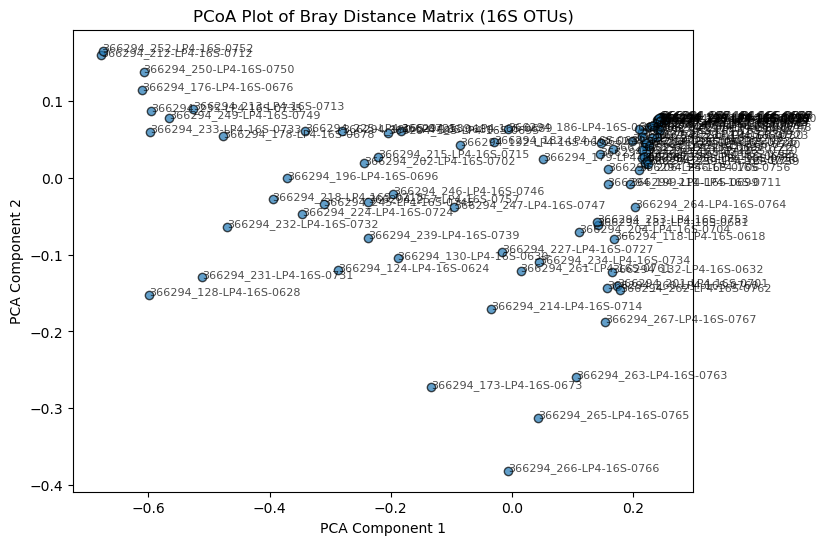

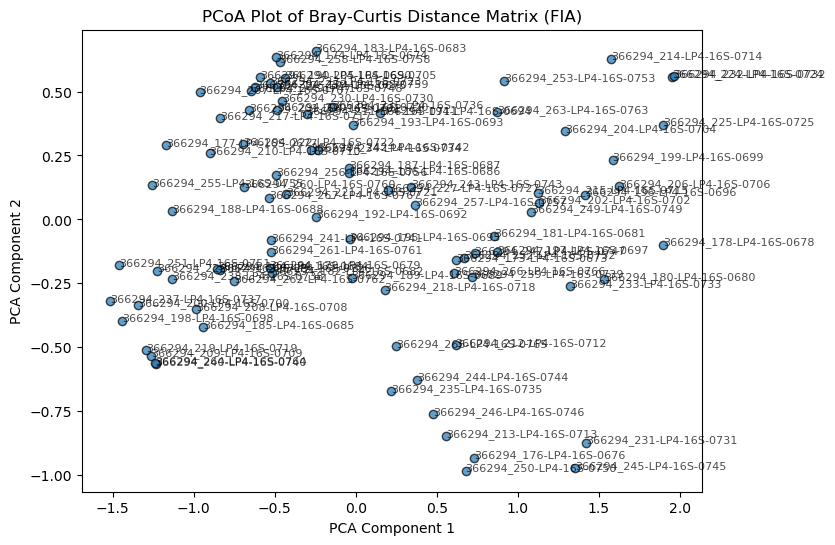

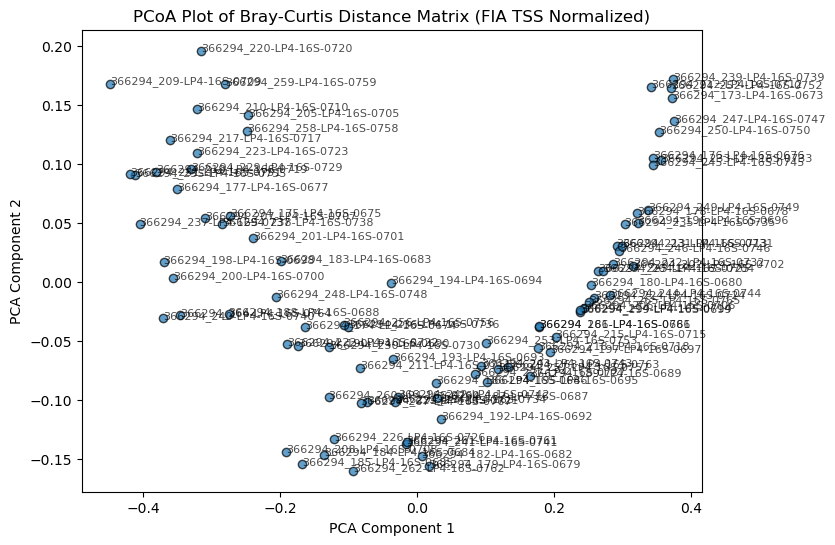

In [29]:
import matplotlib.pyplot as plt

# Function to plot PCA results
def plot_pca(pca_df, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], alpha=0.7, edgecolors="black")

    # Annotate points with sample IDs
    for i, txt in enumerate(pca_df.index):
        plt.annotate(txt, (pca_df.iloc[i, 0], pca_df.iloc[i, 1]), fontsize=8, alpha=0.7)

    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    plt.show()

# Example: Plot PCA for Jaccard LP5
plot_pca(pcoa_bray_curtis_16S_OTU, "PCoA Plot of Bray Distance Matrix (16S OTUs)")

# Example: Plot PCA for Bray-Curtis LP5
plot_pca(pcoa_bray_curtis_FIA, "PCoA Plot of Bray-Curtis Distance Matrix (FIA)")

# Example: Plot PCA for Bray-Curtis LP5
plot_pca(pcoa_bray_curtis_FIA_tss, "PCoA Plot of Bray-Curtis Distance Matrix (FIA TSS Normalized)")

make PCAs instead of PCOAs for fia!

In [30]:
import pandas as pd
from sklearn.decomposition import PCA

# Function to compute PCA
def compute_pca(data, n_components=2):
    """Performs PCA on a DataFrame and returns principal components + variance explained."""
    
    # Initialize PCA
    pca = PCA(n_components=n_components)
    
    # Fit and transform the data to get the principal components
    pca_result = pca.fit_transform(data)
    
    # Convert the result to a DataFrame
    pca_coordinates = pd.DataFrame(
        pca_result, 
        index=data.index,  # Keep original sample names
        columns=[f"PC{i+1}" for i in range(n_components)]  # Name the components
    )
    
    # Get the proportion of variance explained by each component
    variance_explained = pca.explained_variance_ratio_[:n_components]

    return pca_coordinates, variance_explained

# Example usage
# Assuming 'data_normalized_log_z_df' is your z-score normalized DataFrame
pca_tss_FIA, variance_tss_FIA = compute_pca(tss_fia, n_components=2)
pca_FIA, variance_FIA = compute_pca(fia, n_components=2)





In [31]:
def align_pcoa_matrices(pcoa1, pcoa2):
    """
    Aligns two PCoA DataFrames by keeping only shared samples.
    Returns aligned DataFrames and lists of missing samples.
    """
    common_samples = pcoa1.index.intersection(pcoa2.index)
    
    missing_in_pcoa1 = pcoa2.index.difference(pcoa1.index)
    missing_in_pcoa2 = pcoa1.index.difference(pcoa2.index)
    
    print(f"Shared Samples: {len(common_samples)}")
    print(f"Samples missing in first PCoA: {len(missing_in_pcoa1)}")
    print(f"Samples missing in second PCoA: {len(missing_in_pcoa2)}")
    
    return pcoa1.loc[common_samples], pcoa2.loc[common_samples], missing_in_pcoa1, missing_in_pcoa2

# Align PCoAs before Procrustes
#bray_curtis pcoa:



pcoa_bray_curtis_FIA, pcoa_bray_curtis_16S_OTU, missing_bray_curtis_FIA, missing_bray_curtis_16S_OTU = align_pcoa_matrices(pcoa_bray_curtis_FIA, pcoa_bray_curtis_16S_OTU)
pcoa_bray_curtis_FIA_tss, pcoa_bray_curtis_16S_OTU, missing_bray_curtis_FIA_tss, missing_bray_curtis_16S_OTU = align_pcoa_matrices(pcoa_bray_curtis_FIA_tss, pcoa_bray_curtis_16S_OTU)
pca_tss_FIA, pcoa_bray_curtis_16S_OTU, missing_pca_tss_FIA, missing_pcoa_bray_curtis_16S_OTU = align_pcoa_matrices(pca_tss_FIA, pcoa_bray_curtis_16S_OTU)
pca_FIA, pcoa_bray_curtis_16S_OTU, missing_pca_FIA, missing_pcoa_bray_curtis_16S_OTU = align_pcoa_matrices(pca_FIA, pcoa_bray_curtis_16S_OTU)






Shared Samples: 87
Samples missing in first PCoA: 6
Samples missing in second PCoA: 3
Shared Samples: 87
Samples missing in first PCoA: 0
Samples missing in second PCoA: 3
Shared Samples: 87
Samples missing in first PCoA: 0
Samples missing in second PCoA: 3
Shared Samples: 87
Samples missing in first PCoA: 0
Samples missing in second PCoA: 3


In [32]:
from scipy.spatial import procrustes
import pandas as pd

def perform_procrustes(pcoa1, pcoa2):
    """
    Runs Procrustes analysis on aligned PCoA results and returns transformed coordinates + disparity.
    Ensures matrices are standardized before comparison.
    """
    # Convert DataFrames to numpy arrays
    mtx1, mtx2, disparity = procrustes(pcoa1.values, pcoa2.values)
    
    # Convert back to DataFrames, preserving original index and column names
    return pd.DataFrame(mtx1, index=pcoa1.index, columns=pcoa1.columns), \
           pd.DataFrame(mtx2, index=pcoa2.index, columns=pcoa2.columns), disparity


pcoa_bray_curtis_FIA_trans, pcoa_bray_curtis_16S_OTU_trans, disparity_bray_curtis = perform_procrustes(
    pcoa_bray_curtis_FIA, pcoa_bray_curtis_16S_OTU)

#make same for tss:
pcoa_bray_curtis_FIA_tss_trans, pcoa_bray_curtis_16S_OTU_trans2, disparity_bray_curtis_tss = perform_procrustes(
    pcoa_bray_curtis_FIA_tss, pcoa_bray_curtis_16S_OTU)

#make same for pca:
pca_tss_FIA_trans, pcoa_bray_curtis_16S_OTU_trans3, disparity_pca_tss = perform_procrustes(
    pca_tss_FIA, pcoa_bray_curtis_16S_OTU)

#make same for pca:
pca_FIA_trans, pcoa_bray_curtis_16S_OTU_trans4, disparity_pca = perform_procrustes(
    pca_FIA, pcoa_bray_curtis_16S_OTU)






# Print results
# Print results
print(f"Procrustes Disparity - FIA_z_PCoA-16S: {disparity_bray_curtis:.4f}")
print(f"Procrustes Disparity - FIA_tss_PCoA-16S: {disparity_bray_curtis_tss:.4f}")
print(f"Procrustes Disparity - FIA_tss_PCA-16S: {disparity_pca_tss:.4f}")

print(f"Procrustes Disparity - FIA_z_PCA-16S: {disparity_pca:.4f}")


Procrustes Disparity - FIA_z_PCoA-16S: 0.5910
Procrustes Disparity - FIA_tss_PCoA-16S: 0.4371
Procrustes Disparity - FIA_tss_PCA-16S: 0.4990
Procrustes Disparity - FIA_z_PCA-16S: 0.5914


In [45]:
import numpy as np
from scipy.spatial import procrustes

# Function for Procrustes permutation test
def procrustes_permutation_test(pcoa1, pcoa2, num_permutations=1000):
    """
    Computes Procrustes disparity and runs a permutation test to assess significance.
    Ensures matrices are correctly aligned and standardized before comparison.
    """

    # Convert DataFrames to numpy arrays
    mtx1, mtx2, observed_disparity = procrustes(pcoa1.values, pcoa2.values)
    
    # Generate null distribution by shuffling rows of pcoa2
    permuted_disparities = []
    for _ in range(num_permutations):
        shuffled = pcoa2.sample(frac=1, replace=False).reset_index(drop=True)  # Shuffle row order
        _, _, perm_disparity = procrustes(mtx1, shuffled.values)  # Compare against shuffled matrix
        permuted_disparities.append(perm_disparity)
    
    # Compute p-value as the proportion of permuted disparities ≤ observed disparity
    p_value = (np.sum(np.array(permuted_disparities) <= observed_disparity)+1) / (num_permutations +1)

    return observed_disparity, np.percentile(permuted_disparities, [2.5, 97.5]), p_value

In [46]:
# Run tests for all PCoA comparisons
#adapt for those ones:
#bray_curtis pcoa:


# Dictionary of PCoA/PCA pairs
pcoa_tests = {
    "FIA_z_PCoA vs 16S_PCoA": (
        pcoa_bray_curtis_FIA, pcoa_bray_curtis_16S_OTU),

    "FIA_tss_PCoA vs 16S_PCoA": (
        pcoa_bray_curtis_FIA_tss, pcoa_bray_curtis_16S_OTU),

    "FIA_tss_PCA vs 16S_PCoA": (
        pca_tss_FIA, pcoa_bray_curtis_16S_OTU),

    "FIA_z_PCA vs 16S_PCoA": (
        pca_FIA, pcoa_bray_curtis_16S_OTU),
}



# Store results
pcoa_results = {}

for name, (pcoa1, pcoa2) in pcoa_tests.items():
    obs_disp, conf_int, p_val = procrustes_permutation_test(pcoa1, pcoa2)
    pcoa_results[name] = {
    "Observed Disparity": round(obs_disp, 6),
    "95% CI": np.round(conf_int, 6),
    "P-value": round(p_val, 8)  # You can adjust to more if needed
}


# Convert to DataFrame
import pandas as pd
pcoa_results_df = pd.DataFrame.from_dict(pcoa_results, orient="index")

# Display results
pcoa_results_df 

Observed Disparity                95% CI   P-value
FIA_z_PCoA vs 16S_PCoA              0.590956  [0.953632, 0.998986]  0.000999
FIA_tss_PCoA vs 16S_PCoA            0.437149  [0.946777, 0.999179]  0.000999
FIA_tss_PCA vs 16S_PCoA             0.498990  [0.944602, 0.998966]  0.000999
FIA_z_PCA vs 16S_PCoA               0.591410  [0.947394, 0.998983]  0.000999

All comparisons are highly significant (p = 0.0) — indicating real structure linking microbiome and metabolome.
TSS-normalized FIA PCoA shows the lowest disparity (0.437) — meaning it aligns best with 16S Bray-Curtis PCoA space.
Surprisingly, PCA of FIA data doesn't outperform PCoA (possibly due to noise or non-linear structure in metabolite data).
Z-score normalization seems to introduce more variance or mismatch — TSS may preserve relative compositional signals better in your case.

now fine-grained per temperature and day

In [50]:
#make a copy of meta only containing the samples present in the pcoa:
#make a copy of meta only containing the samples present in the pcoa:
meta_pcoa = meta.loc[meta.index.intersection(pcoa_bray_curtis_16S_OTU.index)]

In [51]:
results = []

for day in sorted(meta_pcoa["day"].unique()):
    for temp in sorted(meta_pcoa["temperature"].unique()):
        idx = meta_pcoa[(meta_pcoa["day"] == day) & (meta_pcoa["temperature"] == temp)].index
        if len(idx) < 2:  # Need at least 3 samples for meaningful ordination
            continue
        disp, _, p = procrustes_permutation_test(pcoa_bray_curtis_FIA_tss.loc[idx], pcoa_bray_curtis_16S_OTU.loc[idx])
        results.append({"Day": day, "Temp": temp, "Disparity": disp, "P": p})

results_df = pd.DataFrame(results)


In [54]:
#export it:
results_df.to_csv('Stats/20250517_FIA_tss_16S_PCoA_procrustes.csv', index=False)

In [59]:
results_df.sort_values(by=['Disparity'], ascending=True)

Day  Temp     Disparity         P
5     2    30  1.540744e-31  1.000000
10    4    17  2.958228e-31  1.000000
27   21     4  3.697785e-31  0.000999
1     1    17  5.349463e-30  0.000999
12    5     4  1.424835e-02  0.190809
28   21    17  2.265943e-02  0.154845
24   14     4  4.150187e-02  0.315684
7     3    17  4.626283e-02  0.000999
9     4     4  8.980293e-02  0.000999
21   10     4  1.169960e-01  0.168831
29   21    30  1.231979e-01  0.169830
17    6    30  2.465823e-01  0.656344
19    7    17  2.472998e-01  0.518482
13    5    17  2.476575e-01  0.352647
8     3    30  2.663667e-01  0.153846
25   14    17  2.854360e-01  0.515485
16    6    17  3.099713e-01  0.370629
20    7    30  3.239104e-01  0.510490
14    5    30  3.888126e-01  0.543457
4     2    17  4.722029e-01  0.478521
3     2     4  5.204003e-01  0.677323
15    6     4  5.337289e-01  0.340659
23   10    30  5.907657e-01  0.836164
18    7     4  6.158018e-01  0.494505
11    4    30  7.494565e-01  0.683317
6     3     4  7.968635e-01  0.689311
26   14    30  8.079881e-01  0.685315
2     1    30  8.479178e-01  0.687313
0     1     4  9.383413e-01  1.000000
22   10    17  9.499007e-01  1.000000

In [55]:
temp_results = []

for temp in sorted(meta_pcoa["temperature"].unique()):
    idx = meta_pcoa[meta_pcoa["temperature"] == temp].index
    if len(idx) < 3:
        continue
    disp, _, p = procrustes_permutation_test(pcoa_bray_curtis_FIA_tss.loc[idx], pcoa_bray_curtis_16S_OTU.loc[idx])
    temp_results.append({"Temp": temp, "Disparity": disp, "P": p})

temp_results_df = pd.DataFrame(temp_results)
temp_results_df

Temp  Disparity         P
0     4   0.987034  0.718282
1    17   0.438053  0.000999
2    30   0.593105  0.000999

In [56]:
day_results = []

for day in sorted(meta_pcoa["day"].unique()):
    idx = meta_pcoa[meta_pcoa["day"] == day].index
    if len(idx) < 3:
        continue
    disp, _, p = procrustes_permutation_test(pcoa_bray_curtis_FIA_tss.loc[idx], pcoa_bray_curtis_16S_OTU.loc[idx])
    day_results.append({"Day": day, "Disparity": disp, "P": p})

day_results_df = pd.DataFrame(day_results)
day_results_df

Day  Disparity         P
0    1   0.575488  0.034965
1    2   0.347316  0.007992
2    3   0.578504  0.017982
3    4   0.784126  0.310689
4    5   0.608682  0.037962
5    6   0.277583  0.001998
6    7   0.241550  0.002997
7   10   0.297436  0.004995
8   14   0.255236  0.003996
9   21   0.539680  0.053946

In [58]:
#export the day and temp results:
temp_results_df.to_csv('Stats/20250517_FIA_tss_16S_PCoA_procrustes_temp.csv', index=False)
day_results_df.to_csv('Stats/20250517_FIA_tss_16S_PCoA_procrustes_day.csv', index=False)

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Temp', ylabel='Disparity'>

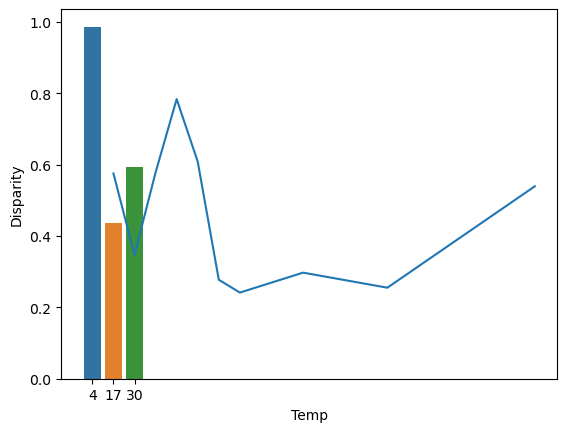

In [57]:
sns.barplot(data=temp_results_df, x="Temp", y="Disparity")
sns.lineplot(data=day_results_df, x="Day", y="Disparity")


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/meyeanni/miniconda3/en

<Axes: xlabel='Day', ylabel='Disparity'>

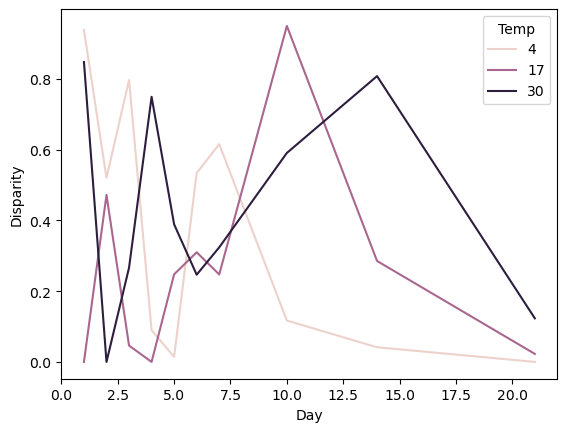

In [53]:
import seaborn as sns
sns.lineplot(data=results_df, x="Day", y="Disparity", hue="Temp")


In [48]:
subset_idx = meta[(meta["day"] == 7) & (meta["temperature"] == "17")].index
sub_16S = pcoa_bray_curtis_16S_OTU.loc[subset_idx]
sub_FIA = pcoa_bray_curtis_FIA_tss.loc[subset_idx]


In [ ]:
disp, _, p = procrustes_permutation_test(sub_FIA, sub_16S, num_permutations=10000)


In [39]:
def plot_procrustes(pcoa1, pcoa2, title, var1, var2, disparity_df, comp_nr, approach1, approach2, meta, color_col='Temp'):
    """Plots Procrustes-transformed PCoA results with connections between corresponding samples and colored by temperature."""
    plt.figure(figsize=(8, 6))

    # Define color mapping
    temp_colors = {"4": "#1f77b4", "17": "#ff7f0e", "30": "#2ca02c"}
    colors = meta.loc[pcoa1.index, color_col].map(temp_colors)

    # Scatter plot by temperature
    plt.scatter(pcoa1["PCo1"], pcoa1["PCo2"], c=colors, label=None, alpha=0.6, edgecolor='k', linewidth=0.3)
    plt.scatter(pcoa2["PCo1"], pcoa2["PCo2"], c=colors, label=None, marker='x', alpha=0.6)

    # Connecting lines
    for i in range(len(pcoa1)):
        plt.plot([pcoa1.iloc[i, 0], pcoa2.iloc[i, 0]], 
                 [pcoa1.iloc[i, 1], pcoa2.iloc[i, 1]], "k-", alpha=0.3)

    # Axis labels
    var1 = var1 * 100
    var2 = var2 * 100
    plt.xlabel(f"PC1-{approach1} ({var1[0]:.2f}%) / PC1-{approach2} ({var2[0]:.2f}%)", fontsize=12)
    plt.ylabel(f"PC2-{approach1} ({var1[1]:.2f}%) / PC2-{approach2} ({var2[1]:.2f}%)", fontsize=12)

    # Legend for disparity and p-value
    pval = disparity_df["P-value"][comp_nr]
    legend_title = f"M²: {disparity_df['Observed Disparity'][comp_nr]:.4f} | p-value: {'<0.001' if pval < 0.001 else f'{pval:.3f}'}"
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Start', markerfacecolor='gray', markersize=7),
                        plt.Line2D([0], [0], marker='x', color='w', label='End', markerfacecolor='gray', markersize=7)],
               title=legend_title, loc='best', fontsize=10, title_fontsize=11)

    # Title
    plt.title(title, fontsize=14)
    plt.show()



/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_5696/3824303949.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = disparity_df["P-value"][comp_nr]
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_5696/3824303949.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  legend_title = f"M²: {disparity_df['Observed Disparity'][comp_nr]:.4f} | p-value: {'<0.001' if pval < 0.001 else f'{pval:.3f}'}"


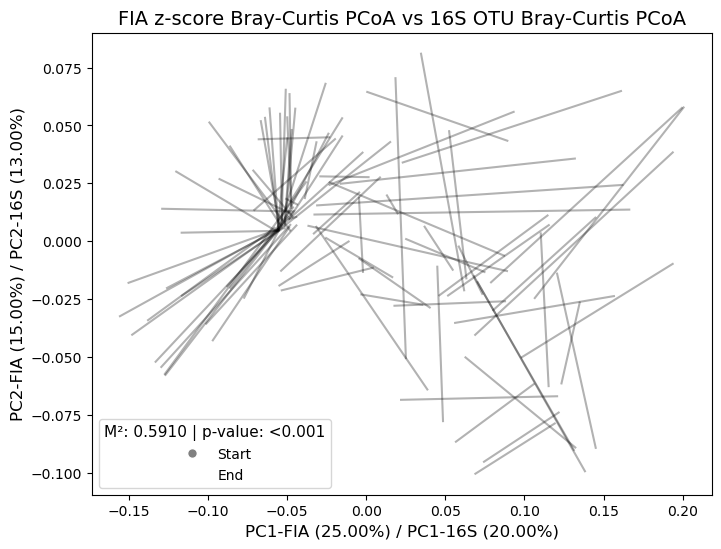

In [40]:
plot_procrustes(
    pcoa_bray_curtis_FIA_trans,
    pcoa_bray_curtis_16S_OTU_trans,
    "FIA z-score Bray-Curtis PCoA vs 16S OTU Bray-Curtis PCoA",
    np.array([0.25, 0.15]),  # Replace with real variance explained
    np.array([0.20, 0.13]),  # Replace with real variance explained
    pcoa_results_df,
    comp_nr=0,  # or appropriate index
    approach1="FIA",
    approach2="16S",
    meta=meta,
    color_col='temperature'
)


## sPLS-DA (kind of, but in python;))

Identify sparse, discriminative features from both omics layers.
Reveal co-expressed microbial–metabolite signatures predictive of:
Temperature (e.g., 4°C, 17°C, 30°C)
Storage phase (e.g., early vs mid vs late)
Visualize group separation and interpret biomarker loading vectors.

In [12]:
tss_fia

M101.1397  M101.4016  M101.216  M101.1307  M101.361  \
366294_209-LP4-16S-0709   0.000000   0.000694  0.000604   0.000491  0.000796   
366294_255-LP4-16S-0755   0.000836   0.000780  0.000727   0.000616  0.000977   
366294_237-LP4-16S-0737   0.000713   0.000872  0.001173   0.000973  0.001236   
366294_198-LP4-16S-0698   0.000868   0.000776  0.000811   0.000899  0.001161   
366294_240-LP4-16S-0740   0.001283   0.000808  0.000768   0.000999  0.001492   
...                            ...        ...       ...        ...       ...   
366294_231-LP4-16S-0731   0.000396   0.000288  0.000354   0.000451  0.000381   
366294_196-LP4-16S-0696   0.000433   0.000169  0.000341   0.000000  0.000312   
366294_245-LP4-16S-0745   0.000344   0.000000  0.000000   0.000353  0.000251   
366294_252-LP4-16S-0752   0.000148   0.000160  0.000000   0.000218  0.000172   
366294_212-LP4-16S-0712   0.000000   0.000000  0.000276   0.000000  0.000202   

                         M1065.3544  M101.1641  M1011.9742  M101.2658  \
366294_209-LP4-16S-0709    0.000000   0.000434    0.000000   0.001280   
366294_255-LP4-16S-0755    0.000000   0.000000    0.000000   0.000979   
366294_237-LP4-16S-0737    0.000451   0.001002    0.000379   0.001219   
366294_198-LP4-16S-0698    0.000000   0.001083    0.000000   0.001469   
366294_240-LP4-16S-0740    0.000000   0.001546    0.000000   0.002442   
...                             ...        ...         ...        ...   
366294_231-LP4-16S-0731    0.000562   0.000392    0.000608   0.000465   
366294_196-LP4-16S-0696    0.000674   0.000354    0.000701   0.000712   
366294_245-LP4-16S-0745    0.000516   0.000277    0.000644   0.000000   
366294_252-LP4-16S-0752    0.000403   0.000000    0.000457   0.000235   
366294_212-LP4-16S-0712    0.000525   0.000246    0.000591   0.000361   

                         M101.1717  ...  M491.0823  M427.124  M471.0758  \
366294_209-LP4-16S-0709   0.000710  ...   0.003691  0.003304   0.004576   
366294_255-LP4-16S-0755   0.000777  ...   0.001251  0.001866   0.002138   
366294_237-LP4-16S-0737   0.000853  ...   0.001055  0.001444   0.001037   
366294_198-LP4-16S-0698   0.000884  ...   0.001044  0.001459   0.001619   
366294_240-LP4-16S-0740   0.001044  ...   0.000000  0.001166   0.000000   
...                            ...  ...        ...       ...        ...   
366294_231-LP4-16S-0731   0.000455  ...   0.000000  0.000271   0.000000   
366294_196-LP4-16S-0696   0.000283  ...   0.000000  0.000236   0.000000   
366294_245-LP4-16S-0745   0.000215  ...   0.000000  0.000000   0.000000   
366294_252-LP4-16S-0752   0.000000  ...   0.000000  0.000167   0.000000   
366294_212-LP4-16S-0712   0.000000  ...   0.000000  0.000278   0.000000   

                         M387.0952  M529.1587  M566.1577  M280.9969  \
366294_209-LP4-16S-0709   0.000000   0.001537   0.000740   0.001416   
366294_255-LP4-16S-0755   0.000000   0.001058   0.001160   0.002504   
366294_237-LP4-16S-0737   0.002185   0.000879   0.000944   0.002319   
366294_198-LP4-16S-0698   0.001878   0.001253   0.000958   0.002771   
366294_240-LP4-16S-0740   0.002317   0.000806   0.000000   0.002634   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000668   0.000000   0.000000   0.000927   
366294_196-LP4-16S-0696   0.000529   0.000119   0.000000   0.000661   
366294_245-LP4-16S-0745   0.000567   0.000000   0.000000   0.000889   
366294_252-LP4-16S-0752   0.000297   0.000000   0.000000   0.000287   
366294_212-LP4-16S-0712   0.000331   0.000000   0.000000   0.000452   

                         M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709   0.000423   0.001152   0.000883  
366294_255-LP4-16S-0755   0.000696   0.000901   0.000958  
366294_237-LP4-16S-0737   0.000598   0.001301   0.001184  
366294_198-LP4-16S-0698   0.000844   0.001330   0.001319  
366294_240-LP4-16S-0740   0.000000   0.001246   0.001401  
...                            ...        ...        ...  
366294_231-LP4-16S-0

In [12]:
# Step 1: Find common sample IDs
meta = meta[meta['day'] != 0]
shared_samples = bact.index.intersection(tss_fia.index).intersection(meta.index).intersection(fungi.index)

# Step 2: Subset and sort
bact_aligned = bact.loc[shared_samples].sort_index()
fia_aligned = tss_fia.loc[shared_samples].sort_index()
meta_aligned = meta.loc[shared_samples].sort_index()
fungi_aligned = fungi.loc[shared_samples].sort_index()
#to bact_aligned, merge more columns from meta_aligned:
bact_aligned_m = pd.merge(bact_aligned, meta_aligned[
    ['pH',
 'TTA',
 'LAB CFUs',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'DNA yield'
 ]], left_index=True, right_index=True)


In [13]:
meta_aligned['temperature'].unique()

array([30, 17,  4])

In [14]:
fungi_aligned

Alternaria rosae  Alternaria sp.  Aspergillus ruber  \
366294_173-LP4-16S-0673          0.000572        0.010590           0.000000   
366294_174-LP4-16S-0674          0.002862        0.008586           0.000000   
366294_175-LP4-16S-0675          0.001716        0.006007           0.000000   
366294_176-LP4-16S-0676          0.000286        0.005716           0.000857   
366294_177-LP4-16S-0677          0.000286        0.008579           0.000000   
...                                   ...             ...                ...   
366294_263-LP4-16S-0763          0.002292        0.009453           0.000000   
366294_264-LP4-16S-0764          0.003723        0.015464           0.000286   
366294_265-LP4-16S-0765          0.003731        0.016648           0.001435   
366294_266-LP4-16S-0766          0.003730        0.017504           0.000000   
366294_267-LP4-16S-0767          0.003150        0.014605           0.000000   

                         Aureobasidium pullulans  Bensingtonia sp.  \
366294_173-LP4-16S-0673                 0.002576          0.000000   
366294_174-LP4-16S-0674                 0.003434          0.000000   
366294_175-LP4-16S-0675                 0.004863          0.000000   
366294_176-LP4-16S-0676                 0.002001          0.000000   
366294_177-LP4-16S-0677                 0.004575          0.000000   
...                                          ...               ...   
366294_263-LP4-16S-0763                 0.003151          0.000000   
366294_264-LP4-16S-0764                 0.006873          0.000573   
366294_265-LP4-16S-0765                 0.006315          0.000000   
366294_266-LP4-16S-0766                 0.004591          0.000287   
366294_267-LP4-16S-0767                 0.003436          0.000286   

                         Bipolaris yamadae  Cladosporium herbarum  \
366294_173-LP4-16S-0673           0.000859               0.004293   
366294_174-LP4-16S-0674           0.000286               0.003434   
366294_175-LP4-16S-0675           0.000000               0.002574   
366294_176-LP4-16S-0676           0.000000               0.001429   
366294_177-LP4-16S-0677           0.000000               0.002860   
...                                    ...                    ...   
366294_263-LP4-16S-0763           0.000000               0.003724   
366294_264-LP4-16S-0764           0.000000               0.004868   
366294_265-LP4-16S-0765           0.000000               0.004305   
366294_266-LP4-16S-0766           0.000000               0.005739   
366294_267-LP4-16S-0767           0.000286               0.001718   

                         Cystofilobasidium macerans  Dioszegia fristingensis  \
366294_173-LP4-16S-0673                    0.000000                 0.000000   
366294_174-LP4-16S-0674                    0.000286                 0.000000   
366294_175-LP4-16S-0675                    0.000000                 0.000858   
366294_176-LP4-16S-0676                    0.000000                 0.000000   
366294_177-LP4-16S-0677                    0.000000                 0.000000   
...                                             ...                      ...   
366294_263-LP4-16S-0763                    0.000000                 0.000573   
366294_264-LP4-16S-0764                    0.000000                 0.000286   
366294_265-LP4-16S-0765                    0.000000                 0.000574   
366294_266-LP4-16S-0766                    0.000000                 0.000287   
366294_267-LP4-16S-0767                    0.000573                 0.000000   

                         Dioszegia hungarica  ...  Pleosporaceae sp.  \
366294_173-LP4-16S-0673             0.000572  ...           0.002862   
366294_174-LP4-16S-0674             0.000000  ...           0.001431   
366294_175-LP4-16S-0675             0.000286  ...           0.001716   
366294_176-LP4-16S-0676             0.000000  ...           0.001429   
366294_177-LP4-16S-0677             0.000286  ...           0.001430   
.

In [15]:
meta_aligned.columns.to_list()

['Unnamed: 0',
 'Chao1 kmers ITS',
 'Chao1 OTUs ITS',
 'Chao1 ASVs ITS',
 'Chao1 kmers',
 'Chao1 OTUs',
 'Chao1 ASVs',
 'identifier',
 'row',
 'column',
 'temperature',
 'day',
 'phase',
 'phase2',
 'temp-phase',
 'temp-phase2',
 'replicate',
 'well',
 'DNA yield',
 'DNA_total_yield_per_1g',
 'pH',
 'TTA',
 'estimate_bact',
 'estimate_bact_CFUs',
 'LAB CFUs',
 'LAB_counts',
 'bac_diff',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'Observed features ASVs',
 'Observed features OTUs',
 'Observed features kmers',
 'Shannon ASVs',
 'Evenness ASVs',
 'Simpson ASVs',
 'Shannon OTUs',
 'Evenness OTUs',
 'Simpson OTUs',
 'Shannon kmers',
 'Evenness kmers',
 'Simpson kmers',
 'color',
 'color2',
 'Observed features ASVs ITS',
 'Observed features OTUs ITS',
 'Observed features kmers ITS',
 'Shannon ASVs ITS',
 'Evenness ASVs ITS',
 'Simpson ASVs ITS',
 'Shannon OTUs ITS',
 'Evenness OTUs ITS',
 'Simpso

In [16]:
#to bact_aligned, merge more columns from meta_aligned:
bact_aligned_m = pd.merge(bact_aligned, meta_aligned[
    ['pH',
 'TTA',
 'LAB CFUs',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'DNA yield'
 ]], left_index=True, right_index=True)

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel


# Combine features, prepare labels
X = pd.concat([bact_aligned_m, fia_aligned], axis=1)
y = meta_aligned["temperature"]

#scale and fit model with feature selection:
# Pipeline: scale, select, classify
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Cross-validate
scores = cross_val_score(pipeline, X, y, cv=5)
print(f"Cross-validated accuracy: {scores.mean():.3f} ± {scores.std():.3f}")




Cross-validated accuracy: 0.871 ± 0.069


In [94]:
#interpret important features:
# Fit full model
pipeline.fit(X, y)
model = pipeline.named_steps['selector'].estimator_

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(50)
print(top_features)


M937.4337               0.026306
M203.0822               0.024875
Pediococcus parvulus    0.024612
M937.6324               0.024114
M712.4007               0.023714
M649.2091               0.020197
M293.1227               0.017440
maltose                 0.016785
M251.0762               0.016266
M130.086                0.015972
M1097.0441              0.015332
M253.0917               0.013971
M165.0544               0.013516
M316.0795               0.012742
M871.388                0.012548
M171.0057               0.011787
M147.0438               0.011435
M1172.0463              0.011028
M781.0278               0.010809
M277.1526               0.010804
M575.1827               0.010767
glucose                 0.010572
M413.1296               0.009226
M571.3453               0.009109
M135.0288               0.008995
M415.1457               0.008488
M952.4598               0.008094
M439.0794               0.007591
M531.1733               0.007487
M613.2967               0.007439
M600.2633 

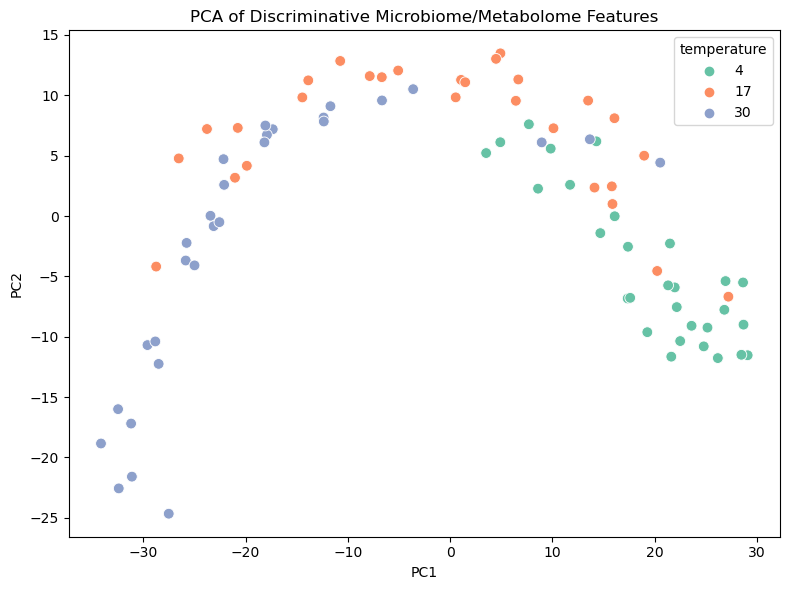

In [95]:
from sklearn.decomposition import PCA

# Get selected features
selected_features = X.loc[:, pipeline.named_steps['selector'].get_support()]

# PCA on selected features
X_pca = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(selected_features))

# Plot with color by temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set2", s=60)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Discriminative Microbiome/Metabolome Features")
plt.tight_layout()
plt.show()


In [17]:
#create a palette with grey scale colors form white to black:
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("custom_grey", ["white", "black"], N=256)

In [109]:
top_features = importances.sort_values(ascending=False).head(25)
print(top_features)

M937.4337               0.026306
M203.0822               0.024875
Pediococcus parvulus    0.024612
M937.6324               0.024114
M712.4007               0.023714
M649.2091               0.020197
M293.1227               0.017440
maltose                 0.016785
M251.0762               0.016266
M130.086                0.015972
M1097.0441              0.015332
M253.0917               0.013971
M165.0544               0.013516
M316.0795               0.012742
M871.388                0.012548
M171.0057               0.011787
M147.0438               0.011435
M1172.0463              0.011028
M781.0278               0.010809
M277.1526               0.010804
M575.1827               0.010767
glucose                 0.010572
M413.1296               0.009226
M571.3453               0.009109
M135.0288               0.008995
dtype: float64


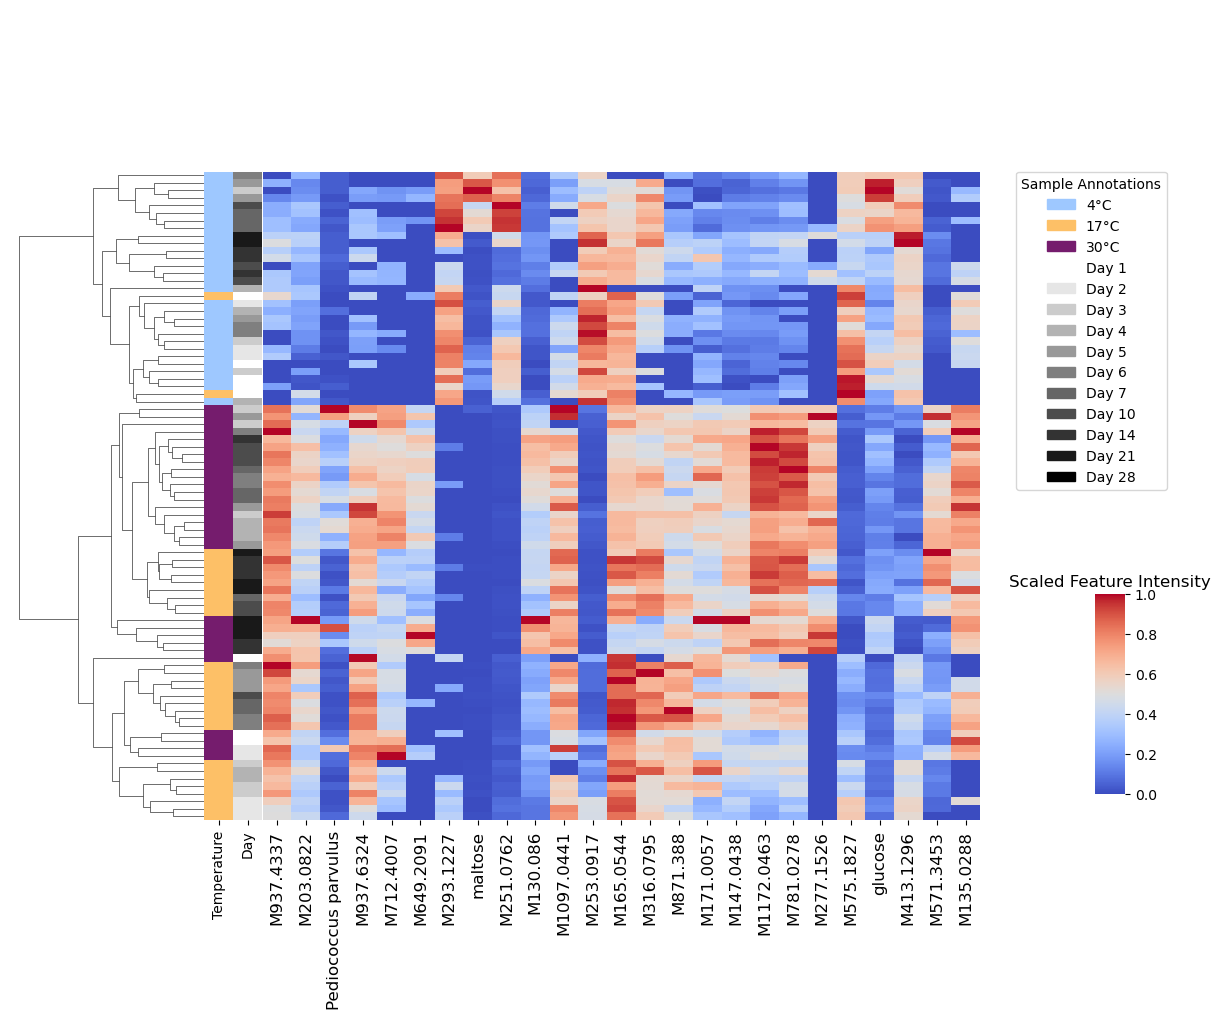

In [128]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Normalize top features
heatmap_data = MinMaxScaler().fit_transform(X[top_features.index])
heatmap_df = pd.DataFrame(heatmap_data, index=X.index, columns=top_features.index)
heatmap_df["temperature"] = y
heatmap_df["day"] = meta_aligned["day"]


# Create color mappings
temp_colors = {4: "#9EC8FFFF", 17: "#FDC067FF", 30: "#751C6DFF"}
#day_palette = sns.color_palette("greys", n_colors=meta["day"].nunique())
#day_palette =  sns.color_palette("Set3", 11) 
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))

# Create a color palette for the days


# Build row_colors DataFrame
row_colors = pd.DataFrame({
    "Temperature": meta.loc[heatmap_df.index, "temperature"].map(temp_colors),
    "Day": meta.loc[heatmap_df.index, "day"].map(day_colors)
}, index=heatmap_df.index)

# Drop metadata columns from heatmap input
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])

# Plot clustermap
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    cmap="coolwarm",
    figsize=(10, 10),
    col_cluster=False,
    yticklabels = False,
    cbar_pos = (1.1, 0.2, 0.03, 0.2)
    
)
# Optional: if you set yticklabels=True, you can control font size like this:
for label in g.ax_heatmap.get_xticklabels():
     label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)
# Create legend handles for temperature
temp_patches = [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()]

# Create legend handles for day
day_patches = [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()]

# Combine patches
all_patches = temp_patches + day_patches

# Add the legend outside the plot
g.ax_heatmap.legend(
    handles=all_patches,
    title="Sample Annotations",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
    
)


## adapt to nested CV:

preprocess the data:

In [17]:
meta

Unnamed: 0  Chao1 kmers ITS  \
16S_id                                                              
366294_217-LP4-16S-0717  366292_217-LP4-ITS-0717           1204.0   
366294_255-LP4-16S-0755  366292_255-LP4-ITS-0755           2285.0   
366294_251-LP4-16S-0751  366292_251-LP4-ITS-0751           3265.0   
366294_223-LP4-16S-0723  366292_223-LP4-ITS-0723           1953.0   
366294_177-LP4-16S-0677  366292_177-LP4-ITS-0677           1960.0   
...                                          ...              ...   
366294_239-LP4-16S-0739  366292_239-LP4-ITS-0739           1536.0   
366294_173-LP4-16S-0673  366292_173-LP4-ITS-0673           2477.0   
366294_121-LP4-16S-0621  366292_121-LP4-ITS-0621           1052.0   
366294_147-LP4-16S-0647  366292_147-LP4-ITS-0647           1746.0   
366294_128-LP4-16S-0628  366292_128-LP4-ITS-0628           2092.0   

                         Chao1 OTUs ITS  Chao1 ASVs ITS  Chao1 kmers  \
16S_id                                                                 
366294_217-LP4-16S-0717        5.000000            8.00   588.000000   
366294_255-LP4-16S-0755       15.000000           17.00   708.000000   
366294_251-LP4-16S-0751       16.250000           34.00   708.000000   
366294_223-LP4-16S-0723       11.333333           11.00   678.000000   
366294_177-LP4-16S-0677       17.333333           19.00   473.004386   
...                                 ...             ...          ...   
366294_239-LP4-16S-0739        5.000000            8.20   708.000000   
366294_173-LP4-16S-0673       18.500000           18.75   718.000000   
366294_121-LP4-16S-0621        4.000000            6.00   244.000000   
366294_147-LP4-16S-0647       11.000000           17.50   244.000000   
366294_128-LP4-16S-0628       14.200000           15.25   708.000000   

                         Chao1 OTUs  Chao1 ASVs  identifier row  column  ...  \
16S_id                                                                   ...   
366294_217-LP4-16S-0717         3.0         3.0   W04.02.01   E       6  ...   
366294_255-LP4-16S-0755         5.0         5.0   W04.01.01   C      11  ...   
366294_251-LP4-16S-0751         5.0         8.0  W04.03.01    G      10  ...   
366294_223-LP4-16S-0723         3.0         5.0   W04.03.02   C       7  ...   
366294_177-LP4-16S-0677         4.5         2.0   W04.02.02   E       1  ...   
...                             ...         ...         ...  ..     ...  ...   
366294_239-LP4-16S-0739         5.0         5.0   W30.01.21   C       9  ...   
366294_173-LP4-16S-0673         5.0         6.0   W30.02.21   A       1  ...   
366294_121-LP4-16S-0621         1.0         1.0   W30.02.28   E       6  ...   
366294_147-LP4-16S-0647         1.0         1.0   W30.01.28   G       9  ...   
366294_128-LP4-16S-0628         5.0         5.0   W30.03.28   D       7  ...   

                         Evenness OTUs ITS  Simpson OTUs ITS  \
16S_id                                                         
366294_217-LP4-16S-0717           0.107406          0.058532   
366294_255-LP4-16S-0755           0.064754          0.053929   
366294_251-LP4-16S-0751           0.071042          0.057944   
366294_223-LP4-16S-0723           0.047115          0.032811   
366294_177-LP4-16S-0677           0.056046          0.043449   
...                                    ...               ...   
366294_239-LP4-16S-0739           0.015633          0.006276   
366294_173-LP4-16S-0673           0.064827          0.053488   
366294_121-LP4-16S-0621           0.110319          0.056100   
366294_147-LP4-16S-0647           0.019673          0.010821   
366294_128-LP4-16S-0628           0.033383          0.022726   

                         Shannon kmers ITS  Evenness kmers ITS  \
16S_id                                                           
366294_217-LP4-16S-0717           8.480431            0.828683   
366294_255-LP4-16S-0755           8.378933            0.750937   
366294_251-LP4-16S-0751           8.393120            0.719028   

In [18]:
# Step 1: Find common sample IDs
meta = meta[meta['day'] != 0]
shared_samples = bact.index.intersection(tss_fia.index).intersection(meta.index).intersection(fungi.index)

# Step 2: Subset and sort
bact_aligned = bact.loc[shared_samples].sort_index()
fia_aligned = tss_fia.loc[shared_samples].sort_index()
meta_aligned = meta.loc[shared_samples].sort_index()
fungi_aligned = fungi.loc[shared_samples].sort_index()

In [19]:
fia_aligned

M101.1397  M101.4016  M101.216  M101.1307  M101.361  \
366294_173-LP4-16S-0673   0.000140   0.000160  0.000149   0.000000  0.000135   
366294_174-LP4-16S-0674   0.000853   0.000670  0.000973   0.000625  0.000848   
366294_175-LP4-16S-0675   0.000000   0.000692  0.000654   0.000645  0.000835   
366294_176-LP4-16S-0676   0.000264   0.000000  0.000279   0.000285  0.000299   
366294_177-LP4-16S-0677   0.000573   0.000473  0.001423   0.000627  0.001009   
...                            ...        ...       ...        ...       ...   
366294_263-LP4-16S-0763   0.000500   0.000000  0.000754   0.000500  0.000574   
366294_264-LP4-16S-0764   0.000836   0.000817  0.002016   0.000966  0.001106   
366294_265-LP4-16S-0765   0.000520   0.000000  0.000617   0.000354  0.000477   
366294_266-LP4-16S-0766   0.000000   0.000692  0.000000   0.000402  0.000611   
366294_267-LP4-16S-0767   0.000000   0.000000  0.000862   0.000763  0.000780   

                         M1065.3544  M101.1641  M1011.9742  M101.2658  \
366294_173-LP4-16S-0673    0.000342   0.000153    0.000544   0.000125   
366294_174-LP4-16S-0674    0.000588   0.001052    0.000000   0.001028   
366294_175-LP4-16S-0675    0.000581   0.000916    0.000000   0.000695   
366294_176-LP4-16S-0676    0.000000   0.000210    0.000730   0.000456   
366294_177-LP4-16S-0677    0.000000   0.000879    0.000000   0.001132   
...                             ...        ...         ...        ...   
366294_263-LP4-16S-0763    0.000551   0.000669    0.000374   0.000930   
366294_264-LP4-16S-0764    0.000000   0.001325    0.000000   0.001723   
366294_265-LP4-16S-0765    0.000421   0.000645    0.000609   0.000867   
366294_266-LP4-16S-0766    0.000645   0.000664    0.000572   0.000644   
366294_267-LP4-16S-0767    0.000714   0.000695    0.000000   0.000000   

                         M101.1717  ...  M491.0823  M427.124  M471.0758  \
366294_173-LP4-16S-0673   0.000000  ...   0.000000  0.000149   0.000000   
366294_174-LP4-16S-0674   0.000685  ...   0.000282  0.000622   0.000000   
366294_175-LP4-16S-0675   0.000549  ...   0.000000  0.001112   0.000000   
366294_176-LP4-16S-0676   0.000276  ...   0.000000  0.000000   0.000000   
366294_177-LP4-16S-0677   0.000860  ...   0.001008  0.001325   0.001238   
...                            ...  ...        ...       ...        ...   
366294_263-LP4-16S-0763   0.000000  ...   0.000240  0.000634   0.000201   
366294_264-LP4-16S-0764   0.001763  ...   0.000668  0.001480   0.000680   
366294_265-LP4-16S-0765   0.000645  ...   0.000000  0.000406   0.000000   
366294_266-LP4-16S-0766   0.000447  ...   0.000000  0.000000   0.000000   
366294_267-LP4-16S-0767   0.000891  ...   0.000541  0.001098   0.000000   

                         M387.0952  M529.1587  M566.1577  M280.9969  \
366294_173-LP4-16S-0673   0.000274   0.000112   0.000000   0.000280   
366294_174-LP4-16S-0674   0.001757   0.000685   0.000612   0.001666   
366294_175-LP4-16S-0675   0.001259   0.000734   0.001047   0.001679   
366294_176-LP4-16S-0676   0.000705   0.000000   0.000000   0.000824   
366294_177-LP4-16S-0677   0.001421   0.000917   0.001124   0.001823   
...                            ...        ...        ...        ...   
366294_263-LP4-16S-0763   0.001039   0.000248   0.000262   0.000827   
366294_264-LP4-16S-0764   0.000000   0.000798   0.000641   0.002720   
366294_265-LP4-16S-0765   0.001110   0.000000   0.000000   0.001147   
366294_266-LP4-16S-0766   0.001105   0.000369   0.000383   0.001008   
366294_267-LP4-16S-0767   0.002019   0.000627   0.000369   0.001736   

                         M602.3878  M650.4282  M627.4082  
366294_173-LP4-16S-0673   0.000188   0.000312   0.000221  
366294_174-LP4-16S-0674   0.000588   0.000827   0.000765  
366294_175-LP4-16S-0675   0.000534   0.000794   0.000716  
366294_176-LP4-16S-0676   0.000484   0.000732   0.000575  
366294_177-LP4-16S-0677   0.000668   0.000932   0.000836  
...                            ...        ...        ...  
366294_263-LP4-16S-0

In [46]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

In [36]:
#import this csv: 20250521_merged_all_cluster_annoations_and_onthology_hmdb_kegg_combined.csv
# Read the CSV file into a DataFrame
metabolome_annotations = pd.read_csv('FIA/20250521_merged_all_cluster_annoations_and_onthology_hmdb_kegg_combined.csv', index_col=0)
metabolome_annotations

mass hmdb_accession  \
Column Name                            
M272.1614    272.1614            NaN   
M149.0443    149.0443    HMDB0029398   
M134.0459    134.0459            NaN   
M128.0339    128.0339    HMDB0032916   
M413.1845    413.1845    HMDB0030401   
...               ...            ...   
M487.3036    487.3036            NaN   
M600.3885    600.3885            NaN   
M602.3878    602.3878            NaN   
M650.4282    650.4282            NaN   
M627.4082    627.4082            NaN   

                                                     hmdb_name      formula  \
Column Name                                                                   
M272.1614    (2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine   C12H23N3O4   
M149.0443                                (3-Nitroamino)alanine     C3H7N3O4   
M134.0459                                4-Hydroxy-L-threonine          NaN   
M128.0339                           4-Oxoproline, 5-Oxoproline       C6H8OS   
M413.1845                                           AK toxin I    C23H27NO6   
...                                                        ...          ...   
M487.3036                                                  NaN          NaN   
M600.3885                                                  NaN          NaN   
M602.3878                                                  NaN          NaN   
M650.4282                                                  NaN          NaN   
M627.4082                                                  NaN          NaN   

                                  sourdough_class  \
Column Name                                         
M272.1614    Amino acids, peptides, and analogues   
M149.0443    Amino acids, peptides, and analogues   
M134.0459    Amino acids, peptides, and analogues   
M128.0339    Amino acids, peptides, and analogues   
M413.1845    Amino acids, peptides, and analogues   
...                                           ...   
M487.3036                                     NaN   
M600.3885                                     NaN   
M602.3878                                     NaN   
M650.4282                                     NaN   
M627.4082                                     NaN   

                                        class  \
Column Name                                     
M272.1614    Carboxylic acids and derivatives   
M149.0443    Carboxylic acids and derivatives   
M134.0459    Carboxylic acids and derivatives   
M128.0339    Carboxylic acids and derivatives   
M413.1845    Carboxylic acids and derivatives   
...                                       ...   
M487.3036                                 NaN   
M600.3885                                 NaN   
M602.3878                                 NaN   
M650.4282                                 NaN   
M627.4082                                 NaN   

                                        sub_class  \
Column Name                                         
M272.1614    Amino acids, peptides, and analogues   
M149.0443    Amino acids, peptides, and analogues   
M134.0459    Amino acids, peptides, and analogues   
M128.0339    Amino acids, peptides, and analogues   
M413.1845    Amino acids, peptides, and analogues   
...                                           ...   
M487.3036                                     NaN   
M600.3885                                     NaN   
M602.3878                                     NaN   
M650.4282                                     NaN   
M627.4082                                     NaN   

                               super_class            kingdom  mass_diff  ...  \
Column Name                                                               ...   
M272.1614    Organic acids and derivatives                NaN        NaN  ...   
M149.0443    Organic acids and derivatives  Organic compounds    0.00064  ...   
M134.0459    Organic acids and derivatives                NaN        NaN  ...   
M128.0339    Organic acids and derivatives  O

In [21]:

#to fia_aligned, merge more columns from meta_aligned:
fia_aligned_m = pd.merge(fia_aligned, meta_aligned[
    ['pH',
 'TTA',
 'LAB CFUs',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'DNA yield'
 ]], left_index=True, right_index=True)

In [22]:
fia_aligned_m

M101.1397  M101.4016  M101.216  M101.1307  M101.361  \
366294_173-LP4-16S-0673   0.000140   0.000160  0.000149   0.000000  0.000135   
366294_174-LP4-16S-0674   0.000853   0.000670  0.000973   0.000625  0.000848   
366294_175-LP4-16S-0675   0.000000   0.000692  0.000654   0.000645  0.000835   
366294_176-LP4-16S-0676   0.000264   0.000000  0.000279   0.000285  0.000299   
366294_177-LP4-16S-0677   0.000573   0.000473  0.001423   0.000627  0.001009   
...                            ...        ...       ...        ...       ...   
366294_263-LP4-16S-0763   0.000500   0.000000  0.000754   0.000500  0.000574   
366294_264-LP4-16S-0764   0.000836   0.000817  0.002016   0.000966  0.001106   
366294_265-LP4-16S-0765   0.000520   0.000000  0.000617   0.000354  0.000477   
366294_266-LP4-16S-0766   0.000000   0.000692  0.000000   0.000402  0.000611   
366294_267-LP4-16S-0767   0.000000   0.000000  0.000862   0.000763  0.000780   

                         M1065.3544  M101.1641  M1011.9742  M101.2658  \
366294_173-LP4-16S-0673    0.000342   0.000153    0.000544   0.000125   
366294_174-LP4-16S-0674    0.000588   0.001052    0.000000   0.001028   
366294_175-LP4-16S-0675    0.000581   0.000916    0.000000   0.000695   
366294_176-LP4-16S-0676    0.000000   0.000210    0.000730   0.000456   
366294_177-LP4-16S-0677    0.000000   0.000879    0.000000   0.001132   
...                             ...        ...         ...        ...   
366294_263-LP4-16S-0763    0.000551   0.000669    0.000374   0.000930   
366294_264-LP4-16S-0764    0.000000   0.001325    0.000000   0.001723   
366294_265-LP4-16S-0765    0.000421   0.000645    0.000609   0.000867   
366294_266-LP4-16S-0766    0.000645   0.000664    0.000572   0.000644   
366294_267-LP4-16S-0767    0.000714   0.000695    0.000000   0.000000   

                         M101.1717  ...  mannitol   glucose  fructose  \
366294_173-LP4-16S-0673   0.000000  ...  1.342461  0.220291  0.039816   
366294_174-LP4-16S-0674   0.000685  ...  1.605658  0.108409  0.005631   
366294_175-LP4-16S-0675   0.000549  ...  1.670276  0.157256  0.040323   
366294_176-LP4-16S-0676   0.000276  ...  1.324249  0.196268  0.038196   
366294_177-LP4-16S-0677   0.000860  ...  1.801209  0.343495  0.049591   
...                            ...  ...       ...       ...       ...   
366294_263-LP4-16S-0763   0.000000  ...  1.522105  0.087938  0.010489   
366294_264-LP4-16S-0764   0.001763  ...  1.168406  0.152321  0.000000   
366294_265-LP4-16S-0765   0.000645  ...  1.588966  0.099024  0.011498   
366294_266-LP4-16S-0766   0.000447  ...  1.557426  0.089966  0.005948   
366294_267-LP4-16S-0767   0.000891  ...  1.390626  0.060734  0.010202   

                          sucrose   maltose  succinic acid  lactic acid  \
366294_173-LP4-16S-0673  0.000000  0.000000       6.632466   130.171162   
366294_174-LP4-16S-0674  0.000000  0.000000       6.894589   134.472623   
366294_175-LP4-16S-0675  0.018308  0.084124       8.748923   229.289363   
366294_176-LP4-16S-0676  0.000000  0.000000      33.913499   148.956000   
366294_177-LP4-16S-0677  0.013445  0.673630       7.904138   137.272157   
...                           ...       ...            ...          ...   
366294_263-LP4-16S-0763  0.000000  0.000000       8.589403   364.224393   
366294_264-LP4-16S-0764  0.000000  0.115361       6.997940    97.655704   
366294_265-LP4-16S-0765  0.000000  0.000000       6.680397   139.781342   
366294_266-LP4-16S-0766  0.000000  0.000000       8.722711   220.874630   
366294_267-LP4-16S-0767  0.000000  0.061622       8.557199   274.510261   

                         acetic acid     ethanol  DNA yield  
366294_173-LP4-16S-0673    39.737931  362.549444   0.100000  
366294_174-LP4-16S-0674    30.819310  354.575890   7.078468  
366294_175-LP4-16S-0675    38.835862  433.378929   5.055480  
366294_176-LP4-16S-0676   398.193103  244.447713   5.169602  
366294_177-LP4-16S-0677    33.026207  391.082787   3.740310  
...                              ... 

In [23]:
import numpy as np
def clr_transform(df, pseudocount=1e-8):
    df = df + pseudocount
    log_df = np.log(df)
    clr_df = log_df.subtract(log_df.mean(axis=1), axis=0)
    return clr_df

X_16S = clr_transform(bact_aligned)
X_ITS = clr_transform(fungi_aligned)


In [24]:

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
X_fia = np.log1p(fia_aligned_m)
X_fia = pd.DataFrame(StandardScaler().fit_transform(X_fia), index=fia_aligned_m.index, columns=fia_aligned_m.columns)


now with all 3 layers:

In [25]:
X = pd.concat([X_16S, X_ITS, X_fia], axis=1)


In [26]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc

# Combine features, prepare labels
# X = pd.concat([bact_aligned_m, fia_aligned], axis=1) already prepared above!
y = meta_aligned["temperature"]
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_all = []
y_proba_all = []

# Collect predicted probabilities and true labels
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit pipeline
    model = make_pipeline(
        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median'),
        RandomForestClassifier(n_estimators=100, random_state=42)
    )
    model.fit(X_train, y_train)
    
    y_proba = model.predict_proba(X_test)
    y_true_all.extend(y_test.values)
    y_proba_all.append(pd.DataFrame(y_proba, columns=model.named_steps['randomforestclassifier'].classes_, index=X_test.index))

# Concatenate predicted probabilities
y_proba_df = pd.concat(y_proba_all)
y_true_all = pd.Series(y_true_all, index=y_proba_df.index)


<Figure size 800x600 with 0 Axes>

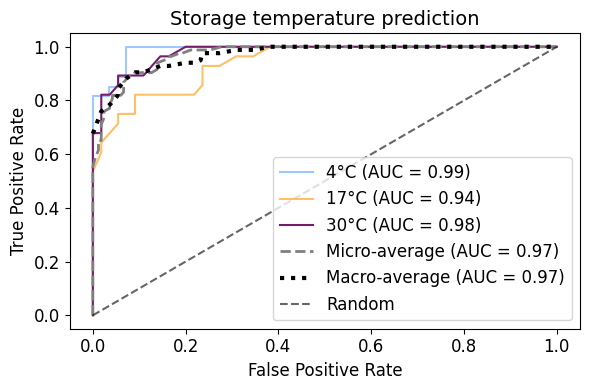

In [27]:
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true_all, classes=np.sort(y.unique()))
n_classes = y_true_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}

for i, temp in enumerate(np.sort(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_df.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro and micro average
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_df.values.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure(figsize=(8, 6))
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
temp_order = np.sort(y.unique())
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
plt.figure(figsize=(6, 4))

# Plot individual ROC curves
for i, temp in enumerate(temp_order):
    plt.plot(fpr[i], tpr[i], label=f'{temp}°C (AUC = {roc_auc[i]:.2f})', color=temp_colors[temp])

# Micro-average
plt.plot(fpr["micro"], tpr["micro"],
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
         linestyle='--', color='grey', linewidth=2)

# Macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label=f"Macro-average (AUC = {roc_auc['macro']:.2f})",
         linestyle=':', color='black', linewidth=3)

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random", alpha=0.6)

# Axis and title
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Storage temperature prediction', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.tight_layout()
# Save the figure
plt.savefig('Figures/20250524_FIA_tss_16S_ITS_temperature_ROCs.pdf', dpi=300, bbox_inches='tight')
plt.show()



In [28]:
# Final classifier after SelectFromModel
final_clf = model.named_steps['randomforestclassifier']

# Extract selected features
selected_mask = model.named_steps['selectfrommodel'].get_support()
selected_features = X.columns[selected_mask]

# Match importances
importances_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": final_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)


In [29]:
metabolome_annotations

mass hmdb_accession  \
Column Name                            
M272.1614    272.1614            NaN   
M149.0443    149.0443    HMDB0029398   
M134.0459    134.0459            NaN   
M128.0339    128.0339    HMDB0032916   
M413.1845    413.1845    HMDB0030401   
...               ...            ...   
M487.3036    487.3036            NaN   
M600.3885    600.3885            NaN   
M602.3878    602.3878            NaN   
M650.4282    650.4282            NaN   
M627.4082    627.4082            NaN   

                                                     hmdb_name      formula  \
Column Name                                                                   
M272.1614    (2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine   C12H23N3O4   
M149.0443                                (3-Nitroamino)alanine     C3H7N3O4   
M134.0459                                4-Hydroxy-L-threonine          NaN   
M128.0339                           4-Oxoproline, 5-Oxoproline       C6H8OS   
M413.1845                                           AK toxin I    C23H27NO6   
...                                                        ...          ...   
M487.3036                                                  NaN          NaN   
M600.3885                                                  NaN          NaN   
M602.3878                                                  NaN          NaN   
M650.4282                                                  NaN          NaN   
M627.4082                                                  NaN          NaN   

                                  sourdough_class  \
Column Name                                         
M272.1614    Amino acids, peptides, and analogues   
M149.0443    Amino acids, peptides, and analogues   
M134.0459    Amino acids, peptides, and analogues   
M128.0339    Amino acids, peptides, and analogues   
M413.1845    Amino acids, peptides, and analogues   
...                                           ...   
M487.3036                                     NaN   
M600.3885                                     NaN   
M602.3878                                     NaN   
M650.4282                                     NaN   
M627.4082                                     NaN   

                                        class  \
Column Name                                     
M272.1614    Carboxylic acids and derivatives   
M149.0443    Carboxylic acids and derivatives   
M134.0459    Carboxylic acids and derivatives   
M128.0339    Carboxylic acids and derivatives   
M413.1845    Carboxylic acids and derivatives   
...                                       ...   
M487.3036                                 NaN   
M600.3885                                 NaN   
M602.3878                                 NaN   
M650.4282                                 NaN   
M627.4082                                 NaN   

                                        sub_class  \
Column Name                                         
M272.1614    Amino acids, peptides, and analogues   
M149.0443    Amino acids, peptides, and analogues   
M134.0459    Amino acids, peptides, and analogues   
M128.0339    Amino acids, peptides, and analogues   
M413.1845    Amino acids, peptides, and analogues   
...                                           ...   
M487.3036                                     NaN   
M600.3885                                     NaN   
M602.3878                                     NaN   
M650.4282                                     NaN   
M627.4082                                     NaN   

                               super_class            kingdom  mass_diff  ...  \
Column Name                                                               ...   
M272.1614    Organic acids and derivatives                NaN        NaN  ...   
M149.0443    Organic acids and derivatives  Organic compounds    0.00064  ...   
M134.0459    Organic acids and derivatives                NaN        NaN  ...   
M128.0339    Organic acids and derivatives  O

In [37]:
#reset index of metabolome_annotations:
metabolome_annotations.reset_index(inplace=True)
metabolome_annotations

Column Name      mass hmdb_accession  \
0      M272.1614  272.1614            NaN   
1      M149.0443  149.0443    HMDB0029398   
2      M134.0459  134.0459            NaN   
3      M128.0339  128.0339    HMDB0032916   
4      M413.1845  413.1845    HMDB0030401   
...          ...       ...            ...   
1100   M487.3036  487.3036            NaN   
1101   M600.3885  600.3885            NaN   
1102   M602.3878  602.3878            NaN   
1103   M650.4282  650.4282            NaN   
1104   M627.4082  627.4082            NaN   

                                              hmdb_name      formula  \
0     (2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine   C12H23N3O4   
1                                 (3-Nitroamino)alanine     C3H7N3O4   
2                                 4-Hydroxy-L-threonine          NaN   
3                            4-Oxoproline, 5-Oxoproline       C6H8OS   
4                                            AK toxin I    C23H27NO6   
...                                                 ...          ...   
1100                                                NaN          NaN   
1101                                                NaN          NaN   
1102                                                NaN          NaN   
1103                                                NaN          NaN   
1104                                                NaN          NaN   

                           sourdough_class                             class  \
0     Amino acids, peptides, and analogues  Carboxylic acids and derivatives   
1     Amino acids, peptides, and analogues  Carboxylic acids and derivatives   
2     Amino acids, peptides, and analogues  Carboxylic acids and derivatives   
3     Amino acids, peptides, and analogues  Carboxylic acids and derivatives   
4     Amino acids, peptides, and analogues  Carboxylic acids and derivatives   
...                                    ...                               ...   
1100                                   NaN                               NaN   
1101                                   NaN                               NaN   
1102                                   NaN                               NaN   
1103                                   NaN                               NaN   
1104                                   NaN                               NaN   

                                 sub_class                    super_class  \
0     Amino acids, peptides, and analogues  Organic acids and derivatives   
1     Amino acids, peptides, and analogues  Organic acids and derivatives   
2     Amino acids, peptides, and analogues  Organic acids and derivatives   
3     Amino acids, peptides, and analogues  Organic acids and derivatives   
4     Amino acids, peptides, and analogues  Organic acids and derivatives   
...                                    ...                            ...   
1100                                   NaN                            NaN   
1101                                   NaN                            NaN   
1102                                   NaN                            NaN   
1103                                   NaN                            NaN   
1104                                   NaN                            NaN   

                kingdom  ...      tie_note    feature cluster kegg_mz_x  \
0                   NaN  ...           NaN  M272.1614       1  272.1619   
1     Organic compounds  ...  1 candidates        NaN       3       NaN   
2                   NaN  ...           NaN  M134.0459       1  134.0462   
3     Organic compounds  ...  6 candidates  M128.0339       1  128.0356   
4     Organic compounds  ...  1 candidates  M413.1845       1       NaN   
...                 ...  ...           ...        ...     ...       ...   
1100                NaN  ...           NaN        NaN       3       NaN   
1101                NaN  ...           NaN        NaN       3       NaN   
1102                NaN  ...          

In [38]:
# Plot top N
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

Feature  Importance Column Name  \
0    M203.0822    0.050929   M203.0822   
1    M937.4337    0.037591   M937.4337   
2      glucose    0.026905         NaN   
3    M147.0438    0.022665   M147.0438   
4    M413.1296    0.020051   M413.1296   
5    M413.1296    0.020051   M413.1296   
6    M413.1296    0.020051   M413.1296   
7    M937.6324    0.019246   M937.6324   
8    M251.0762    0.018279   M251.0762   
9    M387.1133    0.017295   M387.1133   
10   M134.0459    0.015064   M134.0459   
11   M134.0459    0.015064   M134.0459   
12   M505.1703    0.015022   M505.1703   
13   M299.0974    0.013734   M299.0974   
14   M535.2549    0.013685   M535.2549   
15  M1097.0441    0.011964  M1097.0441   
16   M712.4007    0.011889   M712.4007   
17     maltose    0.011747         NaN   
18    M154.061    0.011613    M154.061   
19   M165.0544    0.011258   M165.0544   
20   M531.1733    0.010286   M531.1733   
21   M316.0795    0.009916   M316.0795   
22    M427.124    0.008828    M427.124   
23    M871.388    0.008554    M871.388   
24    M937.833    0.008538    M937.833   
25   M415.1457    0.008179   M415.1457   
26   M328.2215    0.007898   M328.2215   
27   M649.2091    0.007772   M649.2091   

                                            hmdb_name  
0                           L-Tryptophan/D-Tryptophan  
1                                           M937.4337  
2                                             glucose  
3                                       Cinnamic acid  
4                                        Clavamycin A  
5                           alpha-1,5-L-Arabinotriose  
6                                          Flecainide  
7                                           M937.6324  
8                         N-Phenylacetylaspartic acid  
9   (R)-2-Hydroxy-7,8-dimethoxy-2H-1,4-benzoxazin-...  
10                              4-Hydroxy-L-threonine  
11                                            Adenine  
12                                          M505.1703  
13                 beta-D-Glucopyranosyl anthranilate  
14                      2alpha,7beta-Dihydroxytaxusin  
15                                         M1097.0441  
16                                          M712.4007  
17                                            maltose  
18                            L-Histidine/D-Histidine  
19                                          M165.0544  
20                                        Alkaloid RC  
21                                          M316.0795  
22                                           M427.124  
23                                           M871.388  
24                                           M937.833  
25                                          M415.1457  
26                               Corchorifatty acid F  
27                                          M649.2091

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_68526/3990376506.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


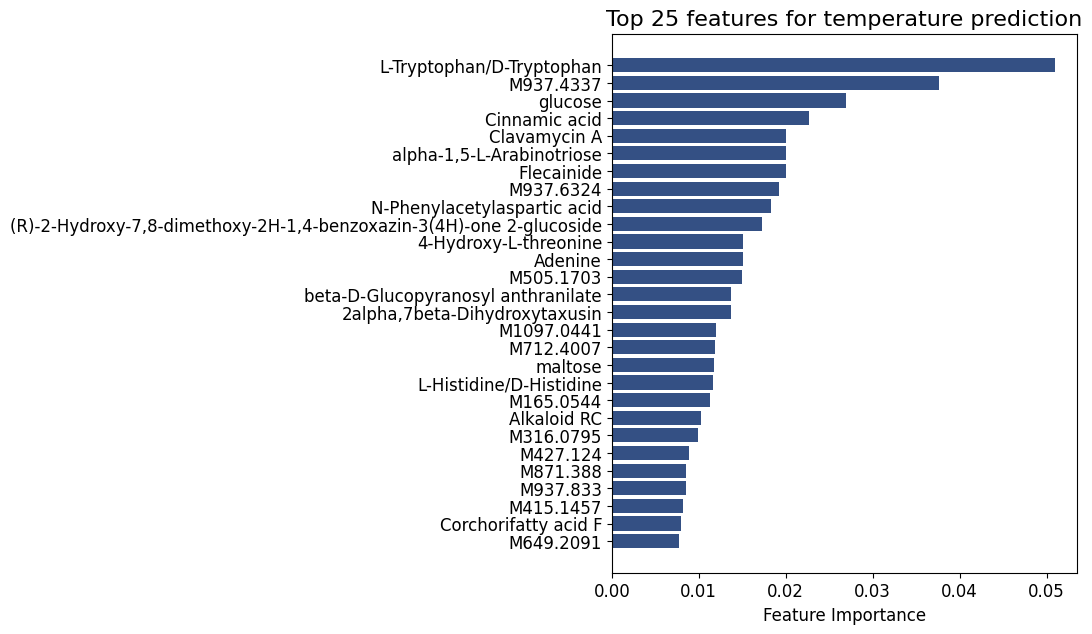

In [32]:
# Plot top N
# top_n = 25
# top_features = importances_df.head(top_n)

plt.figure(figsize=(6, 7))
plt.barh(top_features['hmdb_name'], top_features['Importance'], color='#345084FF')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for {y.name} prediction', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Figures/20250524_feature_importances_temperature_prediction.pdf", dpi=300, bbox_inches="tight")
plt.show()


In [72]:
#also export the feature importances list:
importances_df.to_csv('Stats/20250524_feature_importances_temperature_prediction.csv', index=False)

In [62]:
cluster_colors = {'0': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '1': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 '2': (1.0, 0.4980392156862745, 0.054901960784313725),
 'unknown': '#000000'}

# Example: color by taxonomy or class
color_dict = {
    'Amino acids, peptides, and analogues': '#155f8c',
 'Carbohydrates and carbohydrate conjugates': '#aec7e8',
 'Fatty acyls': '#ffbb78',
 'Glycerolipids': '#98df8a',
 'Glycerophospholipids': '#ff9896',
 'Nucleosides, nucleotides, and analogues': '#c5b0d5',
 'Organic acids and derivatives': '#8c564b',
 'Organoheterocyclic compounds': '#e377c2',
 'Other organic oxygen/nitrogen/sulfur compounds': '#7f7f7f',
 'Phenolic compounds': '#bcbd22',
 'Prenol lipids': '#17becf',
 'Steroids and steroid derivatives': '#9edae5'
    # ... etc.
}

In [41]:
imp

Feature  Importance Column Name                  hmdb_name  \
0     M203.0822    0.050929   M203.0822  L-Tryptophan/D-Tryptophan   
1     M937.4337    0.037591   M937.4337                  M937.4337   
2       glucose    0.026905         NaN                    glucose   
3     M147.0438    0.022665   M147.0438              Cinnamic acid   
4     M413.1296    0.020051   M413.1296               Clavamycin A   
..          ...         ...         ...                        ...   
903   M288.1547    0.000000   M288.1547          Arginylasparagine   
904   M1102.537    0.000000   M1102.537                  M1102.537   
905   M698.3639    0.000000   M698.3639                  M698.3639   
906  M1106.0738    0.000000  M1106.0738                 M1106.0738   
907   DNA yield    0.000000         NaN                  DNA yield   

                          sourdough_class  cluster  
0    Amino acids, peptides, and analogues      1.0  
1                                     NaN      0.0  
2                                     NaN      NaN  
3                      Phenolic compounds      1.0  
4    Amino acids, peptides, and analogues      2.0  
..                                    ...      ...  
903  Amino acids, peptides, and analogues      1.0  
904                                   NaN      1.0  
905                                   NaN      0.0  
906                                   NaN      0.0  
907                                   NaN      NaN  

[908 rows x 6 columns]

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_68526/1672584358.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


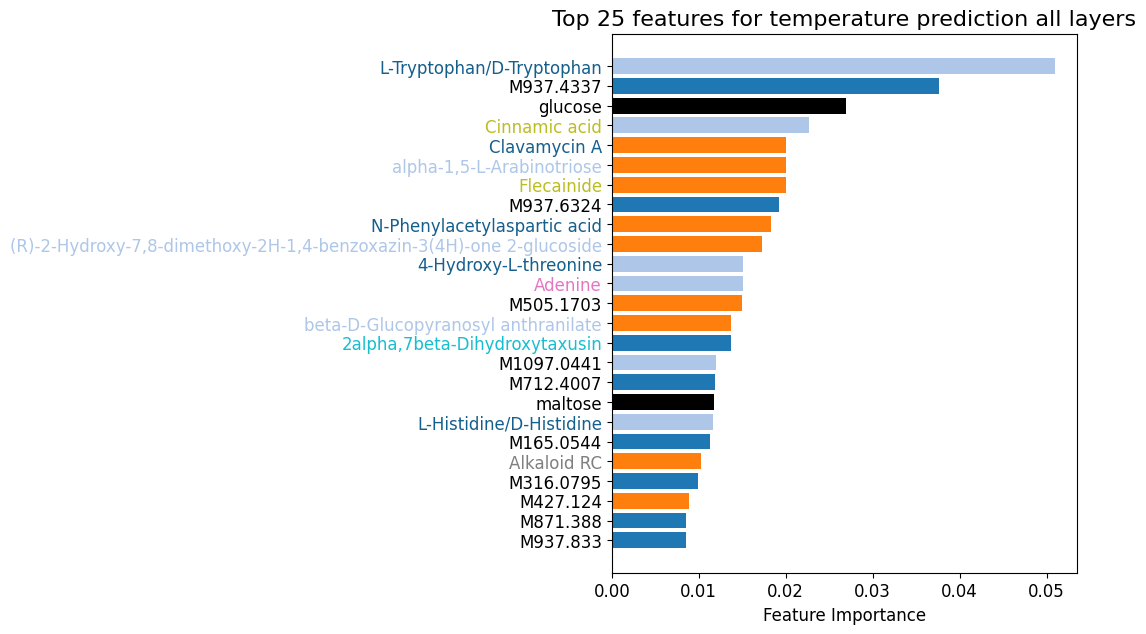

In [47]:
import matplotlib.pyplot as plt
#reimport:
imp = pd.read_csv('Stats/20250524_feature_importances_temperature_prediction.csv')
imp

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
imp = imp.merge(metabolome_annotations[['Column Name', 'hmdb_name', 'sourdough_class', 'cluster']], left_on='Feature', right_on='Column Name', how='left')
imp

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
imp['hmdb_name'] = imp['hmdb_name'].fillna(imp['Feature'])
imp

#do not allow decimal values in the cluster column:
imp['cluster'] = imp['cluster'].astype(str).str.split('.').str[0]  # Keep only the integer part

top_features = imp.head(25)
top_features

# Map cluster to bar colors and sourdough_class to label colors, with fallback to black for NaNs
bar_colors = top_features['cluster'].astype(str).map(cluster_colors).fillna('#000000')
label_colors = top_features['sourdough_class'].map(color_dict).fillna('#000000')

plt.figure(figsize=(6, 7))
bars = plt.barh(top_features['hmdb_name'], top_features['Importance'], color=bar_colors)

plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(range(len(top_features)), top_features['hmdb_name'], fontsize=12)

# Set the color of each ytick label safely
ax = plt.gca()
for tick_label, color in zip(ax.get_yticklabels(), label_colors):
    tick_label.set_color(color)

plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for temperature prediction all layers', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Figures/20250601_feature_importances_ful_integration_temperature_prediction.pdf", dpi=300, bbox_inches="tight")
plt.show()

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_87507/3869758882.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Greys")


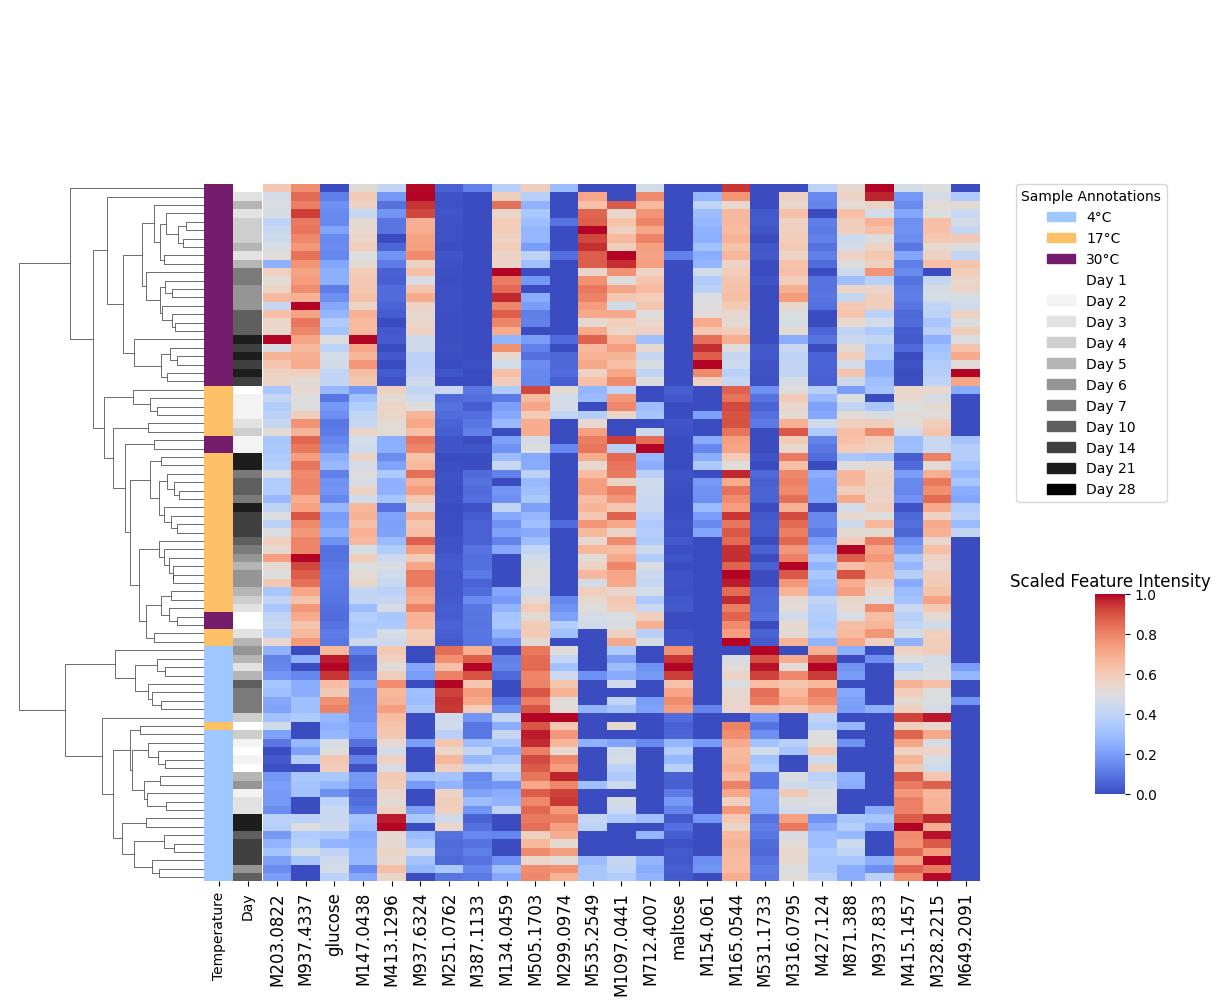

In [76]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
#import package to use cmap:




# # Ensure top_features comes from your final model
# importances = pd.Series(final_clf.feature_importances_, index=X_selected.columns)
# top_n = 25
# top_features = importances_df.head(top_n)
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

# Normalize top features
#selected_features = X.columns[selected_mask]
X_selected = X[selected_features]  # ← after applying SelectFromModel

X_top = X_selected[top_features["Feature"].values]

heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)

# Add metadata
heatmap_df["temperature"] = y
heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# Create color mappings
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Get 11 evenly spaced colors from white to black using the "Greys" colormap
cmap = cm.get_cmap("Greys")
colors = cmap(np.linspace(0, 1, 11))  # 0 is white, 1 is black

# Example: assign to days if you have 11 unique days
day_values = sorted(meta["day"].unique())[:11]  # ensure max 11 unique days
day_colors = dict(zip(day_values, colors))

# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))

# Row color bar
row_colors = pd.DataFrame({
    "Temperature": heatmap_df["temperature"].map(temp_colors),
    "Day": heatmap_df["day"].map(day_colors)
}, index=heatmap_df.index)

# Final heatmap data (drop metadata)
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])

# Plot
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    cmap="coolwarm",
    figsize=(10, 10),
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)

# Adjust labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Legends
temp_patches = [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()]
day_patches = [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()]
g.ax_heatmap.legend(
    handles=temp_patches + day_patches,
    title="Sample Annotations",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)

# Optional: save
#g.savefig("feature_expression_heatmap.pdf", dpi=300, bbox_inches='tight')



In [77]:
#import this csv: 20250516_fia_feature_table_z_filtered_significant_over_time_long_3clusters_features_per_cluster_annotated.csv

fia_clusters = pd.read_csv('FIA/20250516_fia_feature_table_z_filtered_significant_over_time_long_3clusters_features_per_cluster_annotated.csv', index_col=1)
fia_clusters

cluster   weight  feature2  Unnamed: 1_x  kegg_mz_x  sample_mz_x  \
feature                                                                       
M272.1614        1  272.161  M272.161          43.0   272.1619      272.161   
M302.0994        0  302.099  M302.099          51.0   302.0997      302.099   
M601.2658        1  601.266  M601.266          78.0   601.2673      601.266   
M134.0459        1  134.046  M134.046          10.0   134.0462      134.046   
M331.2071        0  331.207  M331.207          56.0   331.2082      331.207   
...            ...      ...       ...           ...        ...          ...   
M629.3289        1  629.329  M629.329           NaN        NaN          NaN   
M615.3079        1  615.308  M615.308           NaN        NaN          NaN   
M559.2901        1  559.290  M559.290           NaN        NaN          NaN   
M544.2744        1  544.274  M544.274           NaN        NaN          NaN   
M136.0753        1  136.075  M136.075           NaN        NaN          NaN   

           delta_mz_x     ppm_x  Exact.Mass_x   Compound_ID_x  ...  \
feature                                                        ...   
M272.1614      0.0009  3.306855      273.1689          C20279  ...   
M302.0994      0.0007  2.317116      303.1067          C20026  ...   
M601.2658      0.0013  2.162100      602.2743          C21433  ...   
M134.0459      0.0002  1.492023      135.0532  C03059, C06056  ...   
M331.2071      0.0012  3.623099      332.2152  C14488, C15127  ...   
...               ...       ...           ...             ...  ...   
M629.3289         NaN       NaN           NaN             NaN  ...   
M615.3079         NaN       NaN           NaN             NaN  ...   
M559.2901         NaN       NaN           NaN             NaN  ...   
M544.2744         NaN       NaN           NaN             NaN  ...   
M136.0753         NaN       NaN           NaN             NaN  ...   

          Unnamed: 1_y kegg_mz_y  sample_mz_y  delta_mz_y  ppm_y  \
feature                                                            
M272.1614          NaN       NaN          NaN         NaN    NaN   
M302.0994          NaN       NaN          NaN         NaN    NaN   
M601.2658          NaN       NaN          NaN         NaN    NaN   
M134.0459          NaN       NaN          NaN         NaN    NaN   
M331.2071          NaN       NaN          NaN         NaN    NaN   
...                ...       ...          ...         ...    ...   
M629.3289          NaN       NaN          NaN         NaN    NaN   
M615.3079          NaN       NaN          NaN         NaN    NaN   
M559.2901          NaN       NaN          NaN         NaN    NaN   
M544.2744          NaN       NaN          NaN         NaN    NaN   
M136.0753          NaN       NaN          NaN         NaN    NaN   

           Exact.Mass_y  Compound_ID_y  Name_y  Chemical.Formula_y  plusF_y  
feature                                                                      
M272.1614           NaN            NaN     NaN                 NaN      NaN  
M302.0994           NaN            NaN     NaN                 NaN      NaN  
M601.2658           NaN            NaN     NaN                 NaN      NaN  
M134.0459           NaN            NaN     NaN                 NaN      NaN  
M331.2071           NaN            NaN     NaN                 NaN      NaN  
...                 ...            ...     ...                 ...      ...  
M629.3289           NaN            NaN     NaN                 NaN      NaN  
M615.3079           NaN            NaN     NaN                 NaN      NaN  
M559.2901           NaN            NaN     NaN                 NaN      NaN  
M544.2744           NaN            NaN     NaN                 NaN      NaN  
M136.0753           NaN            NaN     NaN                 NaN      NaN  

[860 rows x 23 columns]

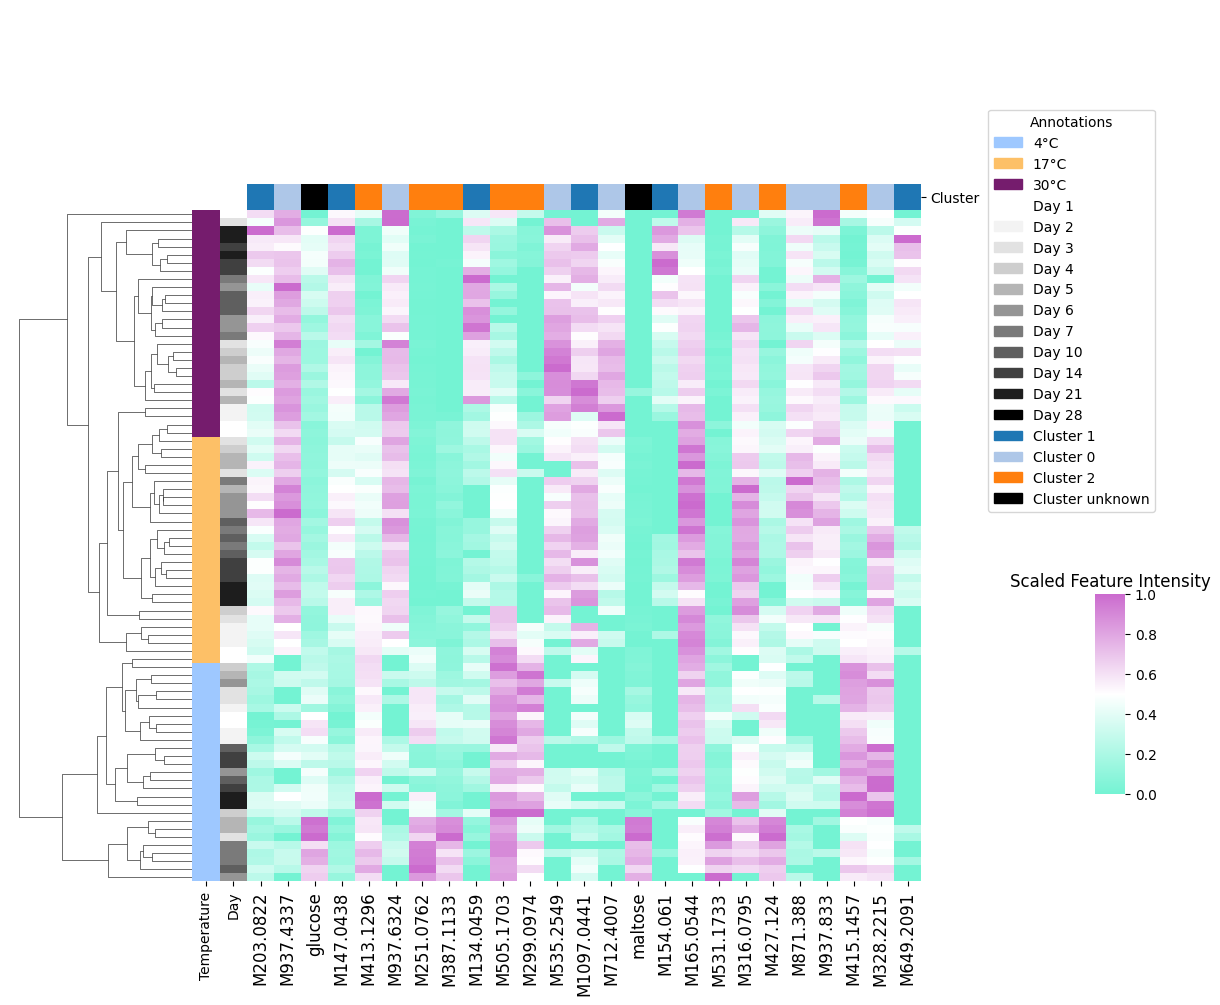

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
#import module for LinearSegmentedColormap:
from matplotlib.colors import LinearSegmentedColormap


# Get top N features from final importances
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features


# Extract and scale
X_top = X_selected[top_features["Feature"].values]
heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)


# --- Add metadata for annotations ---
heatmap_df["temperature"] = y_true_all.loc[heatmap_df.index]
heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# --- Define color maps ---
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))

# --- Row color bar ---
row_colors = pd.DataFrame({
    "Temperature": heatmap_df["temperature"].map(temp_colors),
    "Day": heatmap_df["day"].map(day_colors)
}, index=heatmap_df.index)

# --- Drop metadata for heatmap input ---
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])
# Extract cluster info only for selected features
selected_features = top_features["Feature"]

# Extract top N features by name
feature_names = top_features["Feature"].values

# Drop duplicates in FIA cluster table to avoid index clashes
fia_clusters_clean = fia_clusters[~fia_clusters.index.duplicated(keep="first")]

# Map cluster labels to feature names, fallback to "unknown"
feature_clusters = pd.Series("unknown", index=feature_names)
in_fia = pd.Index(feature_names).intersection(fia_clusters_clean.index)
feature_clusters.loc[in_fia] = fia_clusters_clean.loc[in_fia, "cluster"].astype(str)
# Create palette
unique_clusters = feature_clusters.unique()
real_clusters = [c for c in unique_clusters if c != "unknown"]
cluster_palette = sns.color_palette("tab20", n_colors=len(real_clusters))
cluster_colors = dict(zip(real_clusters, cluster_palette))
cluster_colors["unknown"] = "#000000"

# Map colors to cluster assignments
cluster_color_row = feature_clusters.map(cluster_colors)







# Make a DataFrame for column color annotation
col_colors_df = pd.DataFrame([cluster_color_row], index=["Cluster"], columns=feature_names)



from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering

##################
# Step 1: Create numeric encoding of temp-phase
phase_order = [4, 17, 30]
phase_encoder = {label: i for i, label in enumerate(phase_order)}
phase_vector = meta_aligned.loc[data_for_heatmap.index, "temperature"].map(phase_encoder)

# Step 2: Compute pairwise distances and linkage
row_dist = pdist(data_for_heatmap.values, metric="euclidean")
row_linkage = linkage(row_dist, method="average")

# Step 3: Optimal leaf ordering based on temp-phase distances
# Create an artificial distance matrix from phase order
phase_dist = pdist(phase_vector.values[:, None], metric="euclidean")
row_linkage_ordered = optimal_leaf_ordering(row_linkage, phase_dist)

# Use `row_linkage_ordered` in sns.clustermap as you already do:
# g = sns.clustermap(..., row_linkage=row_linkage_ordered, ...)

###################
# Compute distance matrix and hierarchical clustering
# row_dists = pdist(data_for_heatmap.values, metric="euclidean")
# row_linkage = linkage(row_dists, method="average")

# # Apply optimal leaf ordering to the clustering
# row_linkage_ordered = optimal_leaf_ordering(row_linkage, row_dists)
custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=["#74F3D3FF", "#FFFFFF", "#CB6BCEFF"],
    N=500
)
# --- Plot the clustermap ---
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    col_colors=col_colors_df.T,
    cmap=custom_cmap,
    figsize=(10, 10),
    row_linkage=row_linkage_ordered,  # ← KEY LINE
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)

import matplotlib.gridspec as gridspec

# --- After g = sns.clustermap(...) --



# Format axis labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Combine all legend patches in one call
all_patches = (
    [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()] +
    [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()] +
    [mpatches.Patch(color=color, label=f"Cluster {cl}") for cl, color in cluster_colors.items()]
)

# Add single legend
g.ax_heatmap.legend(
    handles=all_patches,
    title="Annotations",
    bbox_to_anchor=(1.1, 1.15),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)


# Optional: save figure
g.savefig("Figures/20250524_feature_expression_heatmap_temperature_prediction.pdf", dpi=300, bbox_inches='tight')


### now also get shap values per temperature class:

first extract transformed input and classifier

In [44]:
# Apply transformations manually
X_scaled = pipeline.named_steps['scaler'].transform(X)
selected_mask = pipeline.named_steps['selector'].get_support()
X_selected = pd.DataFrame(X_scaled[:, selected_mask], index=X.index, columns=X.columns[selected_mask])

# Get final classifier
final_clf = pipeline.named_steps['clf']



NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

->> ok leave it for now since I used cross validation it is discarded after each loop, so not that straight forward to get shaps...

In [ ]:
# import shap

# explainer = shap.TreeExplainer(final_clf)
# shap_values = explainer.shap_values(X_selected)


### alright and now do the same for the days:

In [82]:
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import seaborn as sns

from sklearn.pipeline import make_pipeline

# Combine features, prepare labels
#X = pd.concat([bact_aligned_m, fia_aligned], axis=1) can use the same as before, including the transformations
y = meta_aligned["day"]
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_all = []
y_proba_all = []

# Collect predicted probabilities and true labels
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit pipeline
    model = make_pipeline(
        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median'),
        RandomForestClassifier(n_estimators=100, random_state=42)
    )
    model.fit(X_train, y_train)
    
    y_proba = model.predict_proba(X_test)
    y_true_all.extend(y_test.values)
    y_proba_all.append(pd.DataFrame(y_proba, columns=model.named_steps['randomforestclassifier'].classes_, index=X_test.index))

# Concatenate predicted probabilities
y_proba_df = pd.concat(y_proba_all)
y_true_all = pd.Series(y_true_all, index=y_proba_df.index)


<Figure size 800x600 with 0 Axes>

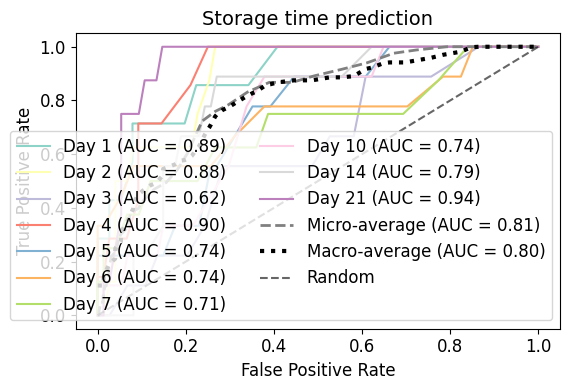

In [85]:


from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true_all, classes=np.sort(y.unique()))
n_classes = y_true_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}

for i, temp in enumerate(np.sort(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_df.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro and micro average
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_df.values.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure(figsize=(8, 6))
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
# temp_order = np.sort(y.unique())
# temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
# Create color mapping for days (not temperatures)
day_order = np.sort(y.unique())
day_palette = sns.color_palette("Set3", len(day_order))
day_colors = dict(zip(day_order, day_palette))

plt.figure(figsize=(6, 4))

for i, day in enumerate(day_order):
    plt.plot(fpr[i], tpr[i], label=f'Day {day} (AUC = {roc_auc[i]:.2f})', color=day_colors[day])


# Micro-average
plt.plot(fpr["micro"], tpr["micro"],
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
         linestyle='--', color='grey', linewidth=2)

# Macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label=f"Macro-average (AUC = {roc_auc['macro']:.2f})",
         linestyle=':', color='black', linewidth=3)

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random", alpha=0.6)

# Axis and title
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Storage time prediction', fontsize=14)
plt.legend(loc='lower right', fontsize=12, ncol= 2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.tight_layout()
# Save the figure
plt.savefig('Figures/20250524_FIA_tss_16S_ITS_ROCs.pdf', dpi=300, bbox_inches='tight')
plt.show()



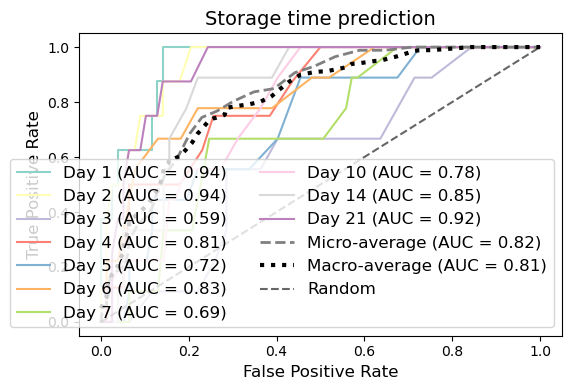

In [173]:
plt.figure(figsize=(6, 4))

for i, day in enumerate(day_order):
    plt.plot(fpr[i], tpr[i], label=f'Day {day} (AUC = {roc_auc[i]:.2f})', color=day_colors[day])


# Micro-average
plt.plot(fpr["micro"], tpr["micro"],
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
         linestyle='--', color='grey', linewidth=2)

# Macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label=f"Macro-average (AUC = {roc_auc['macro']:.2f})",
         linestyle=':', color='black', linewidth=3)

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random", alpha=0.6)

# Axis and title
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Storage time prediction', fontsize=14)
plt.legend(loc='lower right', fontsize=12, ncol= 2)
plt.grid(False)
plt.tight_layout()
# Save the figure
plt.savefig('Figures/20250517_FIA_tss_16S_ROCs_time.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [86]:
# Final classifier after SelectFromModel
final_clf = model.named_steps['randomforestclassifier']

# Extract selected features
selected_mask = model.named_steps['selectfrommodel'].get_support()
selected_features = X.columns[selected_mask]

# Match importances
importances_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": final_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

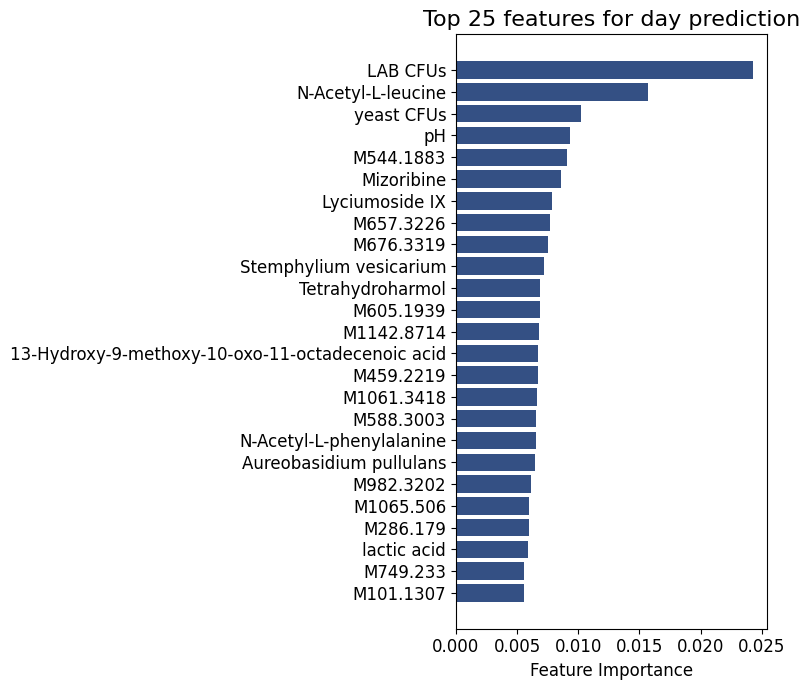

In [90]:
# Plot top N
# top_n = 25
# top_features = importances_df.head(top_n)
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

plt.figure(figsize=(8, 7))
plt.barh(top_features['hmdb_name'], top_features['Importance'], color='#345084FF')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for {y.name} prediction', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Figures/20250524_feature_importances_day_prediction.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [91]:
#also export the feature importances list:
importances_df.to_csv('Stats/20250524_feature_importances_day_prediction.csv', index=False)

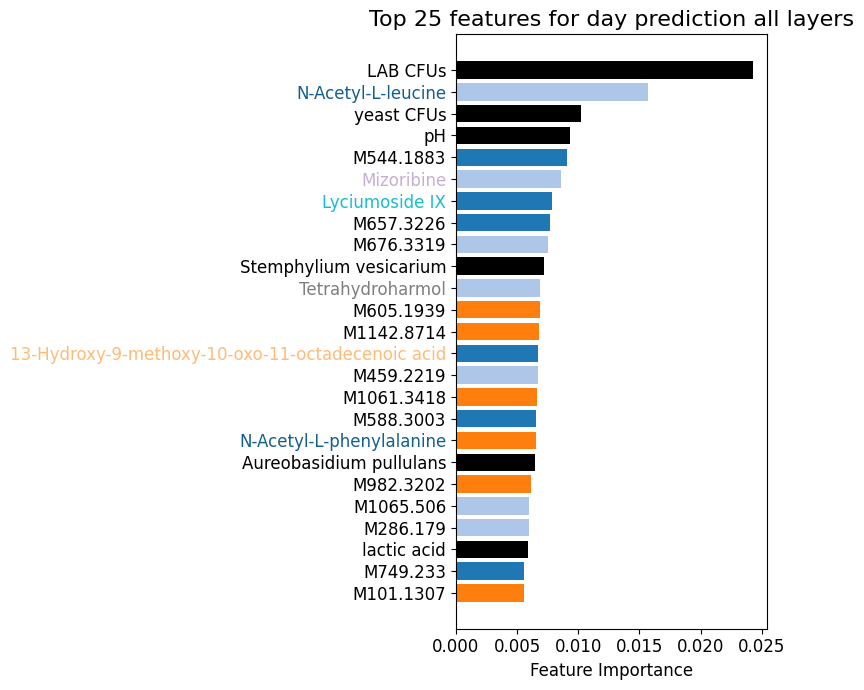

In [49]:
import matplotlib.pyplot as plt
#reimport:
imp = pd.read_csv('Stats/20250524_feature_importances_day_prediction.csv')
imp

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
imp = imp.merge(metabolome_annotations[['Column Name', 'hmdb_name', 'sourdough_class', 'cluster']], left_on='Feature', right_on='Column Name', how='left')
imp

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
imp['hmdb_name'] = imp['hmdb_name'].fillna(imp['Feature'])
imp

#do not allow decimal values in the cluster column:
imp['cluster'] = imp['cluster'].astype(str).str.split('.').str[0]  # Keep only the integer part

top_features = imp.head(25)
top_features

# Map cluster to bar colors and sourdough_class to label colors, with fallback to black for NaNs
bar_colors = top_features['cluster'].astype(str).map(cluster_colors).fillna('#000000')
label_colors = top_features['sourdough_class'].map(color_dict).fillna('#000000')

plt.figure(figsize=(8, 7))
bars = plt.barh(top_features['hmdb_name'], top_features['Importance'], color=bar_colors)

plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(range(len(top_features)), top_features['hmdb_name'], fontsize=12)

# Set the color of each ytick label safely
ax = plt.gca()
for tick_label, color in zip(ax.get_yticklabels(), label_colors):
    tick_label.set_color(color)

plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for day prediction all layers', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Figures/20250601_feature_importances_ful_integration_day_prediction.pdf", dpi=300, bbox_inches="tight")
plt.show()

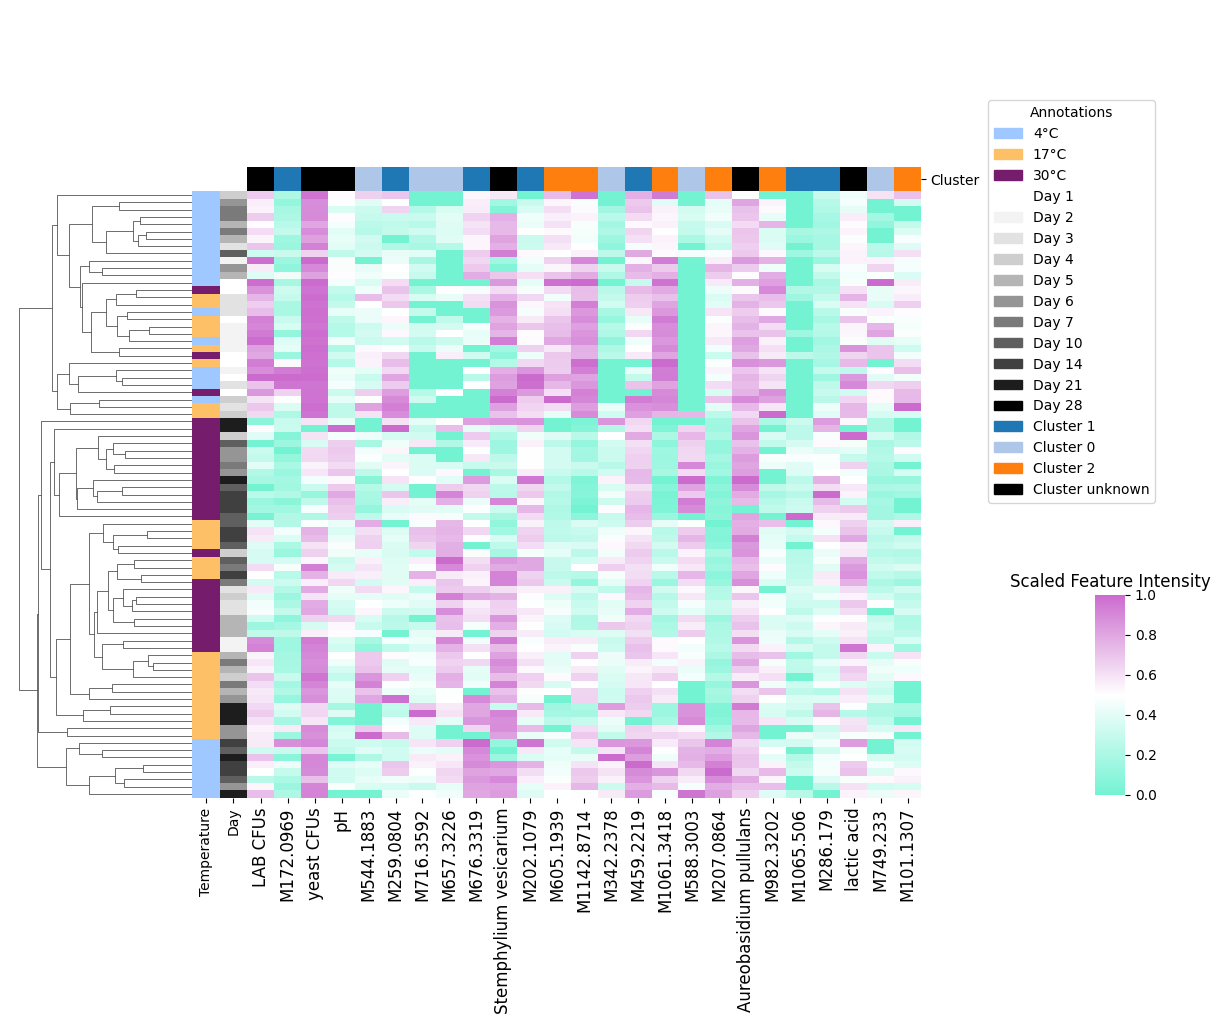

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# # Ensure top_features comes from your final model
# importances = pd.Series(final_clf.feature_importances_, index=X_selected.columns)
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

# Normalize top features
#selected_features = X.columns[selected_mask]
X_selected = X[selected_features]  # ← after applying SelectFromModel

X_top = X_selected[top_features["Feature"].values]

heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)

# --- Add metadata for annotations ---
heatmap_df["temperature"] = meta_aligned.loc[heatmap_df.index, "temperature"]

heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# --- Define color maps ---
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))

# --- Row color bar ---
row_colors = pd.DataFrame({
    "Temperature": heatmap_df["temperature"].map(temp_colors),
    "Day": heatmap_df["day"].map(day_colors)
}, index=heatmap_df.index)

# --- Drop metadata for heatmap input ---
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])
# Extract cluster info only for selected features
selected_features = top_features["Feature"]
# Extract top N features by name
feature_names = top_features["Feature"].values
# Drop duplicates in FIA cluster table to avoid index clashes
fia_clusters_clean = fia_clusters[~fia_clusters.index.duplicated(keep="first")]

# Map cluster labels to feature names, fallback to "unknown"
feature_clusters = pd.Series("unknown", index=feature_names)
in_fia = pd.Index(feature_names).intersection(fia_clusters_clean.index)
feature_clusters.loc[in_fia] = fia_clusters_clean.loc[in_fia, "cluster"].astype(str)
# Create palette
unique_clusters = feature_clusters.unique()
real_clusters = [c for c in unique_clusters if c != "unknown"]
cluster_palette = sns.color_palette("tab20", n_colors=len(real_clusters))
cluster_colors = dict(zip(real_clusters, cluster_palette))
cluster_colors["unknown"] = "#000000"

# Map colors to cluster assignments
cluster_color_row = feature_clusters.map(cluster_colors)

# Make a DataFrame for column color annotation
col_colors_df = pd.DataFrame([cluster_color_row], index=["Cluster"], columns=feature_names)


# phase_order = [1, 2, 3, 4, 5, 6, 7, 10, 14, 21, 28]
phase_order = [4, 17, 30]
phase_encoder = {label: i for i, label in enumerate(phase_order)}
phase_vector = meta_aligned.loc[data_for_heatmap.index, "temperature"].map(phase_encoder)

# Step 2: Compute pairwise distances and linkage
row_dist = pdist(data_for_heatmap.values, metric="euclidean")
row_linkage = linkage(row_dist, method="average")

# Step 3: Optimal leaf ordering based on temp-phase distances
# Create an artificial distance matrix from phase order
phase_dist = pdist(phase_vector.values[:, None], metric="euclidean")
row_linkage_ordered = optimal_leaf_ordering(row_linkage, phase_dist)

# Use `row_linkage_ordered` in sns.clustermap as you already do:
# g = sns.clustermap(..., row_linkage=row_linkage_ordered, ...)


custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=["#74F3D3FF", "#FFFFFF", "#CB6BCEFF"],
    N=500
)
# --- Plot the clustermap ---
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    col_colors=col_colors_df.T,
    cmap=custom_cmap,
    figsize=(10, 10),
    row_linkage = row_linkage_ordered,  # ← KEY LINE
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)
import matplotlib.gridspec as gridspec

# --- After g = sns.clustermap(...) --



# Format axis labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Combine all legend patches in one call
all_patches = (
    [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()] +
    [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()] +
    [mpatches.Patch(color=color, label=f"Cluster {cl}") for cl, color in cluster_colors.items()]
)

# Add single legend
g.ax_heatmap.legend(
    handles=all_patches,
    title="Annotations",
    bbox_to_anchor=(1.1, 1.15),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)


# Optional: save figure
g.savefig("Figures/20250524_feature_expression_heatmap_day_prediction.pdf", dpi=300, bbox_inches='tight')



### now predict the temp-time period/phase (1,2 or 3) and see whether it gets better than just 'day' or just temperature

In [63]:
meta_aligned.columns.to_list()

['Unnamed: 0',
 'Chao1 kmers ITS',
 'Chao1 OTUs ITS',
 'Chao1 ASVs ITS',
 'Chao1 kmers',
 'Chao1 OTUs',
 'Chao1 ASVs',
 'identifier',
 'row',
 'column',
 'temperature',
 'day',
 'phase',
 'phase2',
 'temp-phase',
 'temp-phase2',
 'replicate',
 'well',
 'DNA yield',
 'DNA_total_yield_per_1g',
 'pH',
 'TTA',
 'estimate_bact',
 'estimate_bact_CFUs',
 'LAB CFUs',
 'LAB_counts',
 'bac_diff',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'Observed features ASVs',
 'Observed features OTUs',
 'Observed features kmers',
 'Shannon ASVs',
 'Evenness ASVs',
 'Simpson ASVs',
 'Shannon OTUs',
 'Evenness OTUs',
 'Simpson OTUs',
 'Shannon kmers',
 'Evenness kmers',
 'Simpson kmers',
 'color',
 'color2',
 'Observed features ASVs ITS',
 'Observed features OTUs ITS',
 'Observed features kmers ITS',
 'Shannon ASVs ITS',
 'Evenness ASVs ITS',
 'Simpson ASVs ITS',
 'Shannon OTUs ITS',
 'Evenness OTUs ITS',
 'Simpso

In [64]:
#exchange the '.' in the column 'temp-phase' in meta_aligned with '_':
#first make the 'temp-phase' column to string:
meta_aligned['temp-phase2'] = meta_aligned['temp-phase2'].astype(str)
meta_aligned['temp-phase2'] = meta_aligned['temp-phase2'].str.replace('.', '_')


In [65]:
meta_aligned['temp-phase2'].unique()

array(['30_3', '17_1', '30_2', '4_1', '17_2', '17_3', '30_1', '4_2',
       '4_3'], dtype=object)

In [66]:
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import seaborn as sns

from sklearn.pipeline import make_pipeline

# Combine features, prepare labels
#X = pd.concat([bact_aligned_m, fia_aligned], axis=1)
y = meta_aligned["temp-phase2"]
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_all = []
y_proba_all = []

# Collect predicted probabilities and true labels
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit pipeline
    model = make_pipeline(
        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median'),
        RandomForestClassifier(n_estimators=100, random_state=42)
    )
    model.fit(X_train, y_train)
    
    y_proba = model.predict_proba(X_test)
    y_true_all.extend(y_test.values)
    y_proba_all.append(pd.DataFrame(y_proba, columns=model.named_steps['randomforestclassifier'].classes_, index=X_test.index))

# Concatenate predicted probabilities
y_proba_df = pd.concat(y_proba_all)
y_true_all = pd.Series(y_true_all, index=y_proba_df.index)

<Figure size 800x600 with 0 Axes>

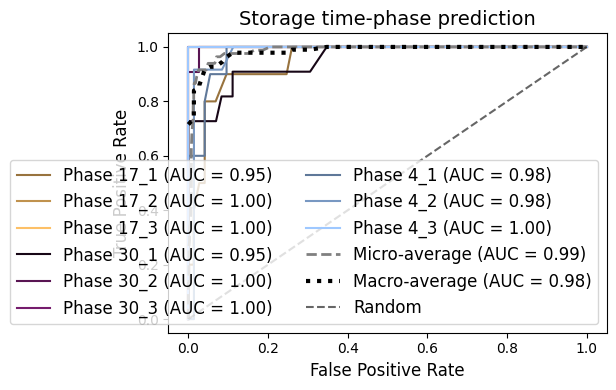

In [67]:
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true_all, classes=np.sort(y.unique()))
n_classes = y_true_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}

for i, temp in enumerate(np.sort(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_df.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro and micro average
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_df.values.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure(figsize=(8, 6))
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
temp_order = np.sort(y.unique())
temp_colors = {'4_1': "#5f7899", '4_2': "#7898c2", '4_3': "#9ec8ff", '17_1': "#98733e", '17_2': "#c0924e", 
               '17_3': "#fdc067", '30_1': "#170616", '30_2': "#591553", '30_3': "#751c6d"}
plt.figure(figsize=(6, 4))

# Plot individual ROC curves
for i, temp in enumerate(temp_order):
    plt.plot(fpr[i], tpr[i], label=f'Phase {temp} (AUC = {roc_auc[i]:.2f})', color=temp_colors[temp])

# Micro-average
plt.plot(fpr["micro"], tpr["micro"],
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
         linestyle='--', color='grey', linewidth=2)

# Macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label=f"Macro-average (AUC = {roc_auc['macro']:.2f})",
         linestyle=':', color='black', linewidth=3)

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random", alpha=0.6)

# Axis and title
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Storage time-phase prediction', fontsize=14)
plt.legend(loc='lower right', fontsize=12, ncol= 2)
plt.grid(False)
plt.tight_layout()
# Save the figure
#plt.savefig('Figures/20250524_FIA_tss_16S_ITS_temp_time_phase_ROCs.pdf', dpi=300, bbox_inches='tight')
plt.show()



In [68]:
# Final classifier after SelectFromModel
final_clf = model.named_steps['randomforestclassifier']

# Extract selected features
selected_mask = model.named_steps['selectfrommodel'].get_support()
selected_features = X.columns[selected_mask]

# Match importances
importances_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": final_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

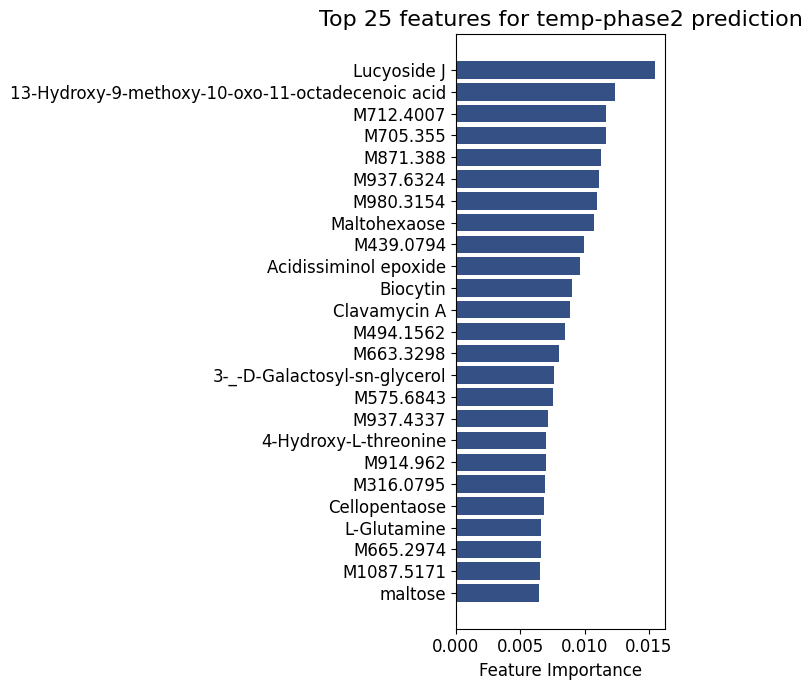

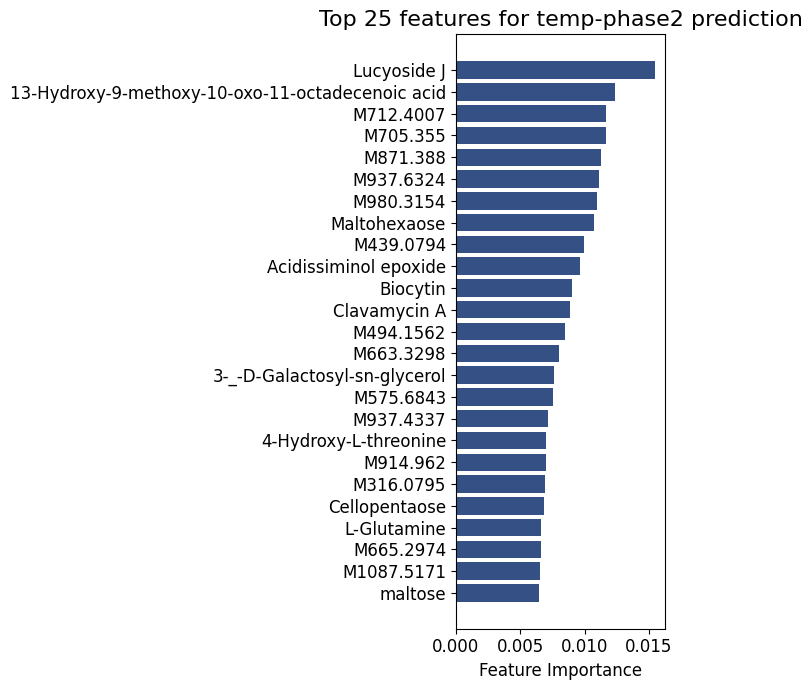

In [82]:
# Plot top N
top_n = 25
imp = imp.sort_values(by='Importance', ascending=False)
top_features = imp.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

plt.figure(figsize=(7, 7))
plt.barh(top_features['hmdb_name'], top_features['Importance'], color='#345084FF')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for {y.name} prediction', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
#plt.savefig("Figures/20250524_feature_importances_temperature_phase_prediction.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [103]:
#also export the feature importances list:
importances_df.to_csv('Stats/20250524_feature_importances_temperature_phase_prediction.csv', index=False)

In [71]:
imp = pd.read_csv('Stats/20250524_feature_importances_temperature_phase_prediction.csv')
imp.head(25)

Feature  Importance
0    M810.4369    0.015489
1    M342.2378    0.012343
2    M712.4007    0.011681
3     M705.355    0.011647
4     M871.388    0.011287
5    M937.6324    0.011148
6    M980.3154    0.010929
7    M989.3216    0.010713
8    M439.0794    0.009984
9    M409.2219    0.009624
10   M372.1872    0.009021
11   M413.1296    0.008836
12   M494.1562    0.008486
13   M663.3298    0.007996
14   M253.0917    0.007622
15   M575.6843    0.007582
16   M937.4337    0.007170
17   M134.0459    0.007009
18    M914.962    0.006997
19   M316.0795    0.006908
20    M827.268    0.006863
21   M145.0608    0.006640
22   M665.2974    0.006623
23  M1087.5171    0.006501
24     maltose    0.006457

In [72]:
metabolome_annotations

Column Name      mass hmdb_accession  \
0      M272.1614  272.1614            NaN   
1      M149.0443  149.0443    HMDB0029398   
2      M134.0459  134.0459            NaN   
3      M128.0339  128.0339    HMDB0032916   
4      M413.1845  413.1845    HMDB0030401   
...          ...       ...            ...   
1100   M487.3036  487.3036            NaN   
1101   M600.3885  600.3885            NaN   
1102   M602.3878  602.3878            NaN   
1103   M650.4282  650.4282            NaN   
1104   M627.4082  627.4082            NaN   

                                              hmdb_name      formula  \
0     (2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine   C12H23N3O4   
1                                 (3-Nitroamino)alanine     C3H7N3O4   
2                                 4-Hydroxy-L-threonine          NaN   
3                            4-Oxoproline, 5-Oxoproline       C6H8OS   
4                                            AK toxin I    C23H27NO6   
...                                                 ...          ...   
1100                                                NaN          NaN   
1101                                                NaN          NaN   
1102                                                NaN          NaN   
1103                                                NaN          NaN   
1104                                                NaN          NaN   

                           sourdough_class                             class  \
0     Amino acids, peptides, and analogues  Carboxylic acids and derivatives   
1     Amino acids, peptides, and analogues  Carboxylic acids and derivatives   
2     Amino acids, peptides, and analogues  Carboxylic acids and derivatives   
3     Amino acids, peptides, and analogues  Carboxylic acids and derivatives   
4     Amino acids, peptides, and analogues  Carboxylic acids and derivatives   
...                                    ...                               ...   
1100                                   NaN                               NaN   
1101                                   NaN                               NaN   
1102                                   NaN                               NaN   
1103                                   NaN                               NaN   
1104                                   NaN                               NaN   

                                 sub_class                    super_class  \
0     Amino acids, peptides, and analogues  Organic acids and derivatives   
1     Amino acids, peptides, and analogues  Organic acids and derivatives   
2     Amino acids, peptides, and analogues  Organic acids and derivatives   
3     Amino acids, peptides, and analogues  Organic acids and derivatives   
4     Amino acids, peptides, and analogues  Organic acids and derivatives   
...                                    ...                            ...   
1100                                   NaN                            NaN   
1101                                   NaN                            NaN   
1102                                   NaN                            NaN   
1103                                   NaN                            NaN   
1104                                   NaN                            NaN   

                kingdom  ...      tie_note    feature cluster kegg_mz_x  \
0                   NaN  ...           NaN  M272.1614       1  272.1619   
1     Organic compounds  ...  1 candidates        NaN       3       NaN   
2                   NaN  ...           NaN  M134.0459       1  134.0462   
3     Organic compounds  ...  6 candidates  M128.0339       1  128.0356   
4     Organic compounds  ...  1 candidates  M413.1845       1       NaN   
...                 ...  ...           ...        ...     ...       ...   
1100                NaN  ...           NaN        NaN       3       NaN   
1101                NaN  ...           NaN        NaN       3       NaN   
1102                NaN  ...          

In [78]:
imp_sort = imp.sort_values(by='Importance', ascending=False).head(25)
imp_sort

Feature  Importance
0    M810.4369    0.015489
1    M342.2378    0.012343
2    M712.4007    0.011681
3     M705.355    0.011647
4     M871.388    0.011287
5    M937.6324    0.011148
6    M980.3154    0.010929
7    M989.3216    0.010713
8    M439.0794    0.009984
9    M409.2219    0.009624
10   M372.1872    0.009021
11   M413.1296    0.008836
12   M494.1562    0.008486
13   M663.3298    0.007996
14   M253.0917    0.007622
15   M575.6843    0.007582
16   M937.4337    0.007170
17   M134.0459    0.007009
18    M914.962    0.006997
19   M316.0795    0.006908
20    M827.268    0.006863
21   M145.0608    0.006640
22   M665.2974    0.006623
23  M1087.5171    0.006501
24     maltose    0.006457

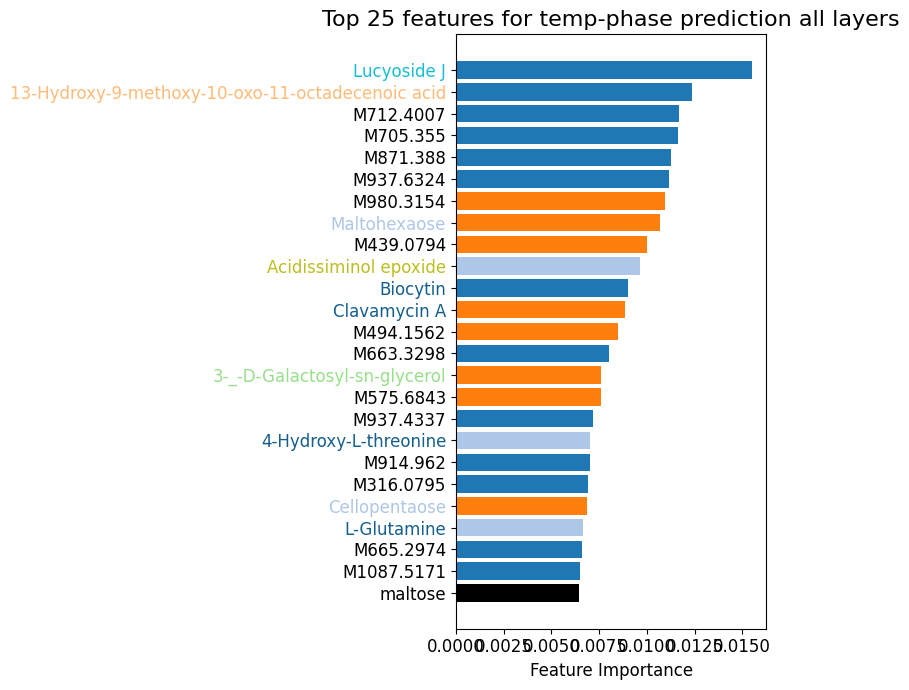

In [84]:
import matplotlib.pyplot as plt
#reimport:
# imp = pd.read_csv('Stats/20250524_feature_importances_temperature_phase_prediction.csv')
# # imp
# #merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
# top_features = imp.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
# top_features
# #drop duplicates:
# top_features = top_features.drop_duplicates(subset=['Feature'])
top_n = 25
imp = imp.sort_values(by='Importance', ascending=False)
top_features = imp.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name', 'sourdough_class', 'cluster']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

#####################



#do not allow decimal values in the cluster column:
top_features['cluster'] = top_features['cluster'].astype(str).str.split('.').str[0]  # Keep only the integer part
top_features = top_features.sort_values(by='Importance', ascending=False)

top_features = top_features.head(25)
top_features

# Map cluster to bar colors and sourdough_class to label colors, with fallback to black for NaNs
bar_colors = top_features['cluster'].astype(str).map(cluster_colors).fillna('#000000')
label_colors = top_features['sourdough_class'].map(color_dict).fillna('#000000')

plt.figure(figsize=(8, 7))
bars = plt.barh(top_features['hmdb_name'], top_features['Importance'], color=bar_colors)

plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(range(len(top_features)), top_features['hmdb_name'], fontsize=12)

# Set the color of each ytick label safely
ax = plt.gca()
for tick_label, color in zip(ax.get_yticklabels(), label_colors):
    tick_label.set_color(color)

plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for temp-phase prediction all layers', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Figures/20250601_feature_importances_ful_integration_temp_phase_prediction.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [85]:
top_features

Feature  Importance Column Name  \
0    M810.4369    0.015489   M810.4369   
1    M342.2378    0.012343   M342.2378   
2    M712.4007    0.011681   M712.4007   
3     M705.355    0.011647    M705.355   
4     M871.388    0.011287    M871.388   
5    M937.6324    0.011148   M937.6324   
6    M980.3154    0.010929   M980.3154   
7    M989.3216    0.010713   M989.3216   
8    M439.0794    0.009984   M439.0794   
9    M409.2219    0.009624   M409.2219   
10   M372.1872    0.009021   M372.1872   
11   M413.1296    0.008836   M413.1296   
14   M494.1562    0.008486   M494.1562   
15   M663.3298    0.007996   M663.3298   
16   M253.0917    0.007622   M253.0917   
17   M575.6843    0.007582   M575.6843   
18   M937.4337    0.007170   M937.4337   
19   M134.0459    0.007009   M134.0459   
21    M914.962    0.006997    M914.962   
22   M316.0795    0.006908   M316.0795   
23    M827.268    0.006863    M827.268   
24   M145.0608    0.006640   M145.0608   
25   M665.2974    0.006623   M665.2974   
26  M1087.5171    0.006501  M1087.5171   
27     maltose    0.006457         NaN   

                                           hmdb_name  \
0                                        Lucyoside J   
1   13-Hydroxy-9-methoxy-10-oxo-11-octadecenoic acid   
2                                          M712.4007   
3                                           M705.355   
4                                           M871.388   
5                                          M937.6324   
6                                          M980.3154   
7                                       Maltohexaose   
8                                          M439.0794   
9                              Acidissiminol epoxide   
10                                          Biocytin   
11                                      Clavamycin A   
14                                         M494.1562   
15                                         M663.3298   
16                      3-_-D-Galactosyl-sn-glycerol   
17                                         M575.6843   
18                                         M937.4337   
19                             4-Hydroxy-L-threonine   
21                                          M914.962   
22                                         M316.0795   
23                                     Cellopentaose   
24                                       L-Glutamine   
25                                         M665.2974   
26                                        M1087.5171   
27                                           maltose   

                              sourdough_class cluster  
0                               Prenol lipids       0  
1                                 Fatty acyls       0  
2                                         NaN       0  
3                                         NaN       0  
4                                         NaN       0  
5                                         NaN       0  
6                                         NaN       2  
7   Carbohydrates and carbohydrate conjugates       2  
8                                         NaN       2  
9                          Phenolic compounds       1  
10       Amino acids, peptides, and analogues       0  
11       Amino acids, peptides, and analogues       2  
14                                        NaN       2  
15                                        NaN       0  
16                              Glycerolipids       2  
17                                        NaN       2  
18                                        NaN       0  
19       Amino acids, peptides, and analogues       1  
21                                        NaN       0  
22                                        NaN       0  
23  Carbohydrates and carbohydrate conjugates       2  
24       Amino acids, peptides, and analogues       1  
25                                        NaN       0  
26                                        NaN       0  
27                                        NaN     nan

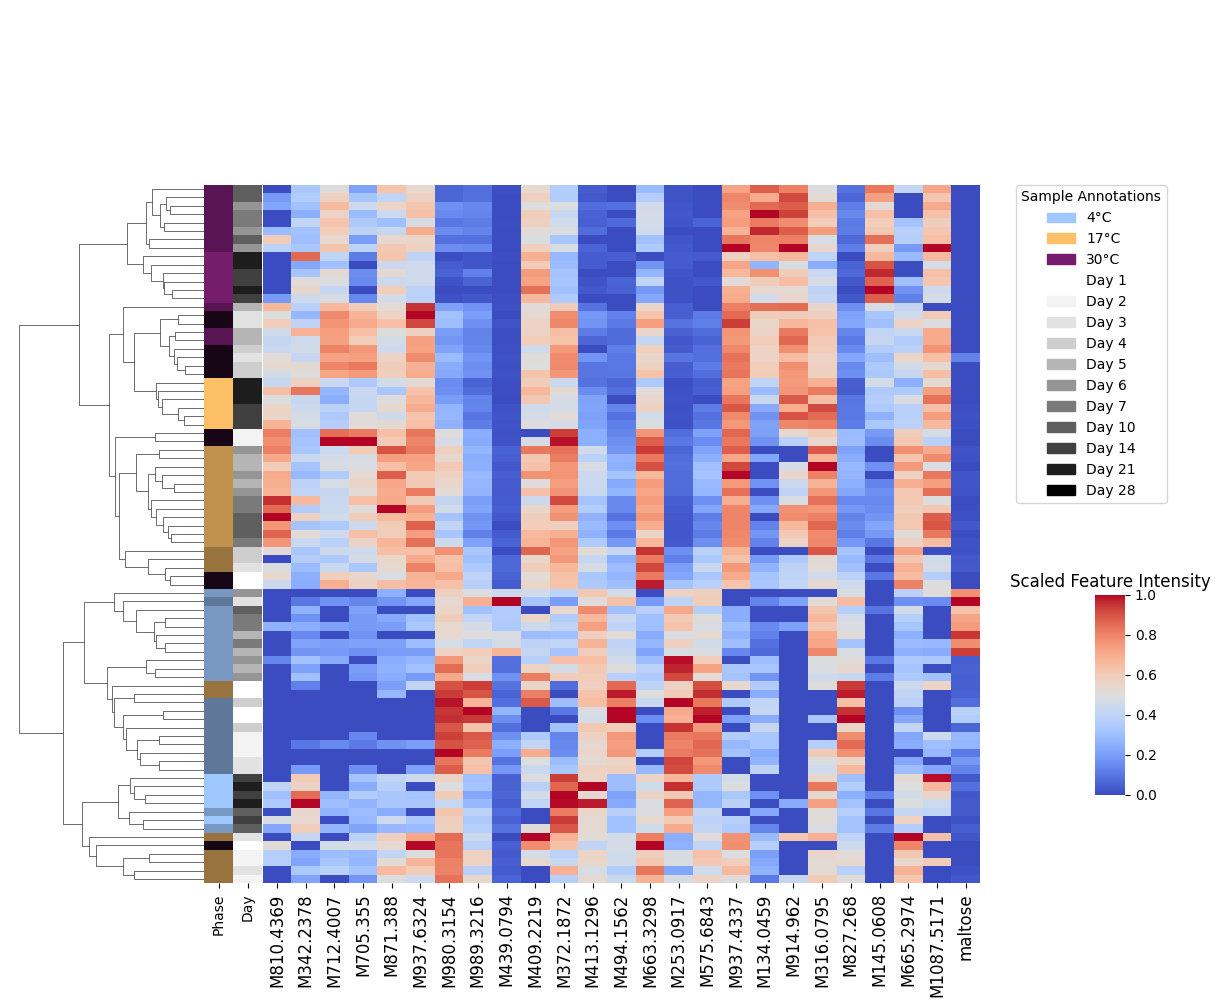

In [105]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# # Ensure top_features comes from your final model
# importances = pd.Series(final_clf.feature_importances_, index=X_selected.columns)
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

# Normalize top features
#selected_features = X.columns[selected_mask]
X_selected = X[selected_features]  # ← after applying SelectFromModel

X_top = X_selected[top_features["Feature"].values]

heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)

# Add metadata
heatmap_df["temperature"] = y
heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# Create color mappings
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))
# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))

temp_phase_colors = {
    '4_1': "#5f7899", '4_2': "#7898c2", '4_3': "#9ec8ff",
    '17_1': "#98733e", '17_2': "#c0924e", '17_3': "#fdc067",
    '30_1': "#170616", '30_2': "#591553", '30_3': "#751c6d"
}


# # Row color bar
# row_colors = pd.DataFrame({
#     "Temperature": heatmap_df["temperature"].map(temp_colors),
#     "Day": heatmap_df["day"].map(day_colors)
# }, index=heatmap_df.index)
row_colors = pd.DataFrame({
    "Phase": meta_aligned.loc[heatmap_df.index, "temp-phase2"].map(temp_phase_colors),
    "Day": meta_aligned.loc[heatmap_df.index, "day"].map(day_colors)
}, index=heatmap_df.index)


# Final heatmap data (drop metadata)
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])

# Plot
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    cmap="coolwarm",
    figsize=(10, 10),
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)

# Adjust labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Legends
temp_patches = [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()]
day_patches = [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()]
g.ax_heatmap.legend(
    handles=temp_patches + day_patches,
    title="Sample Annotations",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)

# Optional: save
#g.savefig("feature_expression_heatmap.pdf", dpi=300, bbox_inches='tight')



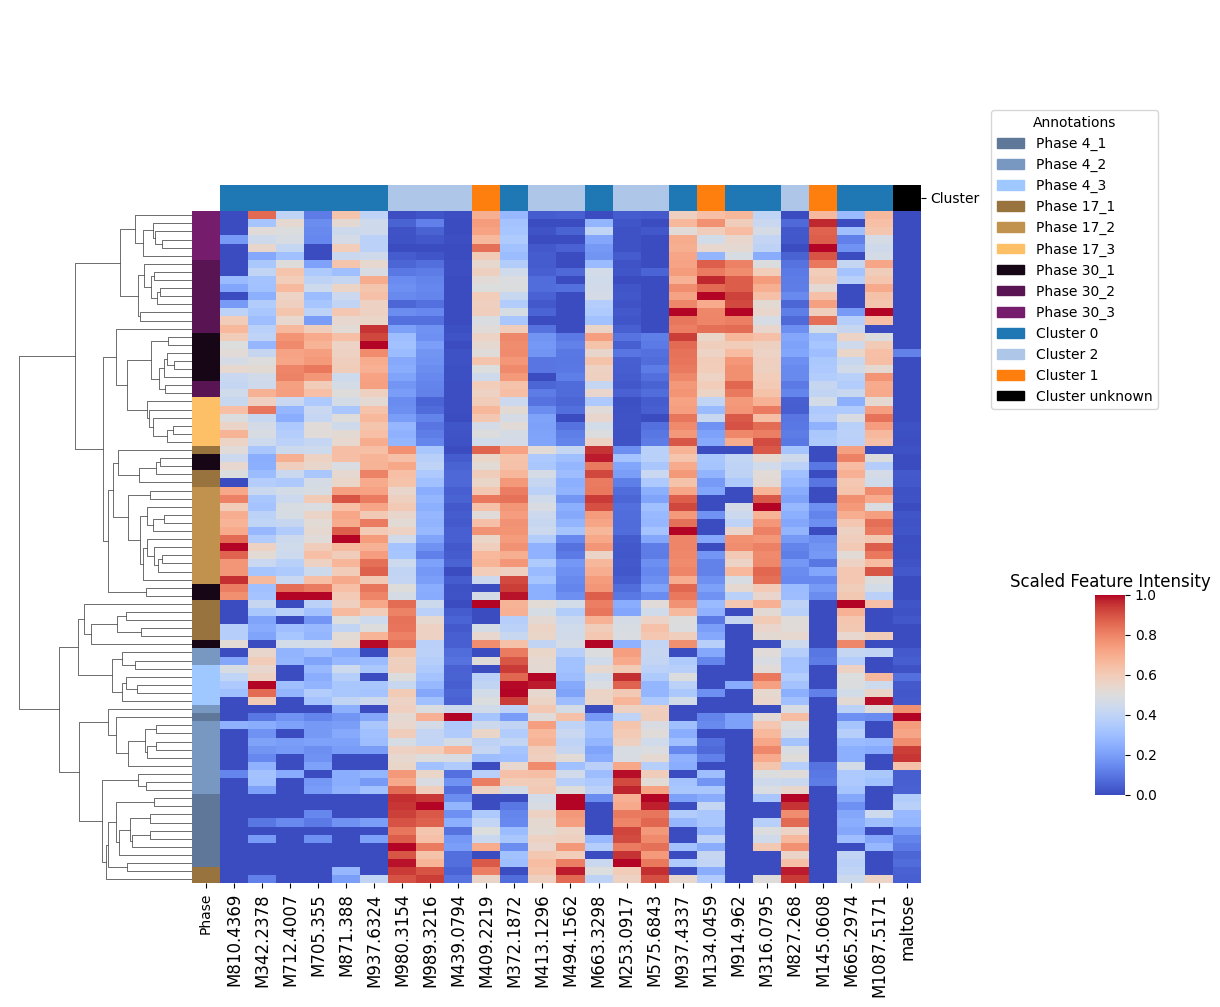

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Get top N features from final importances
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

# Extract and scale
X_top = X_selected[top_features["Feature"].values]
heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)


# --- Add metadata for annotations ---
heatmap_df["temperature"] = y_true_all.loc[heatmap_df.index]
heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# --- Define color maps ---
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))

temp_phase_colors = {
    '4_1': "#5f7899", '4_2': "#7898c2", '4_3': "#9ec8ff",
    '17_1': "#98733e", '17_2': "#c0924e", '17_3': "#fdc067",
    '30_1': "#170616", '30_2': "#591553", '30_3': "#751c6d"
}


# # Row color bar
# row_colors = pd.DataFrame({
#     "Temperature": heatmap_df["temperature"].map(temp_colors),
#     "Day": heatmap_df["day"].map(day_colors)
# }, index=heatmap_df.index)
row_colors = pd.DataFrame({
    "Phase": meta_aligned.loc[heatmap_df.index, "temp-phase2"].map(temp_phase_colors),
    #"Day": meta_aligned.loc[heatmap_df.index, "day"].map(day_colors)
}, index=heatmap_df.index)

# --- Drop metadata for heatmap input ---
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])
# Extract cluster info only for selected features
selected_features = top_features["Feature"]

# Extract top N features by name
feature_names = top_features["Feature"].values

# Drop duplicates in FIA cluster table to avoid index clashes
fia_clusters_clean = fia_clusters[~fia_clusters.index.duplicated(keep="first")]

# Map cluster labels to feature names, fallback to "unknown"
feature_clusters = pd.Series("unknown", index=feature_names)
in_fia = pd.Index(feature_names).intersection(fia_clusters_clean.index)
feature_clusters.loc[in_fia] = fia_clusters_clean.loc[in_fia, "cluster"].astype(str)
# Create palette
unique_clusters = feature_clusters.unique()
real_clusters = [c for c in unique_clusters if c != "unknown"]
cluster_palette = sns.color_palette("tab20", n_colors=len(real_clusters))
cluster_colors = dict(zip(real_clusters, cluster_palette))
cluster_colors["unknown"] = "#000000"

# Map colors to cluster assignments
cluster_color_row = feature_clusters.map(cluster_colors)







# Make a DataFrame for column color annotation
col_colors_df = pd.DataFrame([cluster_color_row], index=["Cluster"], columns=feature_names)



from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering

# Compute distance matrix and hierarchical clustering
row_dists = pdist(data_for_heatmap.values, metric="euclidean")
row_linkage = linkage(row_dists, method="average")

# Apply optimal leaf ordering to the clustering
row_linkage_ordered = optimal_leaf_ordering(row_linkage, row_dists)

# --- Plot the clustermap ---
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    col_colors=col_colors_df.T,
    cmap="coolwarm",
    figsize=(10, 10),
    row_linkage=row_linkage_ordered,  # ← KEY LINE
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)

import matplotlib.gridspec as gridspec

# --- After g = sns.clustermap(...) --



# Format axis labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Combine all legend patches in one call
all_patches = (
    [mpatches.Patch(color=color, label=f"Phase {phase}") for phase, color in temp_phase_colors.items()] +
    # [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()] +
    # [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()] +
    [mpatches.Patch(color=color, label=f"Cluster {cl}") for cl, color in cluster_colors.items()]
)

# Add single legend
g.ax_heatmap.legend(
    handles=all_patches,
    title="Annotations",
    bbox_to_anchor=(1.1, 1.15),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)


# Optional: save figure
#g.savefig("Figures/20250517_feature_expression_heatmap_temperature_prediction.pdf", dpi=300, bbox_inches='tight')


reorder the leafs:

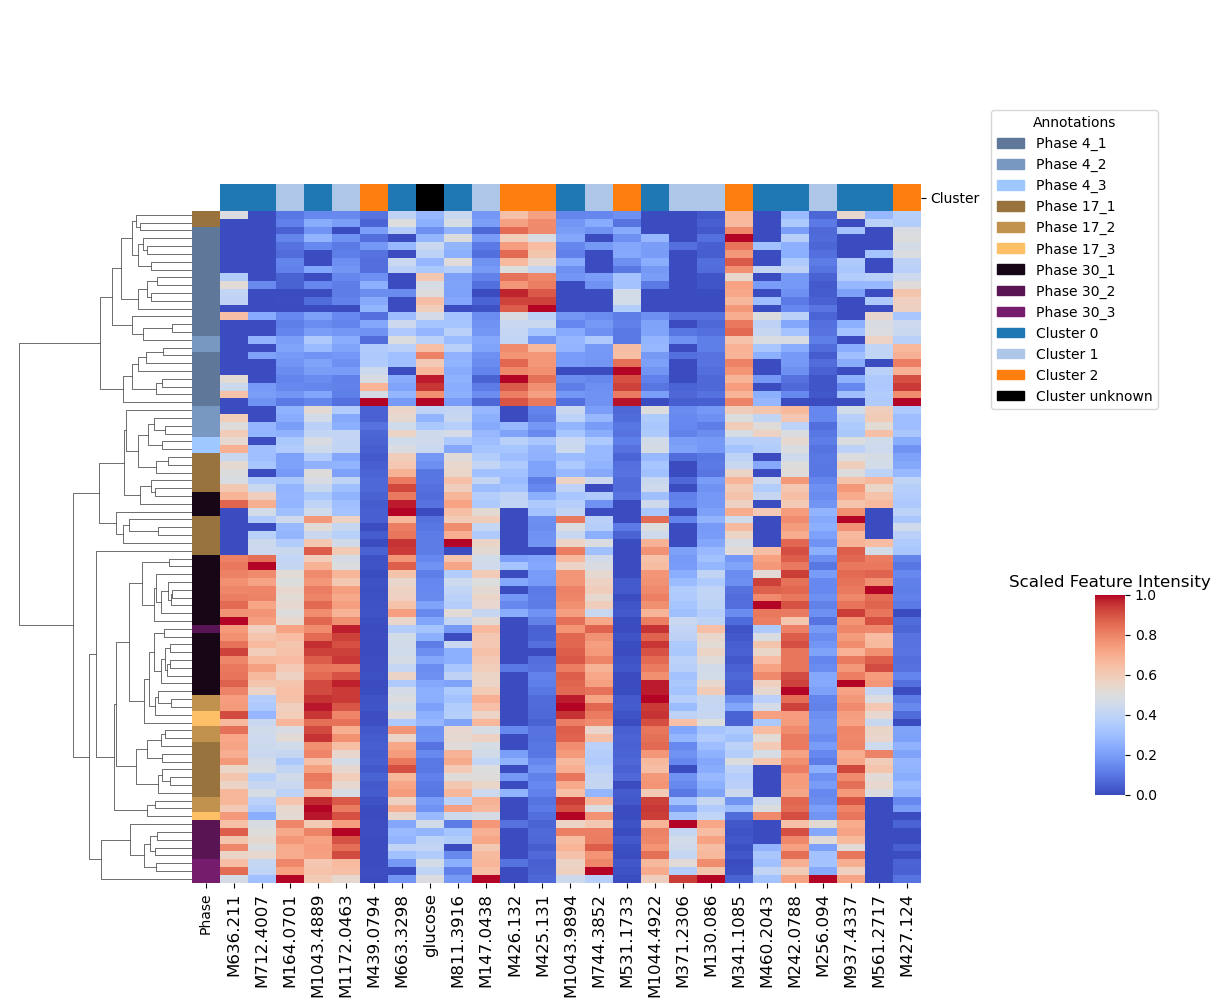

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Get top N features from final importances
top_n = 25
top_features = importances_df.head(top_n)

# Extract and scale
X_top = X_selected[top_features["Feature"].values]
heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)


# --- Add metadata for annotations ---
heatmap_df["temperature"] = y_true_all.loc[heatmap_df.index]
heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# --- Define color maps ---
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))

temp_phase_colors = {
    '4_1': "#5f7899", '4_2': "#7898c2", '4_3': "#9ec8ff",
    '17_1': "#98733e", '17_2': "#c0924e", '17_3': "#fdc067",
    '30_1': "#170616", '30_2': "#591553", '30_3': "#751c6d"
}


# # Row color bar
# row_colors = pd.DataFrame({
#     "Temperature": heatmap_df["temperature"].map(temp_colors),
#     "Day": heatmap_df["day"].map(day_colors)
# }, index=heatmap_df.index)
row_colors = pd.DataFrame({
    "Phase": meta_aligned.loc[heatmap_df.index, "temp-phase"].map(temp_phase_colors),
    #"Day": meta_aligned.loc[heatmap_df.index, "day"].map(day_colors)
}, index=heatmap_df.index)

# --- Drop metadata for heatmap input ---
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])
# Extract cluster info only for selected features
selected_features = top_features["Feature"]

# Extract top N features by name
feature_names = top_features["Feature"].values

# Drop duplicates in FIA cluster table to avoid index clashes
fia_clusters_clean = fia_clusters[~fia_clusters.index.duplicated(keep="first")]

# Map cluster labels to feature names, fallback to "unknown"
feature_clusters = pd.Series("unknown", index=feature_names)
in_fia = pd.Index(feature_names).intersection(fia_clusters_clean.index)
feature_clusters.loc[in_fia] = fia_clusters_clean.loc[in_fia, "cluster"].astype(str)
# Create palette
unique_clusters = feature_clusters.unique()
real_clusters = [c for c in unique_clusters if c != "unknown"]
cluster_palette = sns.color_palette("tab20", n_colors=len(real_clusters))
cluster_colors = dict(zip(real_clusters, cluster_palette))
cluster_colors["unknown"] = "#000000"

# Map colors to cluster assignments
cluster_color_row = feature_clusters.map(cluster_colors)







# Make a DataFrame for column color annotation
col_colors_df = pd.DataFrame([cluster_color_row], index=["Cluster"], columns=feature_names)



from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, leaves_list, optimal_leaf_ordering
from sklearn.preprocessing import LabelEncoder

# Step 1: Create numeric encoding of temp-phase
phase_order = ['4_1', '4_2', '4_3', '17_1', '17_2', '17_3', '30_1', '30_2', '30_3']
phase_encoder = {label: i for i, label in enumerate(phase_order)}
phase_vector = meta_aligned.loc[data_for_heatmap.index, "temp-phase"].map(phase_encoder)

# Step 2: Compute pairwise distances and linkage
row_dist = pdist(data_for_heatmap.values, metric="euclidean")
row_linkage = linkage(row_dist, method="average")

# Step 3: Optimal leaf ordering based on temp-phase distances
# Create an artificial distance matrix from phase order
phase_dist = pdist(phase_vector.values[:, None], metric="euclidean")
row_linkage_ordered = optimal_leaf_ordering(row_linkage, phase_dist)

# Use `row_linkage_ordered` in sns.clustermap as you already do:
# g = sns.clustermap(..., row_linkage=row_linkage_ordered, ...)


# --- Plot the clustermap ---
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    col_colors=col_colors_df.T,
    cmap="coolwarm",
    figsize=(10, 10),
    row_linkage=row_linkage_ordered,  # ← KEY LINE
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)

import matplotlib.gridspec as gridspec

# --- After g = sns.clustermap(...) --



# Format axis labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Combine all legend patches in one call
all_patches = (
    [mpatches.Patch(color=color, label=f"Phase {phase}") for phase, color in temp_phase_colors.items()] +
    # [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()] +
    # [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()] +
    [mpatches.Patch(color=color, label=f"Cluster {cl}") for cl, color in cluster_colors.items()]
)

# Add single legend
g.ax_heatmap.legend(
    handles=all_patches,
    title="Annotations",
    bbox_to_anchor=(1.1, 1.15),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)


# Optional: save figure
#g.savefig("Figures/20250517_feature_expression_heatmap_phase_temperature_prediction.pdf", dpi=300, bbox_inches='tight')


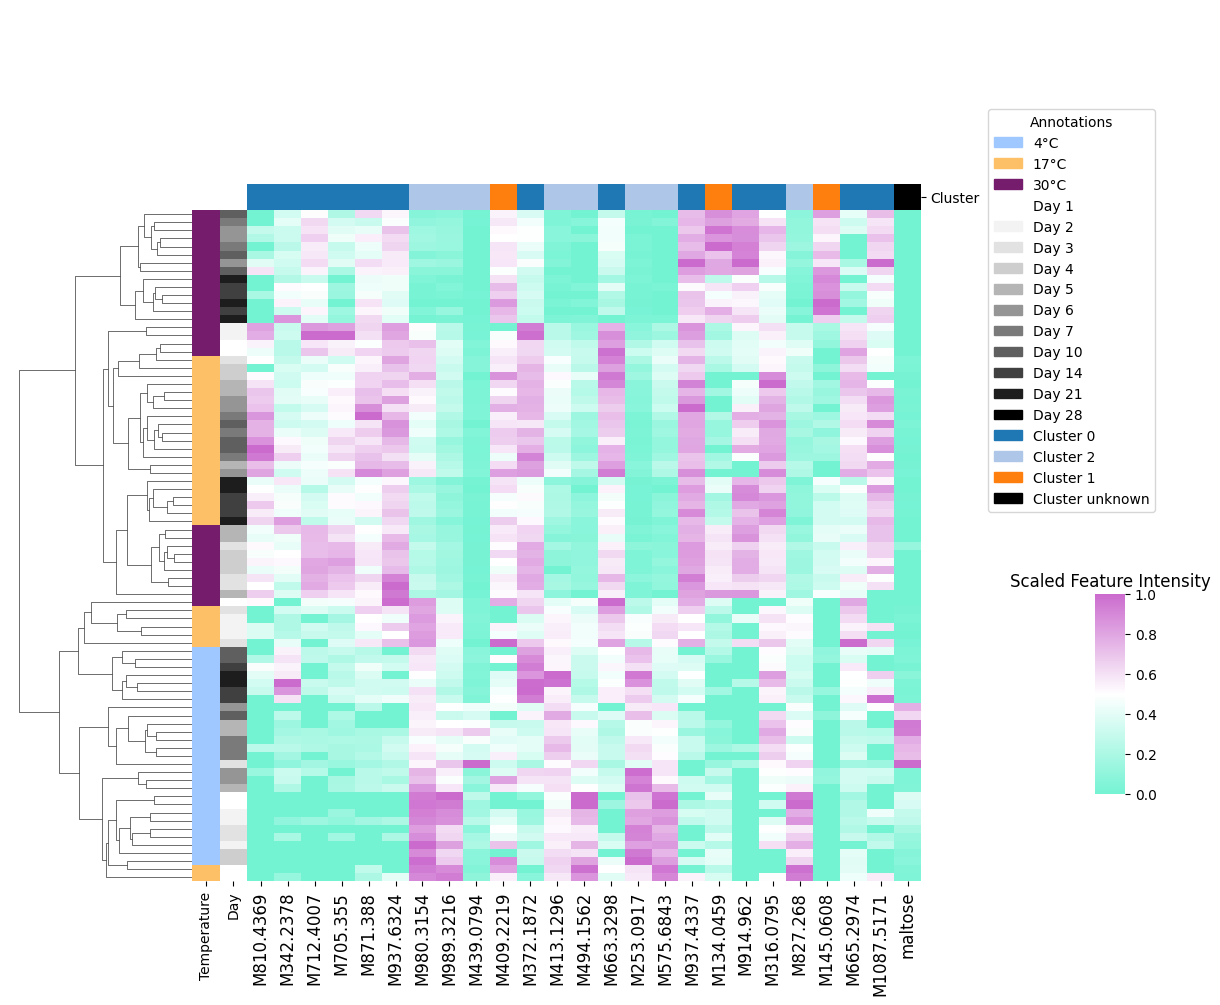

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# # Ensure top_features comes from your final model
# importances = pd.Series(final_clf.feature_importances_, index=X_selected.columns)
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

# Normalize top features
#selected_features = X.columns[selected_mask]
X_selected = X[selected_features]  # ← after applying SelectFromModel

X_top = X_selected[top_features["Feature"].values]

heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)

# --- Add metadata for annotations ---
heatmap_df["temperature"] = meta_aligned.loc[heatmap_df.index, "temperature"]

heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# --- Define color maps ---
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))

# --- Row color bar ---
row_colors = pd.DataFrame({
    "Temperature": heatmap_df["temperature"].map(temp_colors),
    "Day": heatmap_df["day"].map(day_colors)
}, index=heatmap_df.index)

# --- Drop metadata for heatmap input ---
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])
# Extract cluster info only for selected features
selected_features = top_features["Feature"]
# Extract top N features by name
feature_names = top_features["Feature"].values
# Drop duplicates in FIA cluster table to avoid index clashes
fia_clusters_clean = fia_clusters[~fia_clusters.index.duplicated(keep="first")]

# Map cluster labels to feature names, fallback to "unknown"
feature_clusters = pd.Series("unknown", index=feature_names)
in_fia = pd.Index(feature_names).intersection(fia_clusters_clean.index)
feature_clusters.loc[in_fia] = fia_clusters_clean.loc[in_fia, "cluster"].astype(str)
# Create palette
unique_clusters = feature_clusters.unique()
real_clusters = [c for c in unique_clusters if c != "unknown"]
cluster_palette = sns.color_palette("tab20", n_colors=len(real_clusters))
cluster_colors = dict(zip(real_clusters, cluster_palette))
cluster_colors["unknown"] = "#000000"

# Map colors to cluster assignments
cluster_color_row = feature_clusters.map(cluster_colors)

# Make a DataFrame for column color annotation
col_colors_df = pd.DataFrame([cluster_color_row], index=["Cluster"], columns=feature_names)


# phase_order = [1, 2, 3, 4, 5, 6, 7, 10, 14, 21, 28]
phase_order = [4, 17, 30]
phase_encoder = {label: i for i, label in enumerate(phase_order)}
phase_vector = meta_aligned.loc[data_for_heatmap.index, "temperature"].map(phase_encoder)

# Step 2: Compute pairwise distances and linkage
row_dist = pdist(data_for_heatmap.values, metric="euclidean")
row_linkage = linkage(row_dist, method="average")

# Step 3: Optimal leaf ordering based on temp-phase distances
# Create an artificial distance matrix from phase order
phase_dist = pdist(phase_vector.values[:, None], metric="euclidean")
row_linkage_ordered = optimal_leaf_ordering(row_linkage, phase_dist)

# Use `row_linkage_ordered` in sns.clustermap as you already do:
# g = sns.clustermap(..., row_linkage=row_linkage_ordered, ...)

custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=["#74F3D3FF", "#FFFFFF", "#CB6BCEFF"],
    N=500
)

# --- Plot the clustermap ---
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    col_colors=col_colors_df.T,
    cmap=custom_cmap,
    figsize=(10, 10),
    row_linkage = row_linkage_ordered,  # ← KEY LINE
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)
import matplotlib.gridspec as gridspec

# --- After g = sns.clustermap(...) --



# Format axis labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Combine all legend patches in one call
all_patches = (
    [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()] +
    [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()] +
    [mpatches.Patch(color=color, label=f"Cluster {cl}") for cl, color in cluster_colors.items()]
)

# Add single legend
g.ax_heatmap.legend(
    handles=all_patches,
    title="Annotations",
    bbox_to_anchor=(1.1, 1.15),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)


# Optional: save figure
g.savefig("Figures/20250524_feature_expression_heatmap_phase_day_combined_with_temp_prediction.pdf", dpi=300, bbox_inches='tight')

In [135]:
print("X_selected shape:", X_selected.shape)
print("SHAP base array shape:", np.array(shap_values).shape)
print("SHAP[i] shape:", np.array(shap_values[0]).shape)


X_selected shape: (86, 871)
SHAP base array shape: (86, 871, 3)
SHAP[i] shape: (871, 3)



🔍 SHAP for class: 4°C


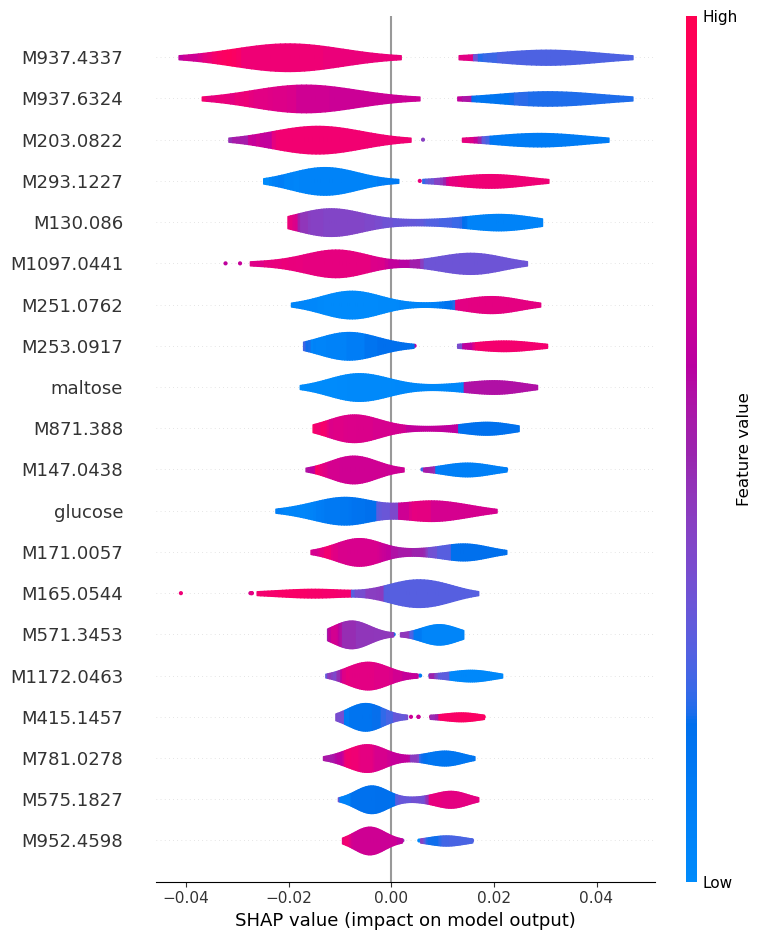


🔍 SHAP for class: 17°C


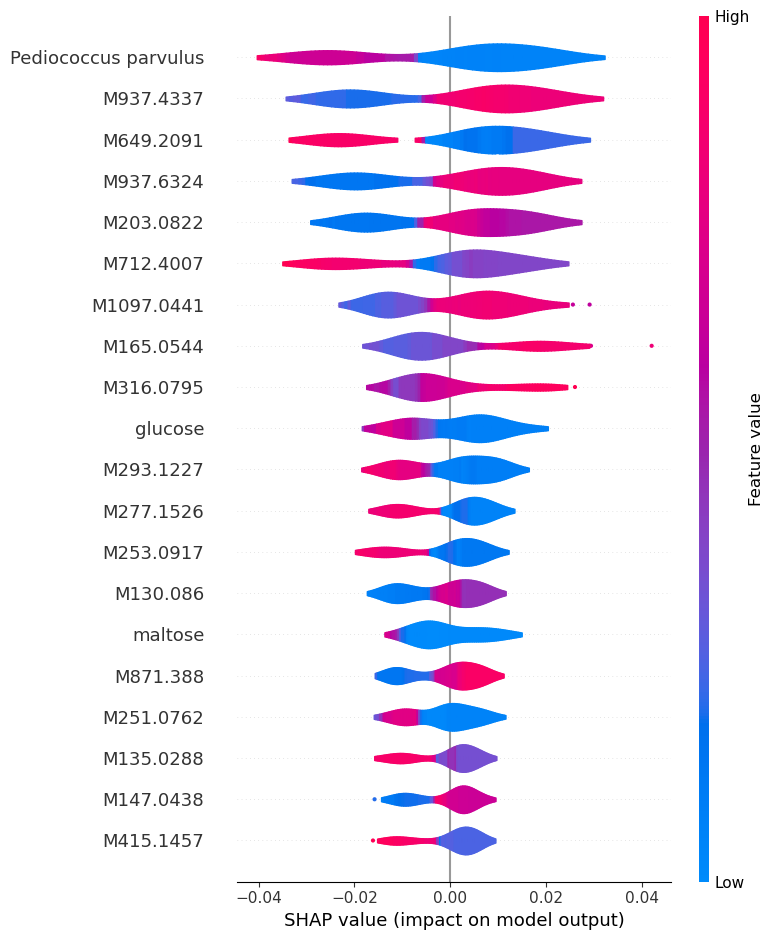


🔍 SHAP for class: 30°C


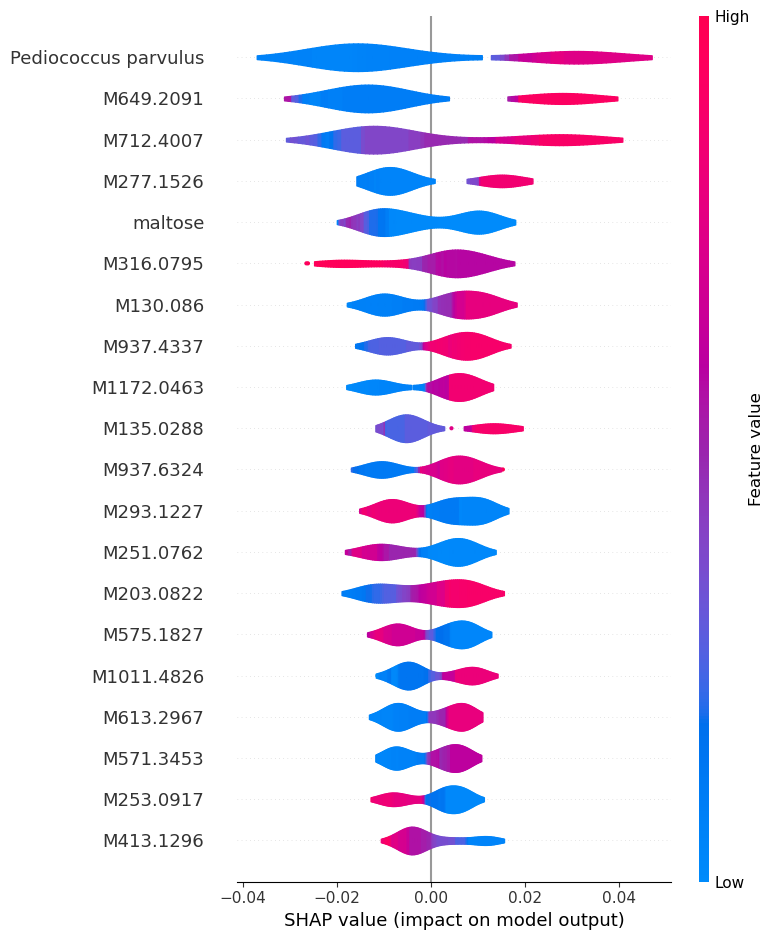

In [136]:
# Convert SHAP output to 3D numpy array
shap_vals = np.array(shap_values)  # Shape: (n_samples, n_features, n_classes)

# Loop through classes and plot
for i, temp in enumerate(final_clf.classes_):
    print(f"\n🔍 SHAP for class: {temp}°C")
    shap.summary_plot(shap_vals[:, :, i], X_selected, plot_type="violin", show=True)



🔍 SHAP for class: 4°C


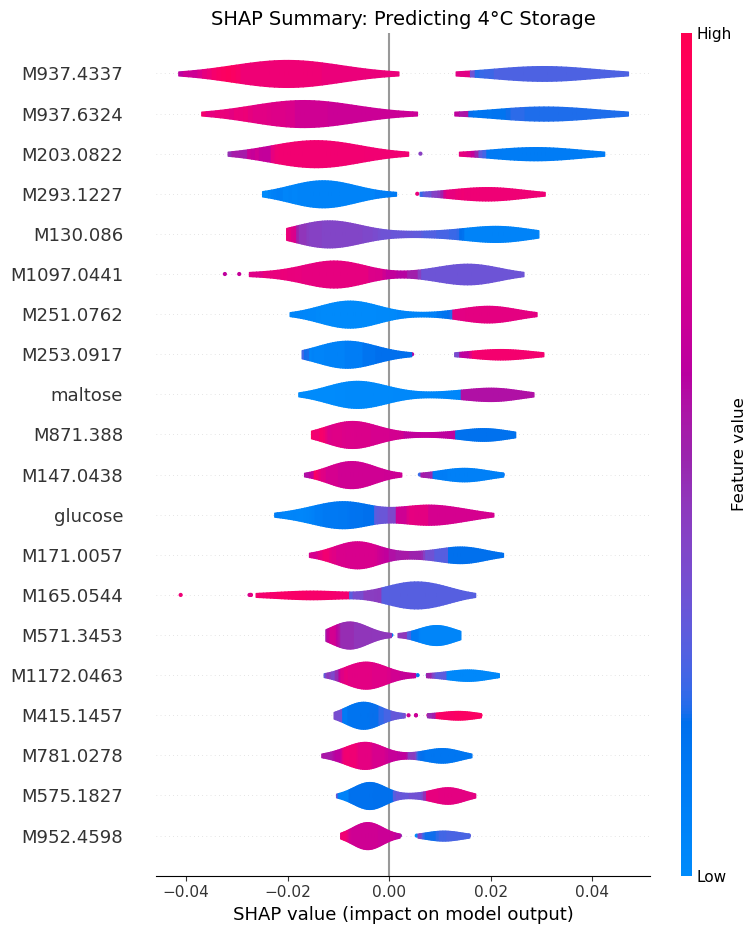


🔍 SHAP for class: 17°C


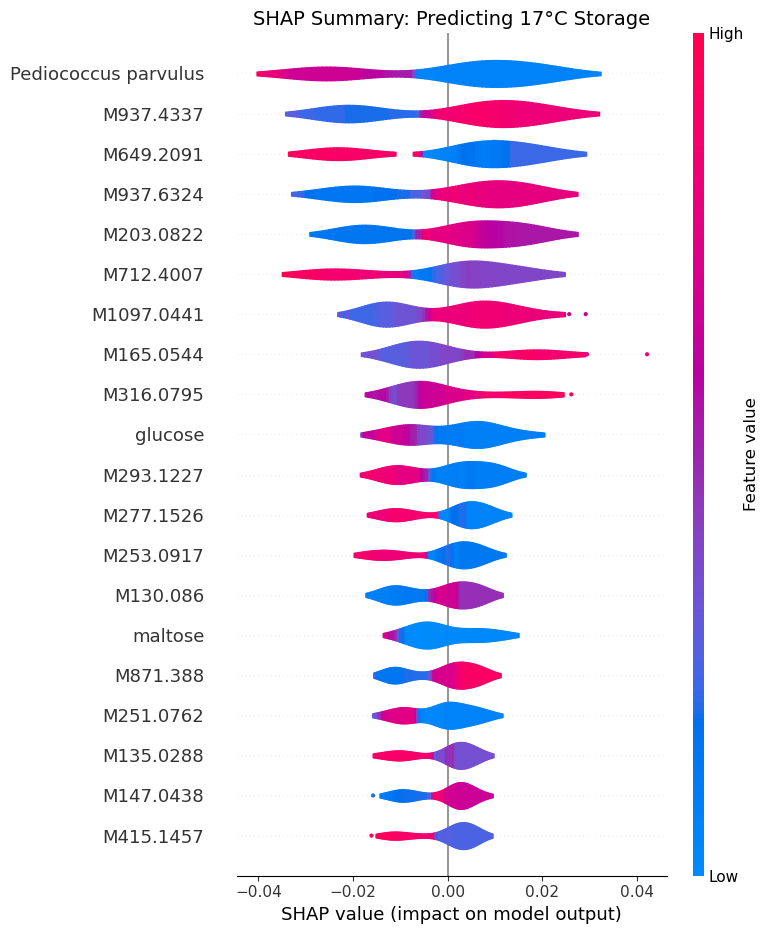


🔍 SHAP for class: 30°C


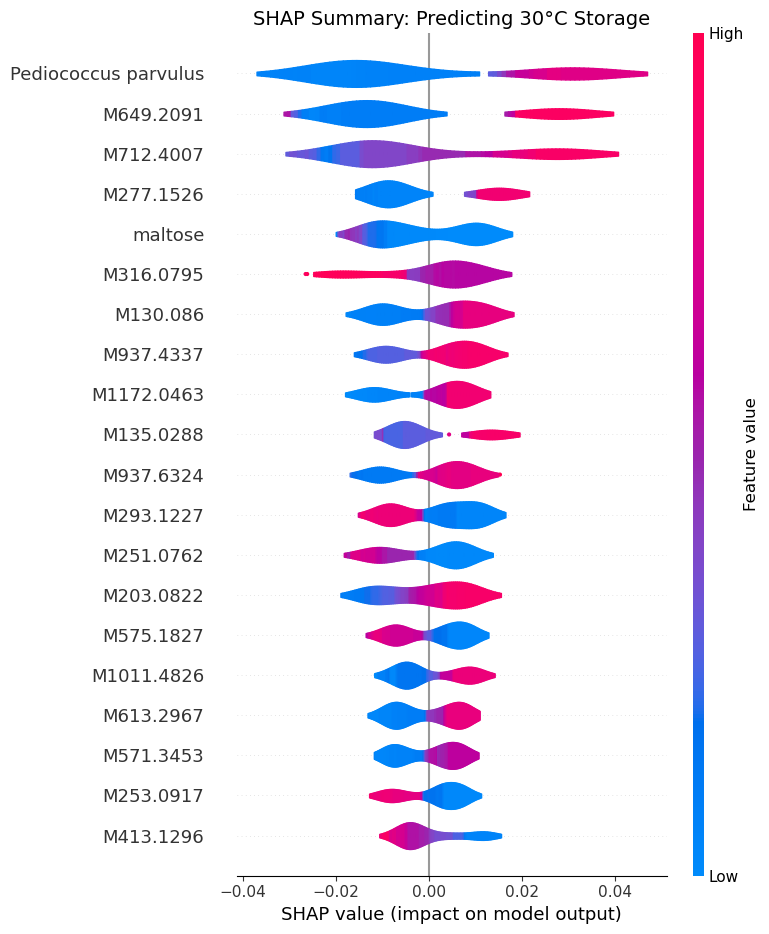

In [137]:
import matplotlib.pyplot as plt
import shap

# Set global plot aesthetics
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
})

# Class-wise SHAP violin plots with nice titles
for i, temp in enumerate(final_clf.classes_):
    print(f"\n🔍 SHAP for class: {temp}°C")
    
    plt.figure(figsize=(8, 6))
    shap.summary_plot(
        shap_vals[:, :, i], 
        X_selected, 
        plot_type="violin", 
        show=False,
        color=plt.get_cmap("coolwarm")
    )
    
    plt.title(f"SHAP Summary: Predicting {temp}°C Storage", fontsize=14)
    plt.tight_layout()
    #plt.savefig(f"SHAP_summary_{temp}C.pdf", dpi=300, bbox_inches='tight')

    plt.show()
